In [616]:
import os
import pandas as pd

directory = r'Datos\\Series-csv'

# !!!!!!!!!!!!!! Tenia un codigo muy feo y le pedi a chat ayuda para que se viera mas bonito !!!!!!!!!!!!!!

# Dictionary to store dataframes
dataframes = {}

# Iterate over all files in the directory
for i, filename in enumerate(os.listdir(directory), start=1):
    file_path = os.path.join(directory, filename)
    dataframes[f'df{i}'] = pd.read_csv(file_path)

# Extract specific dataframes
dfs = [dataframes[f'df{i}'] for i in range(1, 13)] # Hay 12 archivos

# Function to clean dataframe
def clean_dataframe(df):
    df = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16]).reset_index(drop=True) # Solo usan la fila 8, borro hasta que hay datos y reseteo el index
    df.columns = df.iloc[0] # La primera fila es el nombre de las columnas
    return df.drop([0]).reset_index(drop=True) # Borro la primera fila y reseteo el index

# Clean all dataframes
dfs = [clean_dataframe(df) for df in dfs]

# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs


C:\Users\herie\AppData\Local\Temp\ipykernel_34124\1856070868.py:14: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,81,82,83,84,93,94,95,96,97,98,99,100,101,102,103,104,109,110,111,112,121,122,123,124,157,158,159,160,161,162,163,164,165,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[f'df{i}'] = pd.read_csv(file_path)


In [617]:
pd.set_option('display.max_columns', None)

In [618]:
# Assign cleaned dataframes back to individual variables
df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 = dfs

## **Vamos a hacer que todos tengan el mismo Índice, que va a ser el primer día del mes desde 2010**

In [619]:
# uso mucho esto entonces lo hago una funcion

def interpolation(df4):
    df4 = df4.apply(pd.to_numeric, errors='coerce')
    complete_idx = pd.period_range(start=df4.index.min(), end=df4.index.max(), freq='M')
    df4 = df4.reindex(complete_idx)
    df4 = df4.interpolate(method='linear')
    return df4

def clean_df(df3, do_interpolation=False):
    # hacemos que la fecha sea el index
    df3 = df3.set_index("Título")
    df3.index.names = ["Fecha"]
    df3.index = pd.to_datetime(df3.index)
    df3.index = df3.index.to_period("M")
    df3 = df3.apply(pd.to_numeric, errors='coerce')
    if do_interpolation:
        df3 = interpolation(df3)
    df3 = df3.groupby(df3.index).first()
    df3 = df3.loc["2011-04":"2024-05"]
    return df3

### DF1

In [620]:
df1.head()

0               Título  \
0  2006-01-02 00:00:00   
1  2006-01-03 00:00:00   
2  2006-01-04 00:00:00   
3  2006-01-05 00:00:00   
4  2006-01-06 00:00:00   

0 TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
0                                               8.27                      
1                                               8.28                      
2                                               8.28                      
3                                               8.28                      
4                                               8.28                      

0 TIIE a 28 días, Tasa de interés en por ciento anual  \
0                                               8.57    
1                                              8.565    
2                                               8.55    
3                                              8.565    
4                                              8.575    

0 Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
0                                                N/E                 
1                                                N/E                 
2                                                N/E                 
3                                               8.28                 
4                                                N/E                 

0 TIIE a 182 días  \
0             N/E   
1             N/E   
2             N/E   
3             N/E   
4             N/E   

0 Tasas de interés interbancarias Por ciento anual, TIIP a 28 días  
0                                                N/E                
1                                                N/E                
2                                                N/E                
3                                                N/E                
4                                                N/E

In [621]:
df1 =  clean_df(df1)
df1.head()

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       
2011-08                                               4.45                       

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     
2011-08                                             4.8050     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                       
2011-04                                              4.862                  
2011-05                                              4.875                  
2011-06                                              4.915                  
2011-07                                              4.880                  
2011-08                                              4.840                  

0        TIIE a 182 días  \
Fecha                      
2011-04           4.9750   
2011-05           4.9700   
2011-06           4.9650   
2011-07           4.9175   
2011-08           4.8950   

0        Tasas de interés interbancarias Por ciento anual, TIIP a 28 días  
Fecha                                                                      
2011-04                                                NaN                 
2011-05                                                NaN                 
2011-06                                                NaN                 
2011-07                                                NaN                 
2011-08                                                NaN

In [622]:
df1 = df1.drop(df1.columns[[3, 4]], axis=1)
df1.head()


0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       
2011-08                                               4.45                       

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     
2011-08                                             4.8050     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  
Fecha                                                                      
2011-04                                              4.862                 
2011-05                                              4.875                 
2011-06                                              4.915                 
2011-07                                              4.880                 
2011-08                                              4.840

### DF2

In [623]:
df2.head()

0               Título  \
0  2006-01-01 00:00:00   
1  2006-04-01 00:00:00   
2  2006-07-01 00:00:00   
3  2006-10-01 00:00:00   
4  2007-01-01 00:00:00   

0 Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
0                                           19194516                                                                  
1                                           21042559                                                                  
2                                           23045079                                                                  
3                                           24552482                                                                  
4                                           25732459                                                                  

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A  \
0                                            2888159                          
1                                            3278850                          
2                                            3572291                          
3                                            3902273                          
4                                            4144985                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
0                                              16828                          
1                                              16779                          
2                                              16668                          
3                                              16420                          
4                                              17879                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
0                                            5184010                          
1                                            5267092                          
2                                            5652088                          
3                                            5701202                          
4                                            5949267                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
0                                            4342957                          
1                                            4595294                          
2                                            4940651                          
3                                            5103822                          
4                                            5319045                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
0                                            3344859                          
1                                            3863157                          
2                                            4311374                          
3                                            4672691                          
4                                            4793506                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
0                                            1445254                          
1                                            1889587                          
2                                            2111096                          
3                                            2432677                          
4                                            2800621                          

0 Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
0                                               7463                          
1                                               7821                          
2                                        

In [624]:
df2 = clean_df(df2, do_interpolation=True)
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   
2011-08                                       2.425563e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), A  \
2011-04                                                0.0                           
2011-05                                                0.0                           
2011-06                                                0.0                           
2011-07                                                0.0                           
2011-08                                                0.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           
2011-08                                            15230.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           
2011-08                                       6.298939e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           
2011-08                                       8.207284e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           
2011-08                                       3.032766e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           
2011-08                                       1.188782e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-04                                       17015.000

In [625]:
# drop columns with all zeros
df2 = df2.loc[:, (df2 != 0).any(axis=0)]
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   
2011-08                                       2.425563e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           
2011-08                                            15230.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           
2011-08                                       6.298939e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           
2011-08                                       8.207284e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           
2011-08                                       3.032766e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           
2011-08                                       1.188782e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-04                                       17015.000000                           
2011-05                                       17213.333333                           
2011-06                                       17411.666667                           
2011-07                                       17610.000000                           
2011-08                                       17747.666667                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H  \
2011-04                                      198979.000

In [626]:
# sumar las columnas
for col in df2.columns:
    if sum(df2[col]) < 1000:
        print(f"La columna {col} tiene una suma menor a 1000")

La columna Sistemas de pago de bajo valor, Tarjetas de crédito (otras marcas), Q tiene una suma menor a 1000
La columna Sistemas de pago de bajo valor, Tarjetas de débito (mastercard), U tiene una suma menor a 1000
La columna Sistemas de pago de bajo valor, Tarjetas de débito (visa), E tiene una suma menor a 1000


In [627]:
# si tiene la palabra debito la borramos de las columnas
df2 = df2.loc[:, ~df2.columns.str.contains("débito")]
df2.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   
2011-08                                       2.425563e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           
2011-08                                            15230.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           
2011-08                                       6.298939e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           
2011-08                                       8.207284e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           
2011-08                                       3.032766e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           
2011-08                                       1.188782e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-04                                       17015.000000                           
2011-05                                       17213.333333                           
2011-06                                       17411.666667                           
2011-07                                       17610.000000                           
2011-08                                       17747.666667                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H  \
2011-04                                      198979.000

### DF3

In [628]:
df3.tail()  

0                 Título  \
440  2024-09-01 00:00:00   
441  2024-10-01 00:00:00   
442  2024-11-01 00:00:00   
443  2024-12-01 00:00:00   
444  2025-01-01 00:00:00   

0   TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual  \
440                                              10.73                              
441                                              10.51                              
442                                              10.42                              
443                                              10.25                              
444                                                 10                              

0   TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
440                                              10.95                      
441                                              10.74                      
442                                              10.61                      
443                                              10.38                      
444                                              10.28                      

0   TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
440                                              11.14                      
441                                              10.89                      
442                                               10.8                      
443                                              10.64                      
444                                              10.38                      

0   TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
440                                              11.29                       
441                                              11.03                       
442                                              10.94                       
443                                              10.78                       
444                                              10.51                       

0   TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
440                                                N/E                                        
441                                                N/E                                        
442                                                N/E                                        
443                                                N/E                                        
444                                                N/E                                        

0   Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual  \
440                                                N/E              
441                                                N/E              
442                                                N/E              
443                                                N/E              
444                                                N/E              

0   Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual  \
440                                                N/E                              
441                                                N/E                              
442                                                N/E                              
443                                                N/E                              
444                                                N/E                              

0   Tasa Mexibor a 6 meses, Tasa de interés promedio mensual, en por ciento anual  \
440                                                N/E                              
441                                                N/E                              
442                                                N/E                              
443                                                N/E                              
444

In [629]:
df3 = clean_df(df3)
df3.head()

0        TIIE de fondeo a 1 día, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                    
2011-04                                               4.50                               
2011-05                                               4.47                               
2011-06                                               4.49                               
2011-07                                               4.47                               
2011-08                                               4.44                               

0        TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2011-04                                               4.85                       
2011-05                                               4.85                       
2011-06                                               4.85                       
2011-07                                               4.82                       
2011-08                                               4.81                       

0        TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2011-04                                               4.88                       
2011-05                                               4.88                       
2011-06                                               4.89                       
2011-07                                               4.86                       
2011-08                                               4.85                       

0        TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                             
2011-04                                               4.98                        
2011-05                                               4.96                        
2011-06                                               4.95                        
2011-07                                               4.90                        
2011-08                                               4.87                        

0        TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                              
2011-04                                                NaN                                         
2011-05                                                NaN                                         
2011-06                                                NaN                                         
2011-07                                                NaN                                         
2011-08                                                NaN                                         

0        Tasas Mexibor a 1 mes, Tasa promedio mensual Por ciento anual  \
Fecha                                                                    
2011-04                                                NaN               
2011-05                                                NaN               
2011-06                                                NaN               
2011-07                                                NaN               
2011-08                                                NaN               

0        Tasa Mexibor a 3 meses, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                    
2011-04                                                NaN                               
2011-05                                                NaN                               
2011-06                                                Na

In [630]:
# solo queremos las de 28 dias (MENOS MEXIBOR Y TIIP porque tienen muchos N/E)
df3 = df3.iloc[:, [1, 2, 3, 4, 10, 11]]
df3.tail()

0        TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2024-01                                              11.50                       
2024-02                                              11.50                       
2024-03                                              11.44                       
2024-04                                              11.25                       
2024-05                                              11.24                       

0        TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2024-01                                              11.66                       
2024-02                                              11.65                       
2024-03                                              11.61                       
2024-04                                              11.41                       
2024-05                                              11.40                       

0        TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                             
2024-01                                              11.83                        
2024-02                                              11.81                        
2024-03                                              11.77                        
2024-04                                              11.57                        
2024-05                                              11.56                        

0        TIIP a 28 días (Serie histórica), Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                              
2024-01                                                NaN                                         
2024-02                                                NaN                                         
2024-03                                                NaN                                         
2024-04                                                NaN                                         
2024-05                                                NaN                                         

0        Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                                
2024-01                                              11.28                                           
2024-02                                              11.26                                           
2024-03                                              11.23                                           
2024-04                                              11.03                                           
2024-05                                              11.03                                           

0        Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual  
Fecha                                                                                                    
2024-01                                              11.26                                               
2024-02                                              11.25                                               
2024-03                                              11.21                                               
2024-04                                              11.01                                               
2024-05                                              11.01

In [631]:
df3 = df3.drop(df3.columns[3], axis=1)
df3.head()

0        TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2011-04                                               4.85                       
2011-05                                               4.85                       
2011-06                                               4.85                       
2011-07                                               4.82                       
2011-08                                               4.81                       

0        TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                            
2011-04                                               4.88                       
2011-05                                               4.88                       
2011-06                                               4.89                       
2011-07                                               4.86                       
2011-08                                               4.85                       

0        TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                             
2011-04                                               4.98                        
2011-05                                               4.96                        
2011-06                                               4.95                        
2011-07                                               4.90                        
2011-08                                               4.87                        

0        Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual  \
Fecha                                                                                                
2011-04                                               4.52                                           
2011-05                                               4.49                                           
2011-06                                               4.51                                           
2011-07                                               4.49                                           
2011-08                                               4.46                                           

0        Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual  
Fecha                                                                                                    
2011-04                                               4.49                                               
2011-05                                               4.45                                               
2011-06                                               4.48                                               
2011-07                                               4.47                                               
2011-08                                               4.44

### DF4

In [632]:
df4.head()

0               Título  \
0  2011-03-01 00:00:00   
1  2011-05-01 00:00:00   
2  2011-07-01 00:00:00   
3  2011-09-01 00:00:00   
4  2011-11-01 00:00:00   

0 Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito  \
0                                            25.0942                                                               
1                                            24.9821                                                               
2                                            24.8008                                                               
3                                            25.2722                                                               
4                                             24.522                                                               

0 Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito  \
0                                            30.3445                                                                  
1                                            30.3204                                                                  
2                                            30.2965                                                                  
3                                            30.5503                                                                  
4                                            30.3803                                                                  

0 Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito  
0                                            37.6358                                                           
1                                            37.7136                                                           
2                                            37.7225                                                           
3                                            37.8129                                                           
4                                            37.8729

In [633]:
df4 = clean_df(df4, do_interpolation=True)
df4.head()

0        Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito  \
2011-04                                           25.03815                                                                
2011-05                                           24.98210                                                                
2011-06                                           24.89145                                                                
2011-07                                           24.80080                                                                
2011-08                                           25.03650                                                                

0        Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito  \
2011-04                                           30.33245                                                                   
2011-05                                           30.32040                                                                   
2011-06                                           30.30845                                                                   
2011-07                                           30.29650                                                                   
2011-08                                           30.42340                                                                   

0        Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito  
2011-04                                           37.67470                                                            
2011-05                                           37.71360                                                            
2011-06                                           37.71805                                                            
2011-07                                           37.72250                                                            
2011-08                                           37.76770

### DF5

In [634]:
df5.head()

0               Título  \
0  1975-08-01 00:00:00   
1  1975-09-01 00:00:00   
2  1975-10-01 00:00:00   
3  1975-11-01 00:00:00   
4  1975-12-01 00:00:00   

0 Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual  \
0                                                N/E                                         
1                                                N/E                                         
2                                                N/E                                         
3                                                N/E                                         
4                                                N/E                                         

0 Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual  \
0                                                N/E                                                    
1                                                N/E                                                    
2                                                N/E                                                    
3                                                N/E                                                    
4                                                N/E                                                    

0 Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual  \
0                                                N/E                                   
1                                                N/E                                   
2                                                N/E                                   
3                                                N/E                                   
4                                                N/E                                   

0 Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual  \
0                                                N/E                                         
1                                                N/E                                         
2                                                N/E                                         
3                                                N/E                                         
4                                                N/E                                         

0 Costo porcentual promedio (CPP), Tasa en por ciento anual  \
0                                              11.91          
1                                              11.91          
2                                              11.91          
3                                              11.92          
4                                              11.97          

0 Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual  \
0                                                N/E                                 
1                                                N/E                                 
2                                                N/E                                 
3                                                N/E                                 
4                                                N/E                                 

0 Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo  
0                                                N/E                            
1                                                N/E                            
2                                                N/E                            
3                                                N/E                            
4                                                N/E

In [635]:
df5 = clean_df(df5)
df5.head()

0        Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual  \
Fecha                                                                                               
2011-04                                               4.21                                          
2011-05                                               4.20                                          
2011-06                                               4.22                                          
2011-07                                               4.22                                          
2011-08                                               4.19                                          

0        Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual  \
Fecha                                                                                                          
2011-04                                               4.19                                                     
2011-05                                               4.20                                                     
2011-06                                               4.21                                                     
2011-07                                               4.22                                                     
2011-08                                               4.18                                                     

0        Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual  \
Fecha                                                                                         
2011-04                                               4.15                                    
2011-05                                               4.44                                    
2011-06                                               4.44                                    
2011-07                                               3.82                                    
2011-08                                               3.68                                    

0        Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual  \
Fecha                                                                                               
2011-04                                               2.13                                          
2011-05                                               2.15                                          
2011-06                                               2.21                                          
2011-07                                               2.12                                          
2011-08                                               2.25                                          

0        Costo porcentual promedio (CPP), Tasa en por ciento anual  \
Fecha                                                                
2011-04                                               3.38           
2011-05                                               3.35           
2011-06                                               3.38           
2011-07                                               3.39           
2011-08                                               3.33           

0        Costo de captaciÃ³n a plazo de pasivos estables (CPPE), Tasa en por ciento anual  \
Fecha                                                                                       
2011-04                                                NaN                                  
2011-05                                                NaN                                  
2011-06                                                NaN                                  
2011-07                                                NaN                                  
2011-08                                                NaN                          

In [636]:
df5 = df5.drop(df5.columns[5], axis=1)
df5.head()

0        Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual  \
Fecha                                                                                               
2011-04                                               4.21                                          
2011-05                                               4.20                                          
2011-06                                               4.22                                          
2011-07                                               4.22                                          
2011-08                                               4.19                                          

0        Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual  \
Fecha                                                                                                          
2011-04                                               4.19                                                     
2011-05                                               4.20                                                     
2011-06                                               4.21                                                     
2011-07                                               4.22                                                     
2011-08                                               4.18                                                     

0        Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual  \
Fecha                                                                                         
2011-04                                               4.15                                    
2011-05                                               4.44                                    
2011-06                                               4.44                                    
2011-07                                               3.82                                    
2011-08                                               3.68                                    

0        Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual  \
Fecha                                                                                               
2011-04                                               2.13                                          
2011-05                                               2.15                                          
2011-06                                               2.21                                          
2011-07                                               2.12                                          
2011-08                                               2.25                                          

0        Costo porcentual promedio (CPP), Tasa en por ciento anual  \
Fecha                                                                
2011-04                                               3.38           
2011-05                                               3.35           
2011-06                                               3.38           
2011-07                                               3.39           
2011-08                                               3.33           

0        Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo  
Fecha                                                                                  
2011-04                                               4.69                             
2011-05                                               4.66                             
2011-06                                               4.64                             
2011-07                                               4.65                             
2011-08                                               4.65

### DF6

In [637]:
df6.head()

0               Título  \
0  2002-01-04 00:00:00   
1  2002-01-11 00:00:00   
2  2002-01-18 00:00:00   
3  2002-01-25 00:00:00   
4  2002-02-01 00:00:00   

0 Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
0                                                9.4                                                 
1                                               7.54                                                 
2                                               7.76                                                 
3                                               7.49                                                 
4                                               8.88                                                 

0 Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
0                                                9.4                                               
1                                               7.54                                               
2                                               7.76                                               
3                                               7.49                                               
4                                               8.88                                               

0 Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
0                                                N/E                                                                    
1                                                N/E                                                                    
2                                                N/E                                                                    
3                                                N/E                                                                    
4                                                N/E

In [638]:
df6 = clean_df(df6)
df6.head()

0        Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                       
2011-04                                               5.08                                                  
2011-05                                               5.04                                                  
2011-06                                               5.00                                                  
2011-07                                               4.88                                                  
2011-08                                               4.82                                                  

0        Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                     
2011-04                                                NaN                                                
2011-05                                                NaN                                                
2011-06                                                NaN                                                
2011-07                                                NaN                                                
2011-08                                               4.71                                                

0        Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
Fecha                                                                                                                          
2011-04                                               5.08                                                                     
2011-05                                               5.04                                                                     
2011-06                                               5.00                                                                     
2011-07                                               4.88                                                                     
2011-08                                               4.82

In [639]:
df6 = df6.groupby(df6.index).first()
df6.head()

0        Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                       
2011-04                                               5.08                                                  
2011-05                                               5.04                                                  
2011-06                                               5.00                                                  
2011-07                                               4.88                                                  
2011-08                                               4.82                                                  

0        Valores privados de corto plazo semanal, Papel comercial, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                     
2011-04                                                NaN                                                
2011-05                                                NaN                                                
2011-06                                                NaN                                                
2011-07                                                NaN                                                
2011-08                                               4.71                                                

0        Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
Fecha                                                                                                                          
2011-04                                               5.08                                                                     
2011-05                                               5.04                                                                     
2011-06                                               5.00                                                                     
2011-07                                               4.88                                                                     
2011-08                                               4.82

In [640]:
df6 = df6.drop(df6.columns[1], axis=1)
df6

0        Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes  \
Fecha                                                                                                       
2011-04                                               5.08                                                  
2011-05                                               5.04                                                  
2011-06                                               5.00                                                  
2011-07                                               4.88                                                  
2011-08                                               4.82                                                  
...                                                    ...                                                  
2024-01                                              11.70                                                  
2024-02                                              11.57                                                  
2024-03                                              11.57                                                  
2024-04                                              11.36                                                  
2024-05                                              11.39                                                  

0        Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes  
Fecha                                                                                                                          
2011-04                                               5.08                                                                     
2011-05                                               5.04                                                                     
2011-06                                               5.00                                                                     
2011-07                                               4.88                                                                     
2011-08                                               4.82                                                                     
...                                                    ...                                                                     
2024-01                                              11.70                                                                     
2024-02                                              11.57                                                                     
2024-03                                              11.57                                                                     
2024-04                                              11.36                                                                     
2024-05                                              11.39                                                                     

[158 rows x 2 columns]

### DF7

In [641]:
df7.head()

0               Título  \
0  2019-01-02 00:00:00   
1  2019-01-03 00:00:00   
2  2019-01-04 00:00:00   
3  2019-01-07 00:00:00   
4  2019-01-08 00:00:00   

0 Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
0                                               8.31                                                 
1                                               8.28                                                 
2                                               8.24                                                 
3                                               8.26                                                 
4                                               8.26                                                 

0 Tasa de fondeo ponderada con BPAS y BREMS.  \
0                                       8.31   
1                                       8.27   
2                                       8.24   
3                                       8.26   
4                                       8.25   

0 Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual  \
0                                                N/E                                
1                                                N/E                                
2                                                N/E                                
3                                                N/E                                
4                                                N/E                                

0 Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual  
0                                                N/E                               
1                                                N/E                               
2                                                N/E                               
3                                                N/E                               
4                                                N/E

In [642]:
df7 = clean_df(df7)
df7.head()

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2019-01                                               8.31                                                  
2019-02                                               8.28                                                  
2019-03                                               8.28                                                  
2019-04                                               8.29                                                  
2019-05                                               8.29                                                  

0        Tasa de fondeo ponderada con BPAS y BREMS.  \
Fecha                                                 
2019-01                                        8.31   
2019-02                                        8.28   
2019-03                                        8.27   
2019-04                                        8.29   
2019-05                                        8.29   

0        Tasa de fondeo gubernamental, Percentil 25, Tasa de interés en por ciento anual  \
Fecha                                                                                      
2019-01                                                NaN                                 
2019-02                                                NaN                                 
2019-03                                                NaN                                 
2019-04                                                NaN                                 
2019-05                                                NaN                                 

0        Tasa de fondeo gubernamental, Percentil 75, Tasa de interés en por ciento anual  
Fecha                                                                                     
2019-01                                                NaN                                
2019-02                                                NaN                                
2019-03                                                NaN                                
2019-04                                                NaN                                
2019-05                                                NaN

In [643]:
df7 = df7.drop(df7.columns[[2, 3]], axis=1)
df7.head()

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2019-01                                               8.31                                                  
2019-02                                               8.28                                                  
2019-03                                               8.28                                                  
2019-04                                               8.29                                                  
2019-05                                               8.29                                                  

0        Tasa de fondeo ponderada con BPAS y BREMS.  
Fecha                                                
2019-01                                        8.31  
2019-02                                        8.28  
2019-03                                        8.27  
2019-04                                        8.29  
2019-05                                        8.29

### DF8

In [644]:
df8.head()

0               Título  \
0  2003-05-16 00:00:00   
1  2003-05-19 00:00:00   
2  2003-05-20 00:00:00   
3  2003-05-21 00:00:00   
4  2003-05-22 00:00:00   

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
0                                                 27                    
1                                                 24                    
2                                                 23                    
3                                                 22                    
4                                                 28                    

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
0                                            9.95665                            
1                                           9.961733                            
2                                           9.965181                            
3                                           9.968039                            
4                                           9.960956                            

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
0                                            9.95665                           
1                                           9.961733                           
2                                           9.965181                           
3                                           9.968039                           
4                                           9.960956                           

0 Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
0                                           5.805165                               
1                                             5.7621                               
2                                           5.468973                               
3                                           5.246751                               
4                                            5.03962                               

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
0                                                 90                    
1                                                 87                    
2                                                 86                    
3                                                 85                    
4                                                 91                    

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
0                                            9.85075                            
1                                           9.848233                            
2                                           9.863117                            
3                                           9.866597                            
4                                           9.859708                            

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
0                                            9.85075                           
1                                           9.848233                           
2                                           9.863117                           
3                                           9.866597                           
4                                           9.859708                           

0 Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento  \
0                                           6.060452                               
1                                           6.376792                               
2                                           5.809508                               
3                                           5.726401                               
4                                           5.628983                               

0 Vector de precios

In [645]:
df8 = clean_df(df8)
df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2011-04                                               27.0                     
2011-05                                               24.0                     
2011-06                                               22.0                     
2011-07                                               27.0                     
2011-08                                               24.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.967825                             
2011-05                                           9.971800                             
2011-06                                           9.973233                             
2011-07                                           9.967600                             
2011-08                                           9.973667                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.967825                            
2011-05                                           9.971800                            
2011-06                                           9.973233                            
2011-07                                           9.967600                            
2011-08                                           9.973667                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2011-04                                           4.303848                                
2011-05                                           4.241962                                
2011-06                                           4.391810                                
2011-07                                           4.334042                                
2011-08                                           3.960379                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2011-04                                               90.0                     
2011-05                                               87.0                     
2011-06                                               85.0                     
2011-07                                               90.0                     
2011-08                                               87.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.890500                             
2011-05                                           9.893667                             
2011-06                                           9.896347                             
2011-07                                           9.892750                             
2011-08                                           9.899225                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.890500                            
2011-05                                           9.893667                            
2011-06                                         

In [646]:
df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2011-04                                               27.0                     
2011-05                                               24.0                     
2011-06                                               22.0                     
2011-07                                               27.0                     
2011-08                                               24.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.967825                             
2011-05                                           9.971800                             
2011-06                                           9.973233                             
2011-07                                           9.967600                             
2011-08                                           9.973667                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.967825                            
2011-05                                           9.971800                            
2011-06                                           9.973233                            
2011-07                                           9.967600                            
2011-08                                           9.973667                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2011-04                                           4.303848                                
2011-05                                           4.241962                                
2011-06                                           4.391810                                
2011-07                                           4.334042                                
2011-08                                           3.960379                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2011-04                                               90.0                     
2011-05                                               87.0                     
2011-06                                               85.0                     
2011-07                                               90.0                     
2011-08                                               87.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.890500                             
2011-05                                           9.893667                             
2011-06                                           9.896347                             
2011-07                                           9.892750                             
2011-08                                           9.899225                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.890500                            
2011-05                                           9.893667                            
2011-06                                         

In [647]:
# drop columns with NaN values
df8 = df8.dropna(axis=1)
df8.head()

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2011-04                                               27.0                     
2011-05                                               24.0                     
2011-06                                               22.0                     
2011-07                                               27.0                     
2011-08                                               24.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.967825                             
2011-05                                           9.971800                             
2011-06                                           9.973233                             
2011-07                                           9.967600                             
2011-08                                           9.973667                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.967825                            
2011-05                                           9.971800                            
2011-06                                           9.973233                            
2011-07                                           9.967600                            
2011-08                                           9.973667                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2011-04                                           4.303848                                
2011-05                                           4.241962                                
2011-06                                           4.391810                                
2011-07                                           4.334042                                
2011-08                                           3.960379                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2011-04                                               90.0                     
2011-05                                               87.0                     
2011-06                                               85.0                     
2011-07                                               90.0                     
2011-08                                               87.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.890500                             
2011-05                                           9.893667                             
2011-06                                           9.896347                             
2011-07                                           9.892750                             
2011-08                                           9.899225                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.890500                            
2011-05                                           9.893667                            
2011-06                                         

In [648]:
df8 = df8.drop("Vector de precios de títulos gubernamentales, Udibonos 30 años - Cupón Vigente", axis=1)
df8.head()


0        Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo  \
Fecha                                                                          
2011-04                                               27.0                     
2011-05                                               24.0                     
2011-06                                               22.0                     
2011-07                                               27.0                     
2011-08                                               24.0                     

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.967825                             
2011-05                                           9.971800                             
2011-06                                           9.973233                             
2011-07                                           9.967600                             
2011-08                                           9.973667                             

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.967825                            
2011-05                                           9.971800                            
2011-06                                           9.973233                            
2011-07                                           9.967600                            
2011-08                                           9.973667                            

0        Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento  \
Fecha                                                                                     
2011-04                                           4.303848                                
2011-05                                           4.241962                                
2011-06                                           4.391810                                
2011-07                                           4.334042                                
2011-08                                           3.960379                                

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo  \
Fecha                                                                          
2011-04                                               90.0                     
2011-05                                               87.0                     
2011-06                                               85.0                     
2011-07                                               90.0                     
2011-08                                               87.0                     

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio  \
Fecha                                                                                  
2011-04                                           9.890500                             
2011-05                                           9.893667                             
2011-06                                           9.896347                             
2011-07                                           9.892750                             
2011-08                                           9.899225                             

0        Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio  \
Fecha                                                                                 
2011-04                                           9.890500                            
2011-05                                           9.893667                            
2011-06                                         

### DF9

In [649]:
df9.head()

0               Título  \
0  1988-01-01 00:00:00   
1  1988-01-16 00:00:00   
2  1988-02-01 00:00:00   
3  1988-02-16 00:00:00   
4  1988-03-01 00:00:00   

0 Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
0                                            4.63698                                
1                                           4.799512                                
2                                           5.041704                                
3                                           5.181865                                
4                                           5.332375                                

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
0                                           4.986074                                  
1                                           5.185715                                  
2                                           5.517372                                  
3                                             5.7114                                  
4                                           5.910858                                  

0 Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
0                                            4.63698                                
1                                           4.799512                                
2                                           5.041704                                
3                                           5.181865                                
4                                           5.332375                                

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
0                                           4.986074                                  
1                                           5.185715                                  
2                                           5.517372                                  
3                                             5.7114                                  
4                                           5.910858                                  

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías  \
0                                           5.830807                                              
1                                           6.110194                                              
2                                           6.561276                                              
3                                           6.771719                                              
4                                           7.008879                                              

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco  \
0                                           3.947648                                                                           
1                                           4.199038                                                                           
2                                           4.461064                                                                           
3                                           4.583355                                                                           
4                                           4.699212                                                                           

0 Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias  \
0                                            7.96253                                                                          
1                                           8.248156                                                                          
2                             

In [650]:
df9 = clean_df(df9)
df9.head()

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
2011-04                                          75.675371                                 
2011-05                                          75.192319                                 
2011-06                                          75.084140                                 
2011-07                                          75.463519                                 
2011-08                                          75.634053                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
2011-04                                          79.097886                                   
2011-05                                          79.196316                                   
2011-06                                          79.355358                                   
2011-07                                          79.584594                                   
2011-08                                          79.668658                                   

0        Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general  \
Fecha                                                                                      
2011-04                                          75.675371                                 
2011-05                                          75.192319                                 
2011-06                                          75.084140                                 
2011-07                                          75.463519                                 
2011-08                                          75.634053                                 

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente  \
Fecha                                                                                        
2011-04                                          79.097886                                   
2011-05                                          79.196316                                   
2011-06                                          79.355358                                   
2011-07                                          79.584594                                   
2011-08                                          79.668658                                   

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías  \
Fecha                                                                                                    
2011-04                                          75.905865                                               
2011-05                                          76.084351                                               
2011-06                                          76.251501                                               
2011-07                                          76.416195                                               
2011-08                                          76.377756                                               

0        Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco  \
Fecha                                                                                                                                 
2011-04                                          71.378041                                                                            
2011-05                                          71.748057                                                                            
2011-06                                          72.004078                                                   

### DF10

In [651]:
df10.head() # la inflacion quincenal no nos va a servir

0               Título  \
0  2022-01-01 00:00:00   
1  2022-01-16 00:00:00   
2  2022-02-01 00:00:00   
3  2022-02-16 00:00:00   
4  2022-03-01 00:00:00   

0 Índice Nacional de Precios al consumidor, variación anual  \
0                                               7.13          
1                                               7.01          
2                                               7.22          
3                                               7.34          
4                                               7.29          

0 Inflación, Subyacente (nueva definición), Anual  
0                                            6.11  
1                                             6.3  
2                                            6.52  
3                                            6.67  
4                                            6.68

### DF11

In [652]:
df11.head()

0               Título TIIE a 182 días  \
0  2008-01-02 00:00:00             N/E   
1  2008-01-03 00:00:00             N/E   
2  2008-01-04 00:00:00             N/E   
3  2008-01-07 00:00:00             N/E   
4  2008-01-08 00:00:00             N/E   

0 TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
0                                               7.53                      
1                                               7.53                      
2                                               7.53                      
3                                               7.52                      
4                                               7.51                      

0 Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
0                                               7.51                                            
1                                               7.51                                            
2                                               7.51                                            
3                                               7.51                                            
4                                                7.5                                            

0 Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
0                                               7.46                                                 
1                                               7.45                                                 
2                                               7.43                                                 
3                                               7.43                                                 
4                                               7.41                                                 

0 TIIE a 28 días, Tasa de interés en por ciento anual  \
0                                               7.93    
1                                             7.9362    
2                                             7.9312    
3                                             7.9275    
4                                             7.9262    

0 Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
0                                                N/E                 
1                                               8.01                 
2                                                N/E                 
3                                                N/E                 
4                                                N/E                 

0 Tasa objetivo  
0           N/E  
1           N/E  
2           N/E  
3           N/E  
4           N/E

In [653]:
df11 = clean_df(df11)
df11.head()

0        TIIE a 182 días  \
Fecha                      
2011-04           4.9750   
2011-05           4.9700   
2011-06           4.9650   
2011-07           4.9175   
2011-08           4.8950   

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       
2011-08                                               4.45                       

0        Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                  
2011-04                                               4.52                                             
2011-05                                               4.51                                             
2011-06                                               4.46                                             
2011-07                                               4.51                                             
2011-08                                               4.47                                             

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2011-04                                               4.49                                                  
2011-05                                               4.48                                                  
2011-06                                               4.43                                                  
2011-07                                               4.50                                                  
2011-08                                               4.45                                                  

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     
2011-08                                             4.8050     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                       
2011-04                                              4.862                  
2011-05                                              4.875                  
2011-06                                              4.915                  
2011-07                                              4.880                  
2011-08                                              4.840                  

0        Tasa objetivo  
Fecha                   
2011-04            4.5  
2011-05            4.5  
2011-06            4.5  
2011-07            4.5  
2011-08            4.5

In [654]:
df11 = df11.iloc[:, [1, 2, 3, 4, 5, 6]]
df11.head()

0        TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen  \
Fecha                                                                            
2011-04                                               4.50                       
2011-05                                               4.50                       
2011-06                                               4.45                       
2011-07                                               4.51                       
2011-08                                               4.45                       

0        Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                  
2011-04                                               4.52                                             
2011-05                                               4.51                                             
2011-06                                               4.46                                             
2011-07                                               4.51                                             
2011-08                                               4.47                                             

0        Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual  \
Fecha                                                                                                       
2011-04                                               4.49                                                  
2011-05                                               4.48                                                  
2011-06                                               4.43                                                  
2011-07                                               4.50                                                  
2011-08                                               4.45                                                  

0        TIIE a 28 días, Tasa de interés en por ciento anual  \
Fecha                                                          
2011-04                                             4.8331     
2011-05                                             4.8400     
2011-06                                             4.8725     
2011-07                                             4.8500     
2011-08                                             4.8050     

0        Tasas de interés interbancarias Por ciento anual, TIIE a 91 días  \
Fecha                                                                       
2011-04                                              4.862                  
2011-05                                              4.875                  
2011-06                                              4.915                  
2011-07                                              4.880                  
2011-08                                              4.840                  

0        Tasa objetivo  
Fecha                   
2011-04            4.5  
2011-05            4.5  
2011-06            4.5  
2011-07            4.5  
2011-08            4.5

### DF12

In [655]:
df12.head()

0               Título  \
0  1969-01-01 00:00:00   
1  1969-02-01 00:00:00   
2  1969-03-01 00:00:00   
3  1969-04-01 00:00:00   
4  1969-05-01 00:00:00   

0 Índice Nacional de Precios al consumidor, Variación mensual  \
0                                                N/E            
1                                               0.36            
2                                                0.1            
3                                               0.27            
4                                                  0            

0 Índice Nacional de Precios al consumidor, Variación acumulada  \
0                                                N/E              
1                                                N/E              
2                                                N/E              
3                                                N/E              
4                                                N/E              

0 Índice Nacional de Precios al consumidor, variación anual  \
0                                                N/E          
1                                                N/E          
2                                                N/E          
3                                                N/E          
4                                                N/E          

0 Inflación, Subyacente (nueva definición), Mensual  \
0                                               N/E   
1                                               N/E   
2                                               N/E   
3                                               N/E   
4                                               N/E   

0 Inflación, Subyacente (nueva definición), Acumulada en el año  \
0                                                N/E              
1                                                N/E              
2                                                N/E              
3                                                N/E              
4                                                N/E              

0 Inflación, Subyacente (nueva definición), Anual  \
0                                             N/E   
1                                             N/E   
2                                             N/E   
3                                             N/E   
4                                             N/E   

0 Inflación, No subyacente (nueva definición), Mensual  \
0                                                N/E     
1                                                N/E     
2                                                N/E     
3                                                N/E     
4                                                N/E     

0 Inflación, No subyacente (nueva definición), Acumulada en el año  \
0                                                N/E                 
1                                                N/E                 
2                                                N/E                 
3                                                N/E                 
4                                                N/E                 

0 Inflación, No subyacente (nueva definición), Anual  
0                                                N/E  
1                                                N/E  
2                                                N/E  
3                                                N/E  
4                                                N/E

In [656]:
df12 = clean_df(df12)
df12.head()

0        Índice Nacional de Precios al consumidor, Variación mensual  \
Fecha                                                                  
2011-04                                              -0.01             
2011-05                                              -0.74             
2011-06                                               0.00             
2011-07                                               0.48             
2011-08                                               0.16             

0        Índice Nacional de Precios al consumidor, Variación acumulada  \
Fecha                                                                    
2011-04                                               1.05               
2011-05                                               0.30               
2011-06                                               0.30               
2011-07                                               0.78               
2011-08                                               0.94               

0        Índice Nacional de Precios al consumidor, variación anual  \
Fecha                                                                
2011-04                                               3.36           
2011-05                                               3.25           
2011-06                                               3.28           
2011-07                                               3.55           
2011-08                                               3.42           

0        Inflación, Subyacente (nueva definición), Mensual  \
Fecha                                                        
2011-04                                               0.08   
2011-05                                               0.18   
2011-06                                               0.19   
2011-07                                               0.22   
2011-08                                               0.12   

0        Inflación, Subyacente (nueva definición), Acumulada en el año  \
Fecha                                                                    
2011-04                                               1.24               
2011-05                                               1.42               
2011-06                                               1.62               
2011-07                                               1.84               
2011-08                                               1.97               

0        Inflación, Subyacente (nueva definición), Anual  \
Fecha                                                      
2011-04                                             3.18   
2011-05                                             3.12   
2011-06                                             3.18   
2011-07                                             3.19   
2011-08                                             3.22   

0        Inflación, No subyacente (nueva definición), Mensual  \
Fecha                                                           
2011-04                                              -0.28      
2011-05                                              -3.80      
2011-06                                              -0.70      
2011-07                                               1.38      
2011-08                                               0.29      

0        Inflación, No subyacente (nueva definición), Acumulada en el año  \
Fecha                                                                       
2011-04                                               0.40                  
2011-05                                              -3.42                  
2011-06                                              -4.09                  
2011-07                                              -2.77                  
2011-08                                              -2.48                  

0        Inflación, No subyacente (nueva definición), Anual  
Fecha                                               

## Ya juntar los datos

In [657]:
df = pd.concat([df2, df1, df3, df4, df5, df6, df8, df9, df11, df12], axis=1)
df.head()

0        Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-04                                       2.324182e+07                                                                   
2011-05                                       2.351398e+07                                                                   
2011-06                                       2.378613e+07                                                                   
2011-07                                       2.405829e+07                                                                   
2011-08                                       2.425563e+07                                                                   

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B  \
2011-04                                            15638.0                           
2011-05                                            15552.0                           
2011-06                                            15466.0                           
2011-07                                            15380.0                           
2011-08                                            15230.0                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C  \
2011-04                                       5.804978e+06                           
2011-05                                       5.944675e+06                           
2011-06                                       6.084373e+06                           
2011-07                                       6.224070e+06                           
2011-08                                       6.298939e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D  \
2011-04                                       8.242474e+06                           
2011-05                                       8.231955e+06                           
2011-06                                       8.221437e+06                           
2011-07                                       8.210918e+06                           
2011-08                                       8.207284e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E  \
2011-04                                       2.931260e+06                           
2011-05                                       2.971291e+06                           
2011-06                                       3.011323e+06                           
2011-07                                       3.051354e+06                           
2011-08                                       3.032766e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F  \
2011-04                                       1.109787e+06                           
2011-05                                       1.130715e+06                           
2011-06                                       1.151642e+06                           
2011-07                                       1.172570e+06                           
2011-08                                       1.188782e+06                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G  \
2011-04                                       17015.000000                           
2011-05                                       17213.333333                           
2011-06                                       17411.666667                           
2011-07                                       17610.000000                           
2011-08                                       17747.666667                           

0        Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H  \
2011-04                                      198979.000

In [658]:
# guardamos el dataframe en un archivo csv
df.to_csv("Datos\\datos.csv")

# Gráficas Bonitas

In [659]:
import matplotlib.pyplot as plt
import seaborn as sns # instalas seaborn dende conda forge

In [660]:
def plot_fig(df1, title, legend=True):
    plt.figure(figsize=(12, 6), dpi=300)
    palette = sns.color_palette("Paired")
    for i, col in enumerate(df1.columns):
        plt.plot(df1.index.to_timestamp(), df1[col], label=col, linewidth=1.5, color=palette[i % len(palette)])
    plt.title(title, fontsize=14, fontweight='bold')
    if legend:
        plt.legend(fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.savefig(f"Datos\\SVG\\{title}.svg")  # tiene que ir arriva del show !!!!!!!!!!!!!! me encanta svg, odio png
    plt.show() 

In [661]:
df1.columns

Index(['TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen',
       'TIIE a 28 días, Tasa de interés en por ciento anual',
       'Tasas de interés interbancarias Por ciento anual, TIIE a 91 días'],
      dtype='object', name=0)

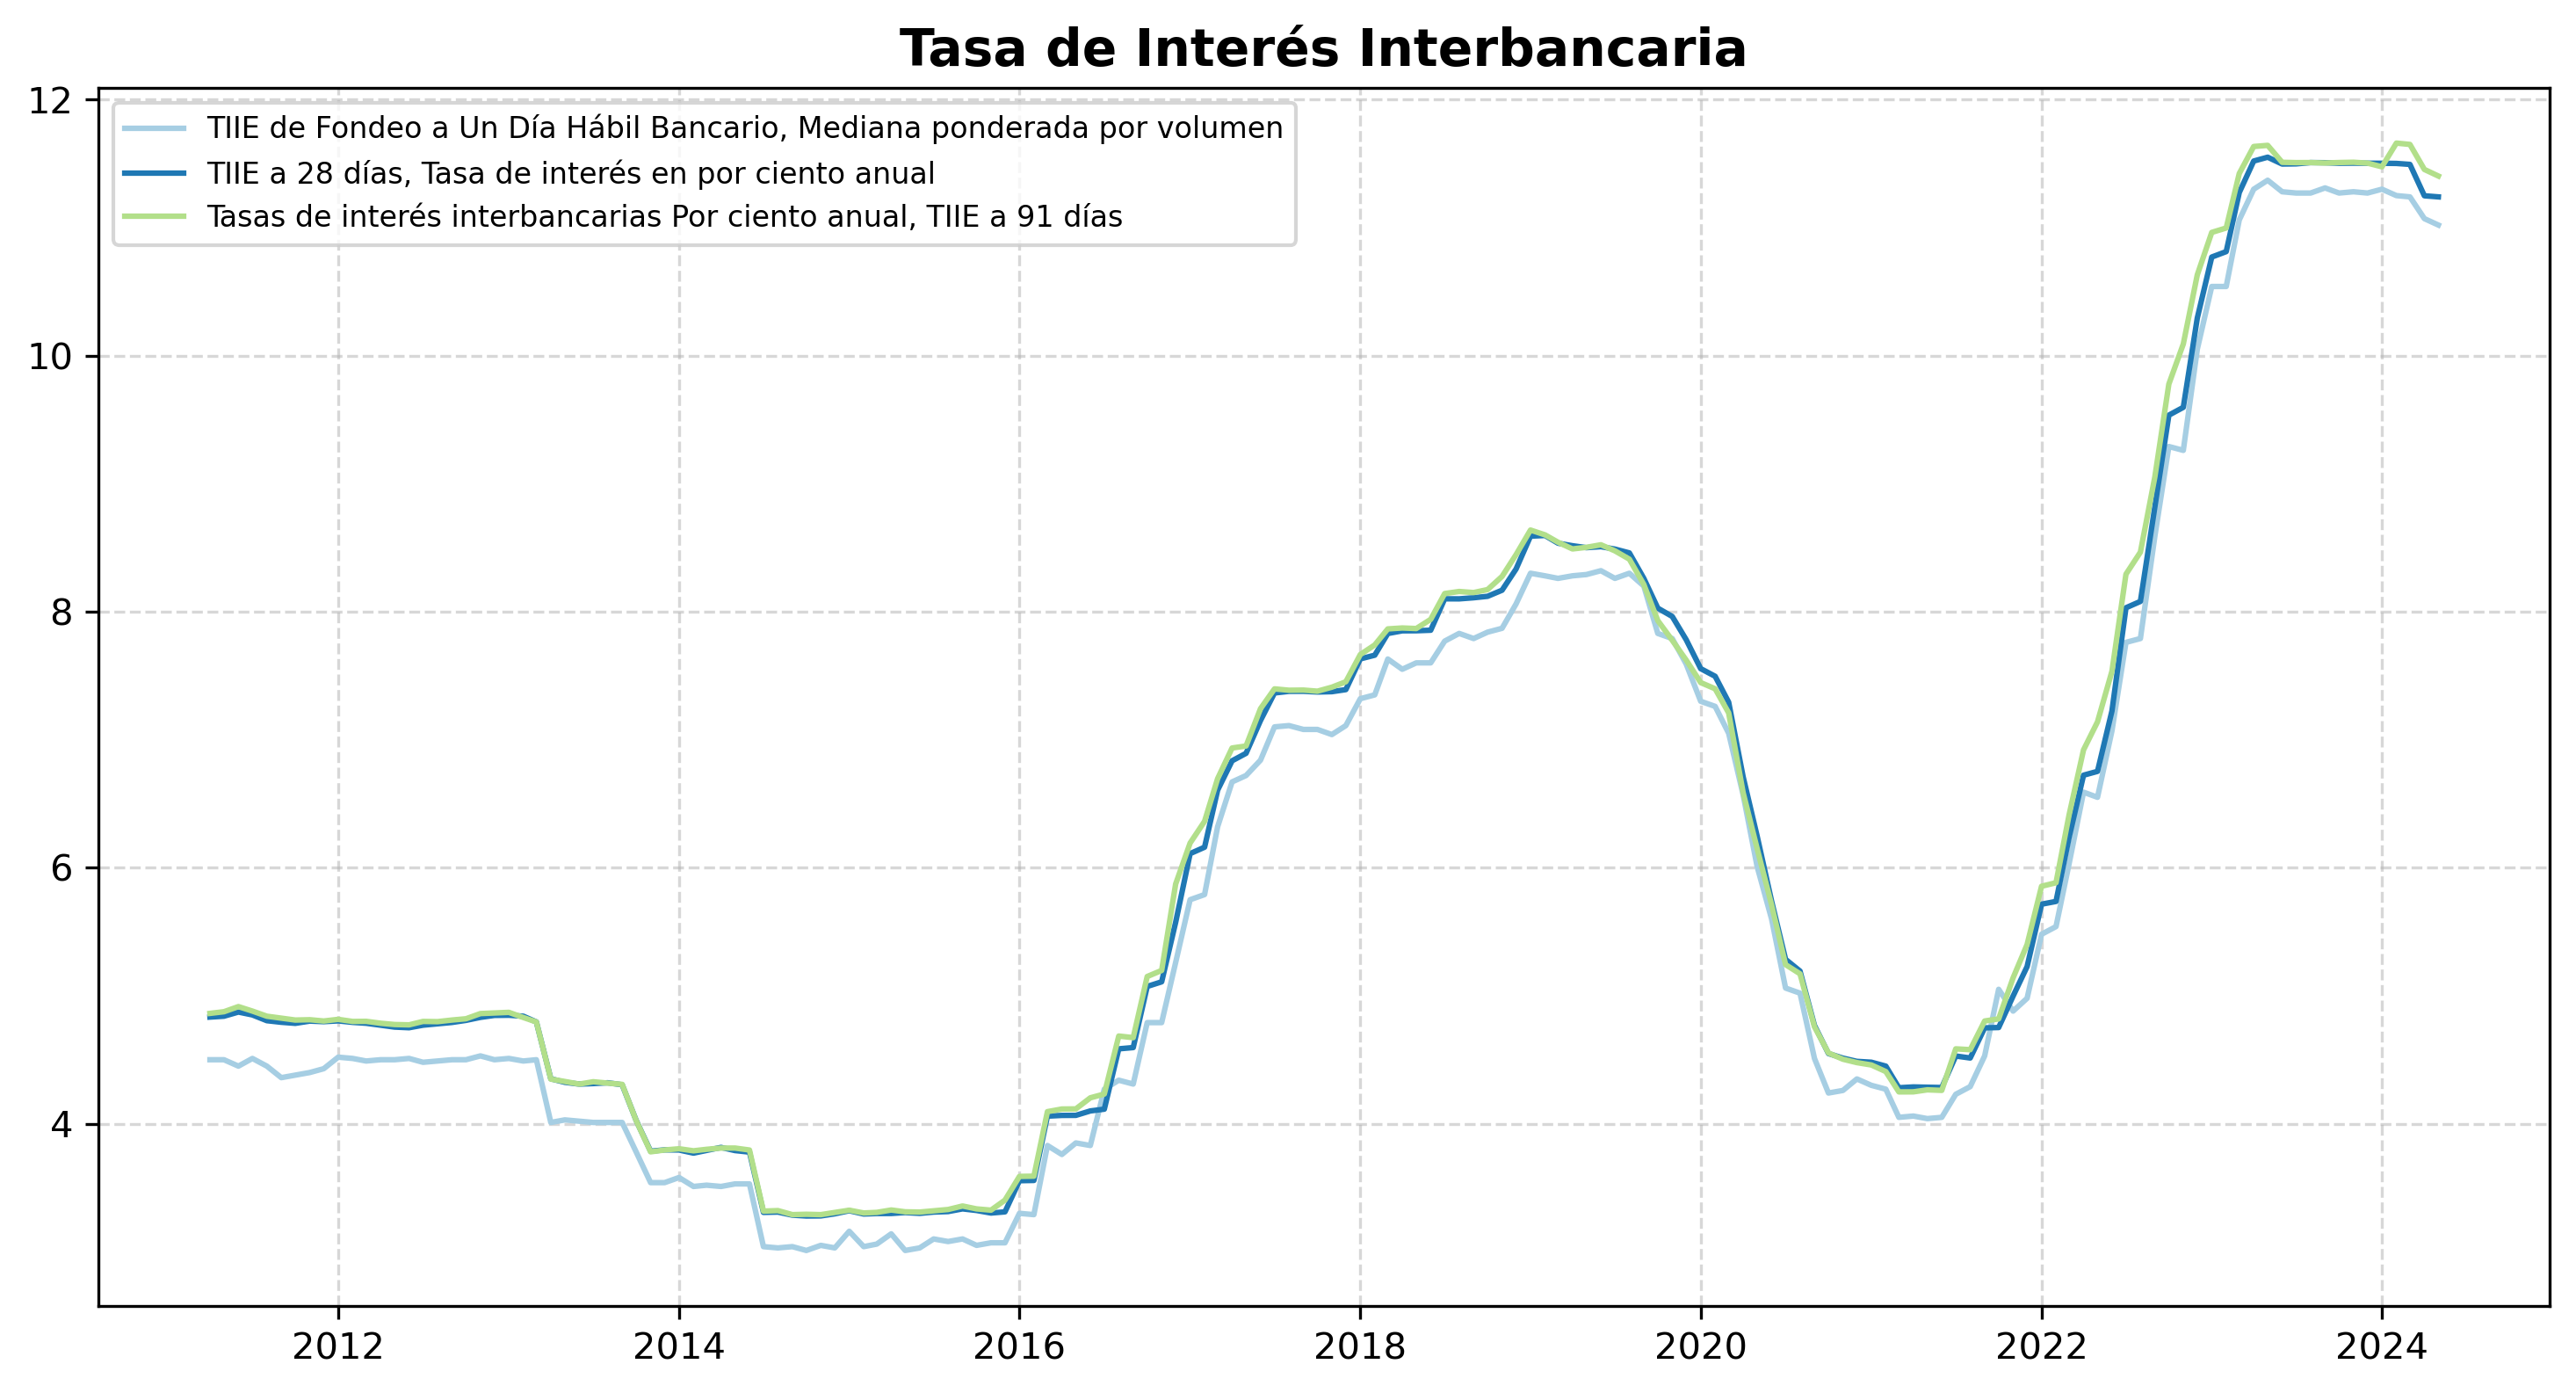

In [662]:
plot_fig(df1, "Tasa de Interés Interbancaria")

In [663]:
df2.columns

Index(['Sistemas de pago de bajo valor, Tarjetas de crédito, Tarjetas vigentes al cierre del trimestre (todas las marcas)',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), B',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), C',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), D',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), E',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), F',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), G',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), H',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), I',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), J',
       'Sistemas de pago de bajo valor, Tarjetas de crédito (todas las marcas), K',
       'Sistemas de pago de bajo val

In [664]:
df2.columns = df2.columns.str.replace("Sistemas de pago de bajo valor, Tarjetas de crédito", "")
df2.columns = df2.columns.str.replace(", ", " ")
df2.head()

0        Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-04                                       2.324182e+07              
2011-05                                       2.351398e+07              
2011-06                                       2.378613e+07              
2011-07                                       2.405829e+07              
2011-08                                       2.425563e+07              

0        (todas las marcas) B  (todas las marcas) C  (todas las marcas) D  \
2011-04               15638.0          5.804978e+06          8.242474e+06   
2011-05               15552.0          5.944675e+06          8.231955e+06   
2011-06               15466.0          6.084373e+06          8.221437e+06   
2011-07               15380.0          6.224070e+06          8.210918e+06   
2011-08               15230.0          6.298939e+06          8.207284e+06   

0        (todas las marcas) E  (todas las marcas) F  (todas las marcas) G  \
2011-04          2.931260e+06          1.109787e+06          17015.000000   
2011-05          2.971291e+06          1.130715e+06          17213.333333   
2011-06          3.011323e+06          1.151642e+06          17411.666667   
2011-07          3.051354e+06          1.172570e+06          17610.000000   
2011-08          3.032766e+06          1.188782e+06          17747.666667   

0        (todas las marcas) H  (todas las marcas) I  (todas las marcas) J  \
2011-04         198979.000000         377131.000000           1141.000000   
2011-05         205417.000000         374121.333333           1168.666667   
2011-06         211855.000000         371111.666667           1196.333333   
2011-07         218293.000000         368102.000000           1224.000000   
2011-08         222550.666667         365889.000000           1244.333333   

0        (todas las marcas) K  (todas las marcas) L  (todas las marcas) M  \
2011-04         411134.000000          21142.000000          81548.000000   
2011-05         420939.000000          21565.000000          79262.333333   
2011-06         430744.000000          21988.000000          76976.666667   
2011-07         440549.000000          22411.000000          74691.000000   
2011-08         442583.333333          22811.333333          73700.666667   

0        (todas las marcas) N  (todas las marcas) O  (todas las marcas) P  \
2011-04          24560.000000          1.852871e+06         700973.000000   
2011-05          23558.333333          1.875477e+06         706586.000000   
2011-06          22556.666667          1.898083e+06         712199.000000   
2011-07          21555.000000          1.920689e+06         717812.000000   
2011-08          21807.000000          1.945552e+06         725623.333333   

0        (todas las marcas) Q  (todas las marcas) R  (todas las marcas) S  \
2011-04           4003.000000                   0.0          30103.000000   
2011-05           3953.333333                   0.0          28768.000000   
2011-06           3903.666667                   0.0          27433.000000   
2011-07           3854.000000                   0.0          26098.000000   
2011-08           3616.333333                   0.0          25000.666667   

0        (todas las marcas) T  (todas las marcas) U  (todas las marcas) V  \
2011-04                   0.0          1.341344e+06          75736.000000   
2011-05                   0.0          1.387796e+06          73961.000000   
2011-06                   0.0          1.434249e+06          72186.000000   
2011-07                   0.0          1.480701e+06          70411.000000   
2011-08                   0.0          1.575749e+06          68752.666667   

0        (todas las marcas) W  (todas las marcas) X  (todas las marcas) Y  \
2011-04                   0.0                   0.0                   0.0   
2011-05                   0.0                   0.0                   0.0   
2011-06                   0.0                   0.0                   0.0   
2011-07     

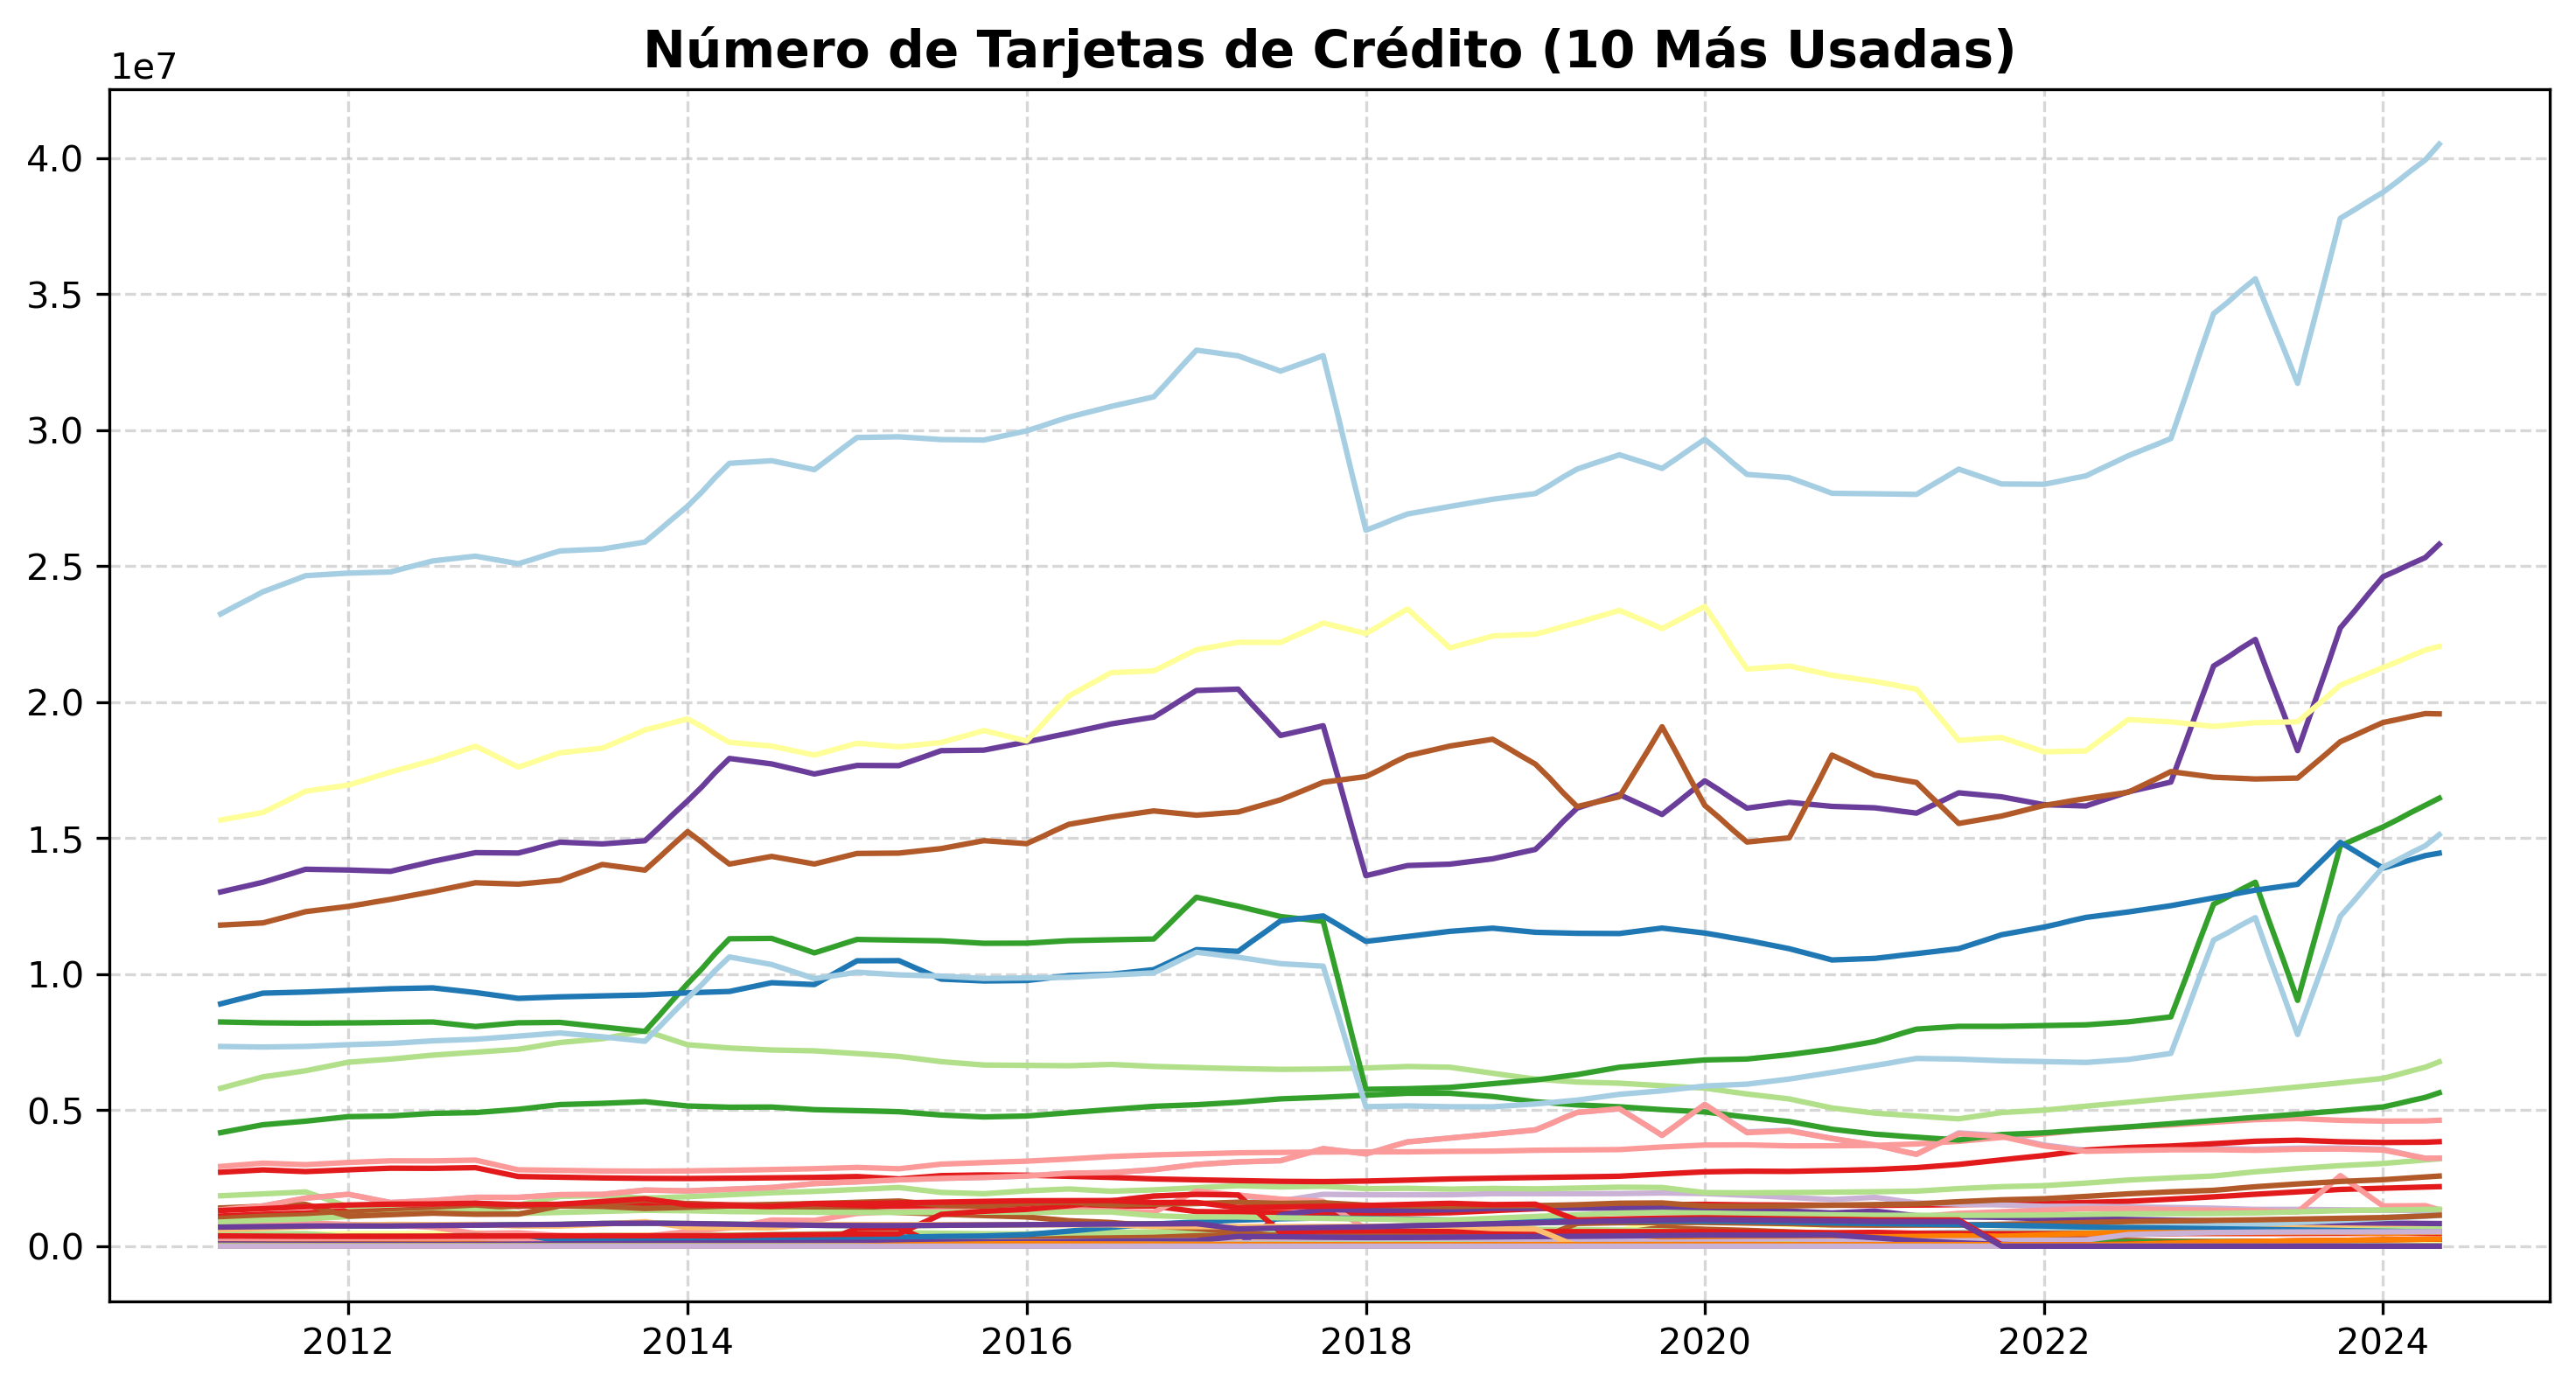

In [665]:
plot_fig(df2, "Número de Tarjetas de Crédito (10 Más Usadas)", legend = False)

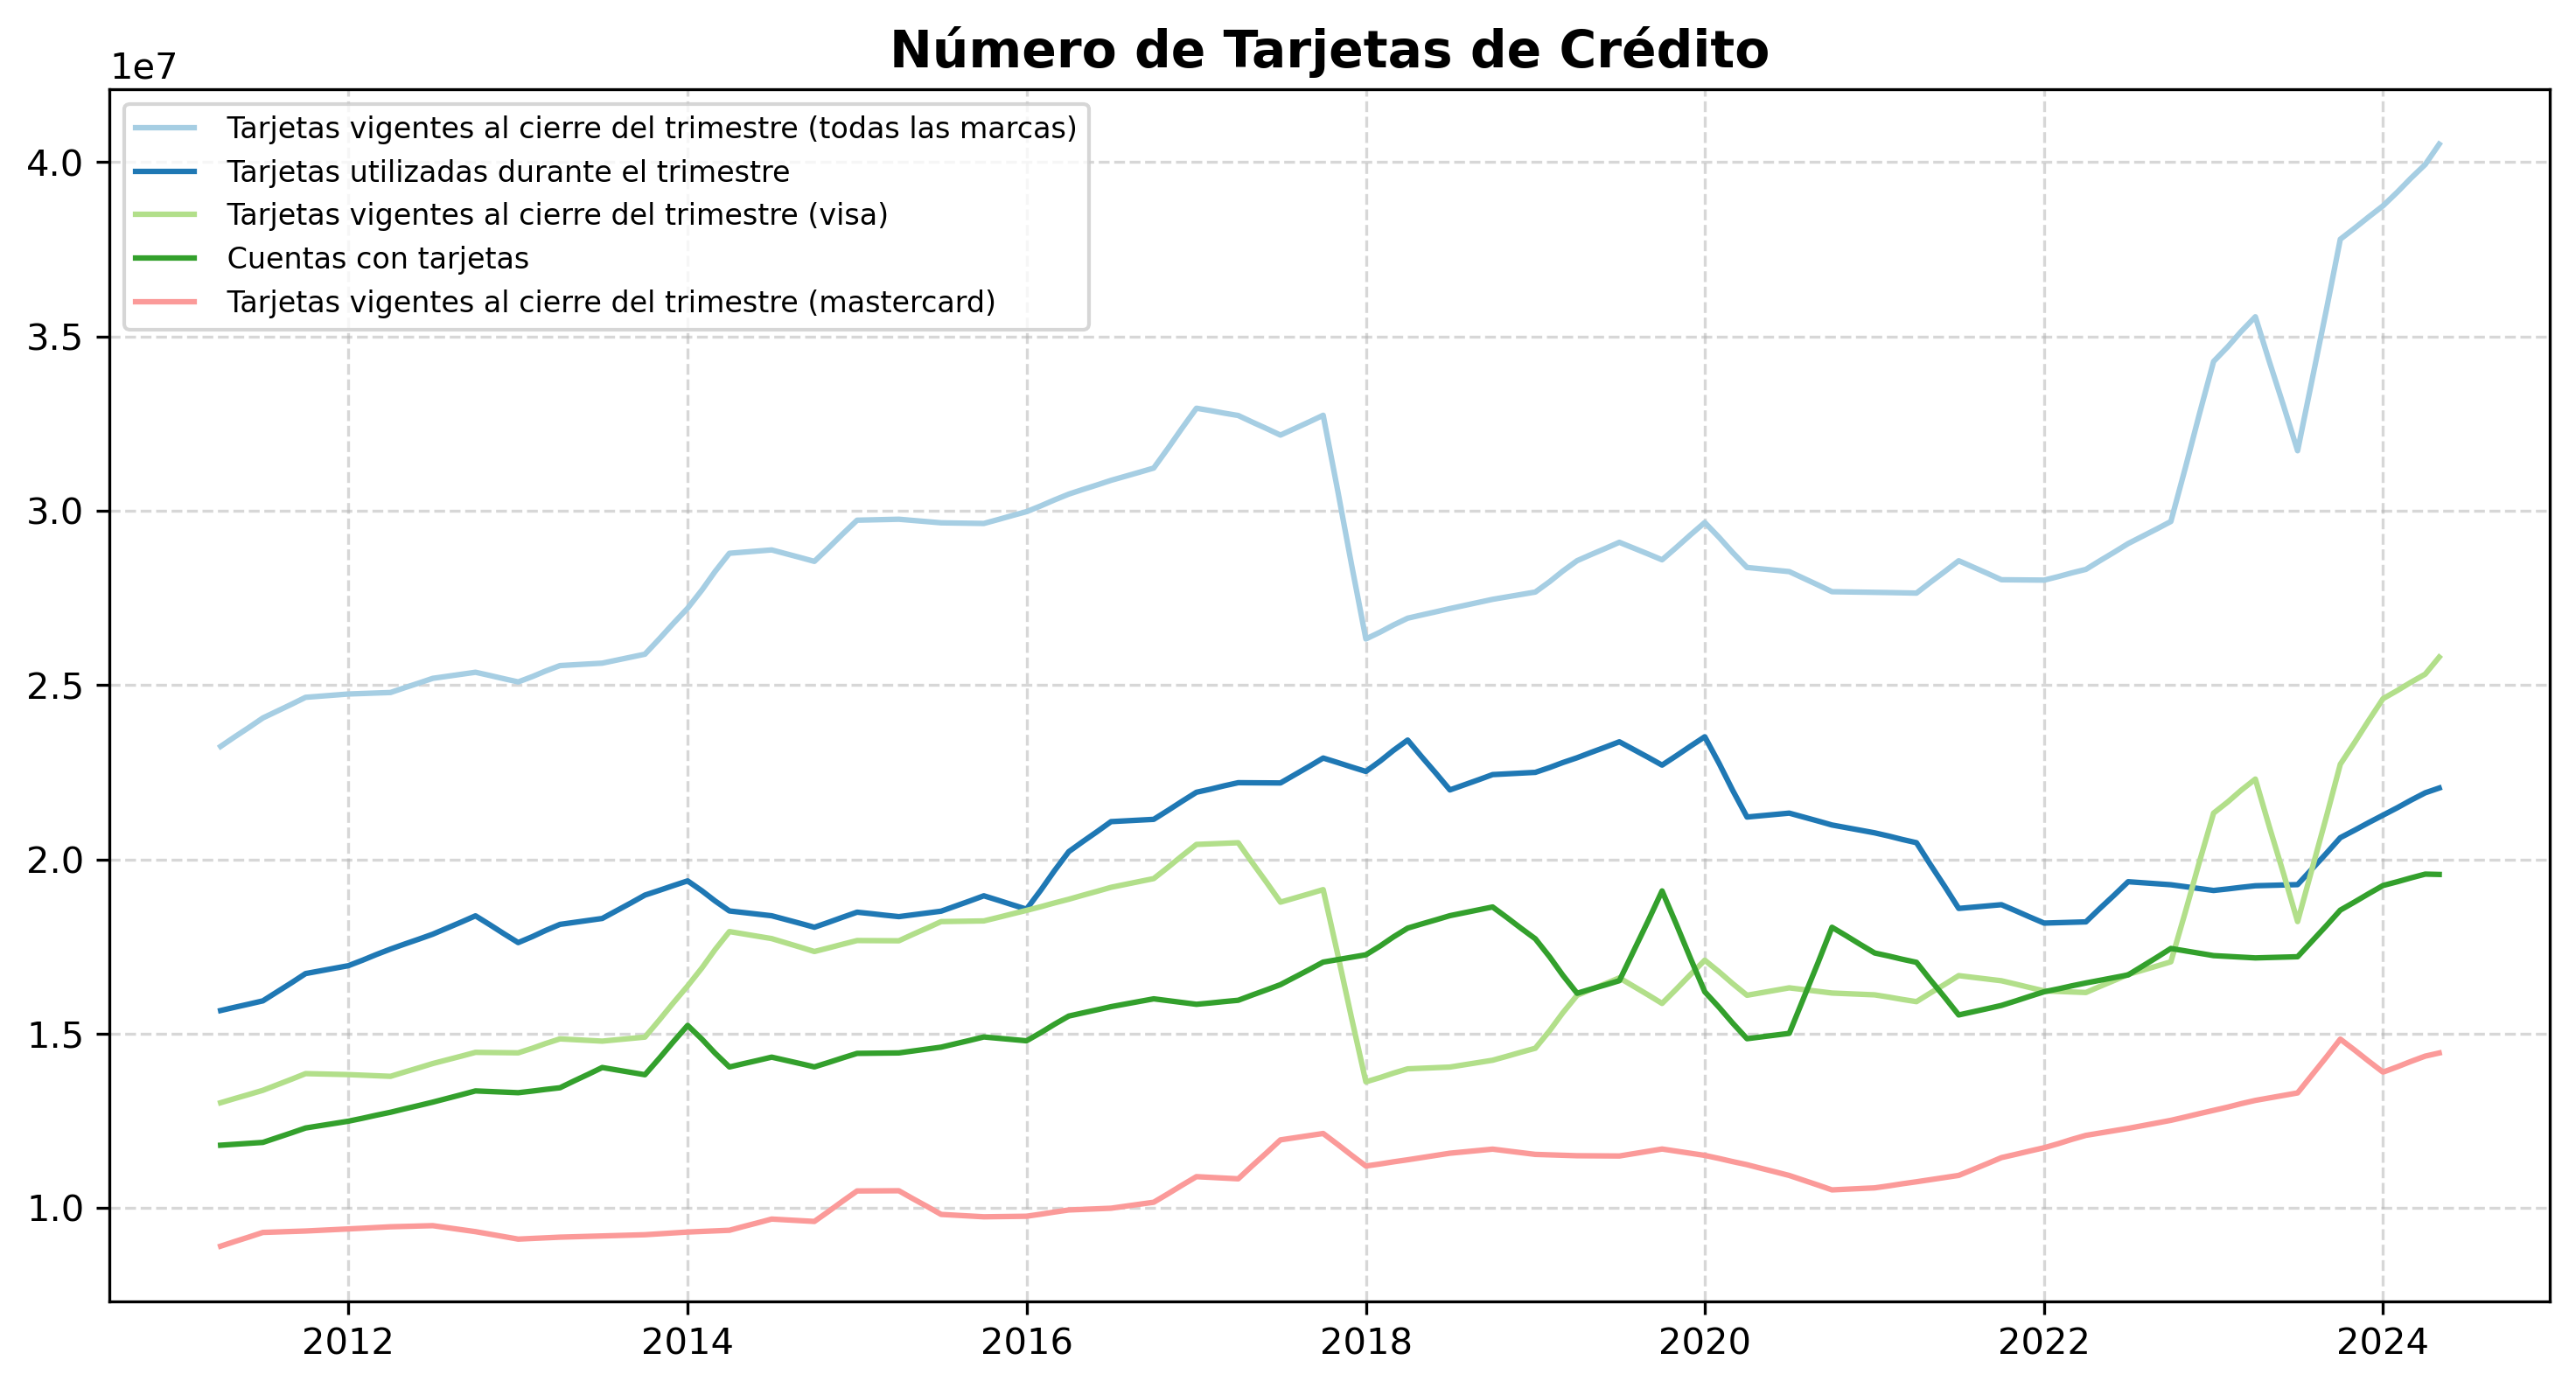

In [666]:
# keep the columns with the highest number of transactions
max_cols = df2.sum().nlargest(5).index
df2_max = df2[max_cols]

plot_fig(df2_max, "Número de Tarjetas de Crédito")

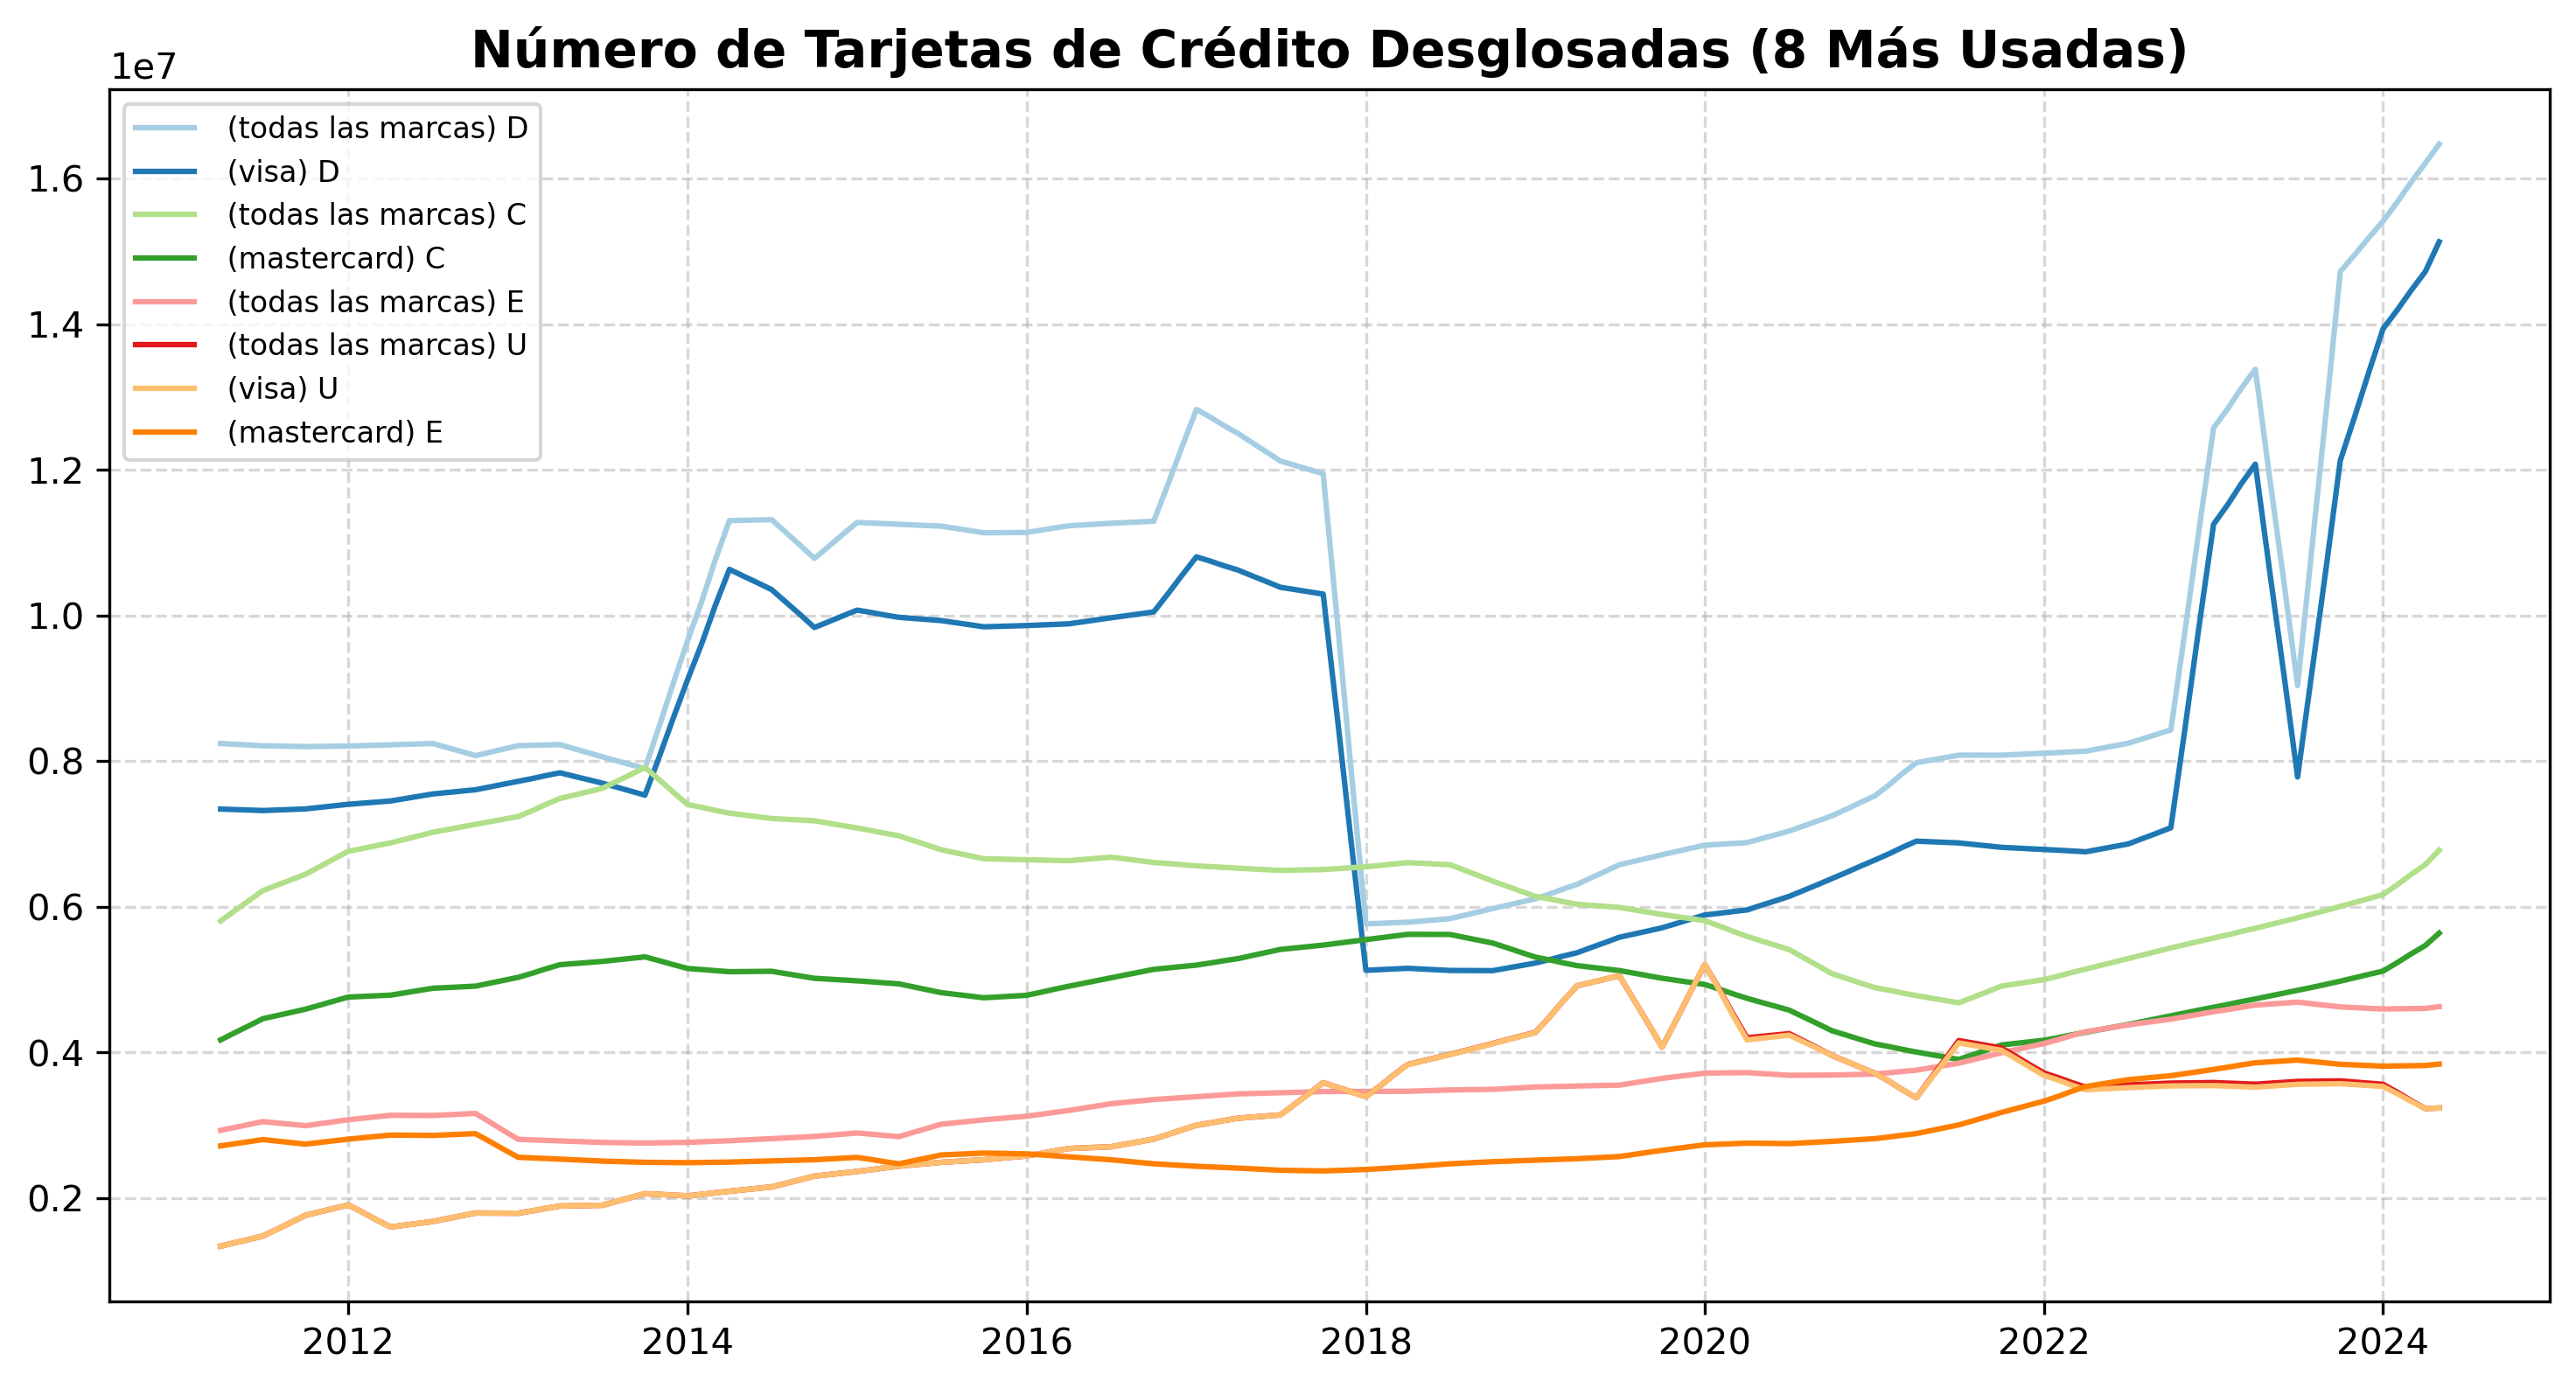

In [667]:
df2_min = df2.drop(max_cols, axis=1)
max_cols = df2_min.sum().nlargest(8).index
df2_win_max = df2[max_cols]

plot_fig(df2_win_max, "Número de Tarjetas de Crédito Desglosadas (8 Más Usadas)", legend = True)

In [668]:
df3.columns

Index(['TIIE a 28 días, Tasa de interés promedio mensual, en por ciento anual',
       'TIIE a 91 días, Tasa de interés promedio mensual, en por ciento anual',
       'TIIE a 182 días, Tasa de interés promedio mensual, en por ciento anual',
       'Fondeo promedio ponderado bancario, Tasa de interés promedio mensual, en por ciento anual',
       'Fondeo promedio ponderado gubernamental, Tasa de interés promedio mensual, en por ciento anual'],
      dtype='object', name=0)

In [669]:
df3.columns = df3.columns.str.replace(", Tasa de interés promedio mensual, en por ciento anual", "")

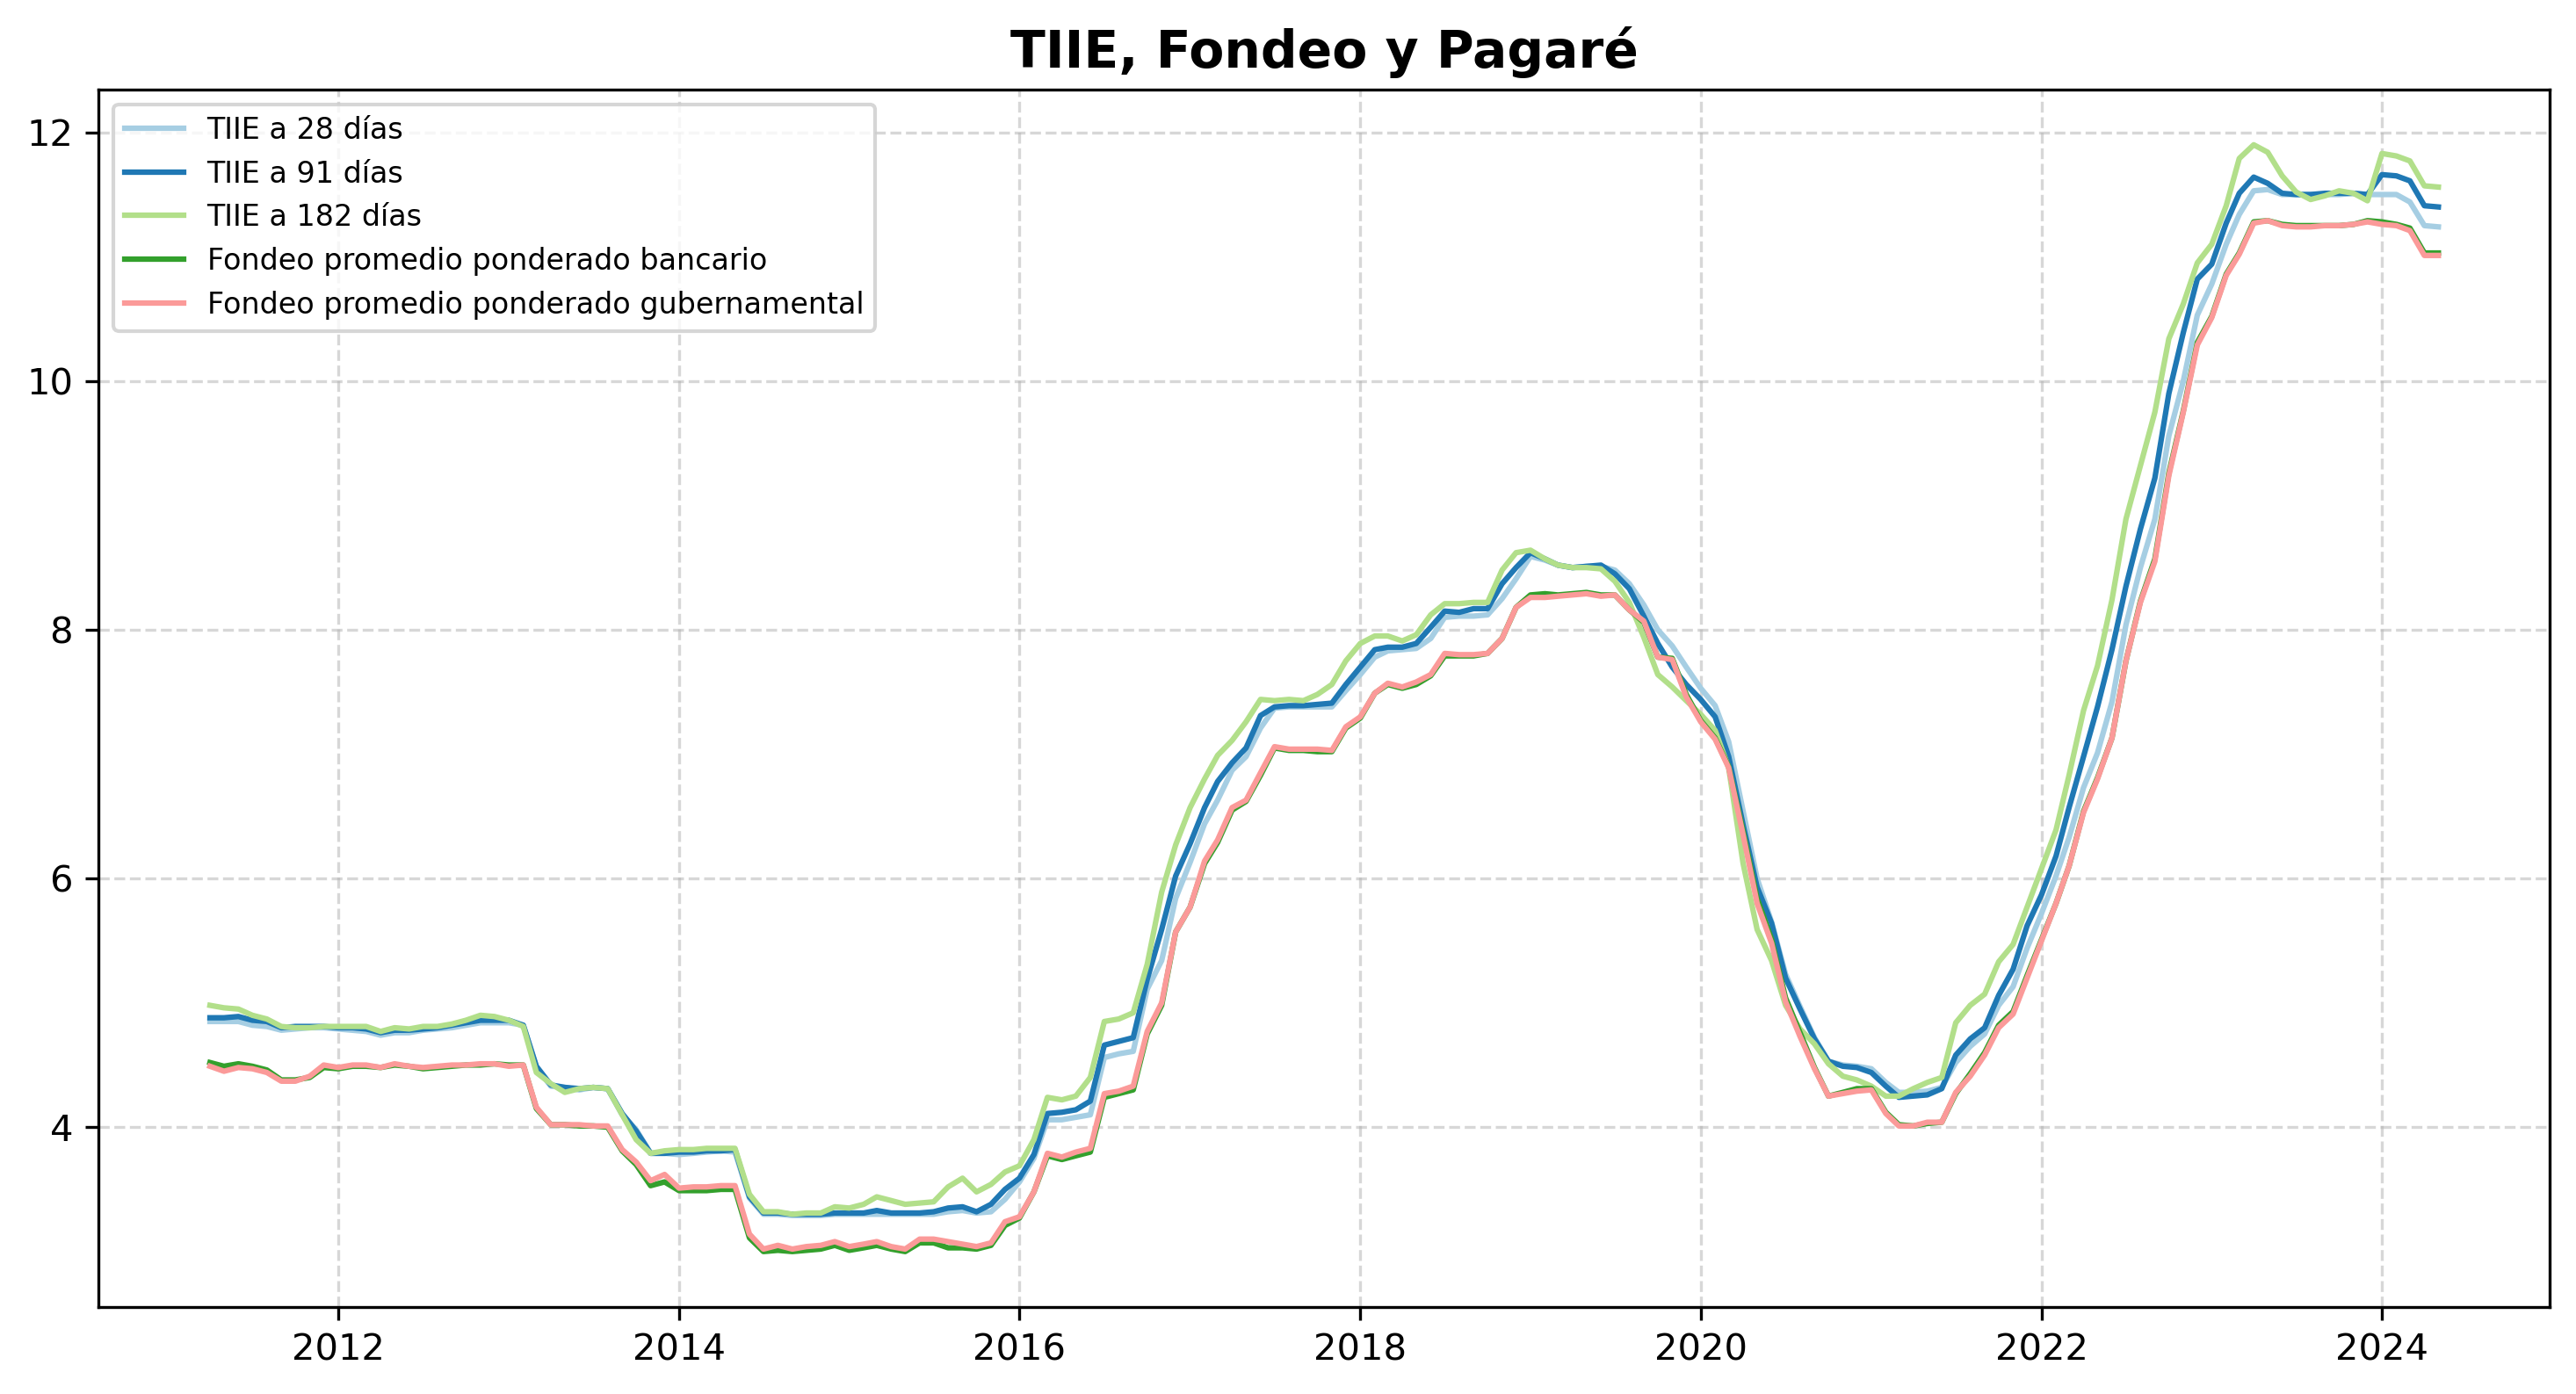

In [670]:
plot_fig(df3, "TIIE, Fondeo y Pagaré")

In [671]:
df4.columns

Index(['Tasa de efectiva promedio ponderada por saldo de todos los clientes con y sin promociones, Tarjetas de crédito',
       'Tasa de efectiva promedio ponderada por saldo de clientes no totaleros con y sin promociones, Tarjetas de crédito',
       'Tasa de efectiva promedio ponderada por saldo de clientes no totaleros sin promociones, Tarjetas de crédito'],
      dtype='object', name=0)

In [672]:
df4.columns = df4.columns.str.replace("Tasa de efectiva promedio ponderada por saldo de t", "T")
df4.columns = df4.columns.str.replace("Tasa de efectiva promedio ponderada por saldo de c", "C")
df4.columns = df4.columns.str.replace(", Tarjetas de crédito", "")


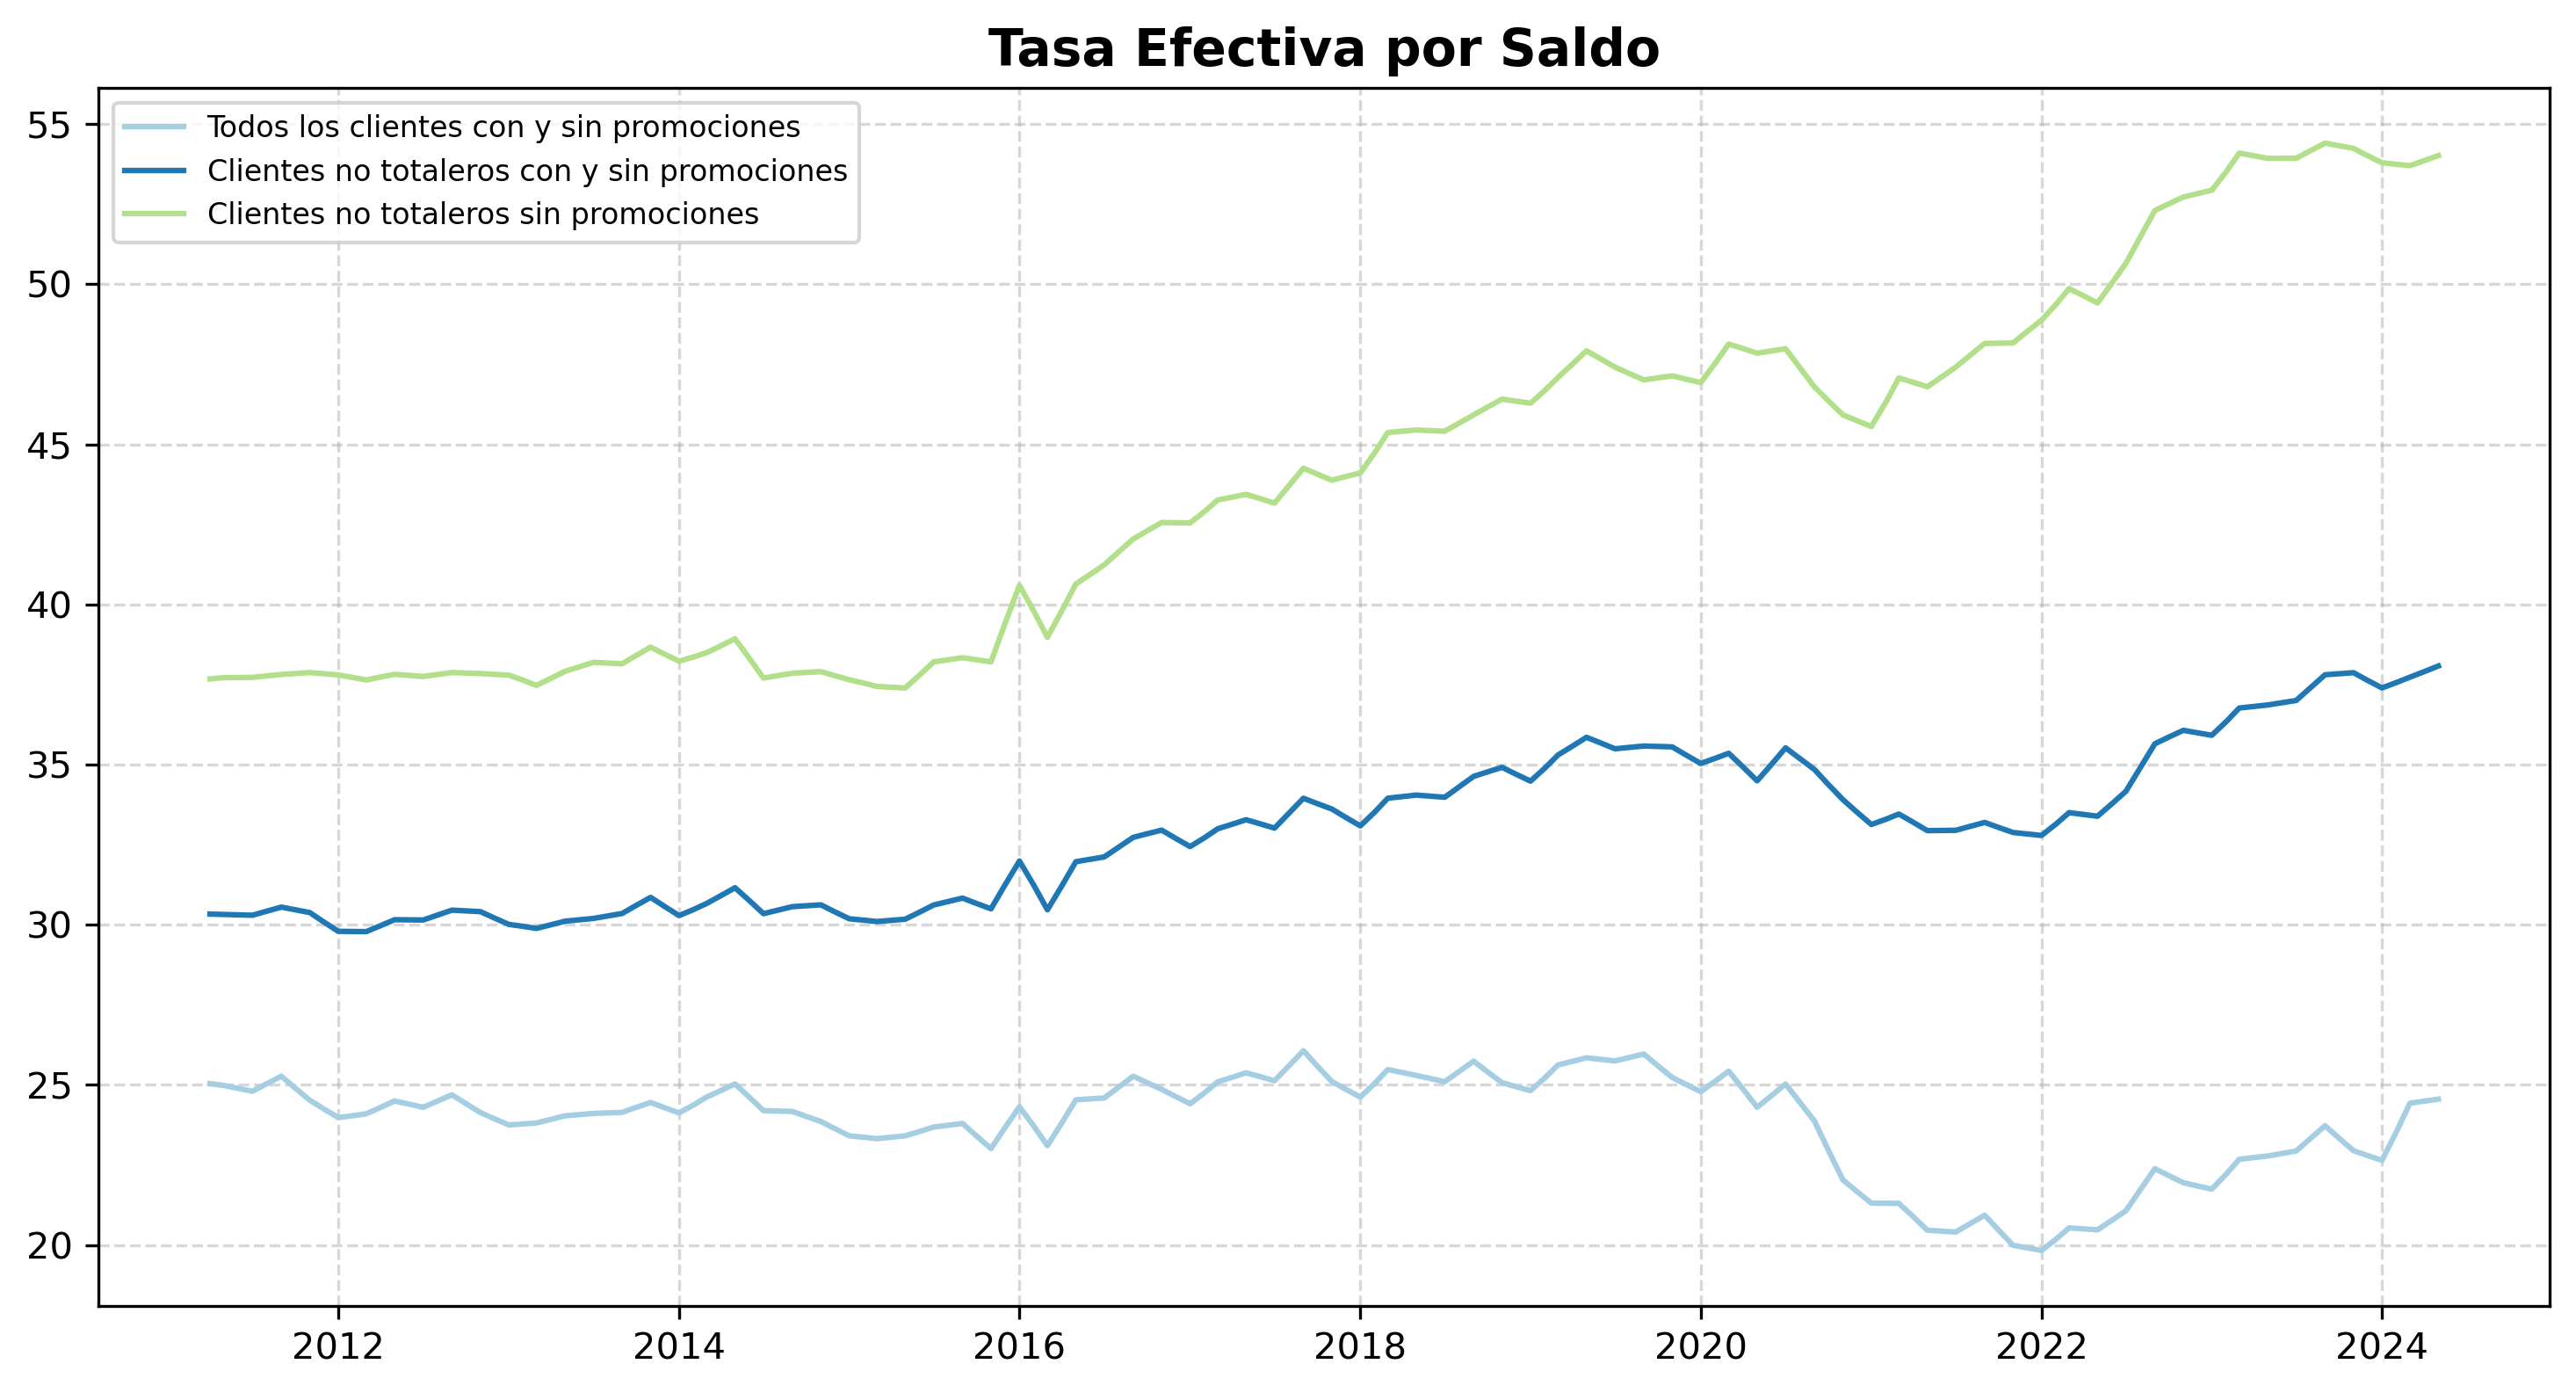

In [673]:
plot_fig(df4, "Tasa Efectiva por Saldo")

In [674]:
df5.columns 

Index(['Costo de captación a plazo de pasivos en moneda nacional (CCP), Tasa en por ciento anual',
       'Costo de captación a plazo de pasivos en moneda nacional observado (CCPO), Tasa en por ciento anual',
       'Costo de captación a plazo de pasivos en Udis (CCP-Udis), Tasa en por ciento anual',
       'Costo de captación a plazo de pasivos en dólares (CCP-Dólares), Tasa en por ciento anual',
       'Costo porcentual promedio (CPP), Tasa en por ciento anual',
       'Tasa de interés de los pasivos a plazo, Moneda nacional, Banca de Desarrollo'],
      dtype='object', name=0)

In [675]:
df5colnames = ["CCP", "CCPO", "CCP-Udis", "CCP-Dólares", "CPP", "Banca de Desarrollo"]

df5.columns = df5colnames

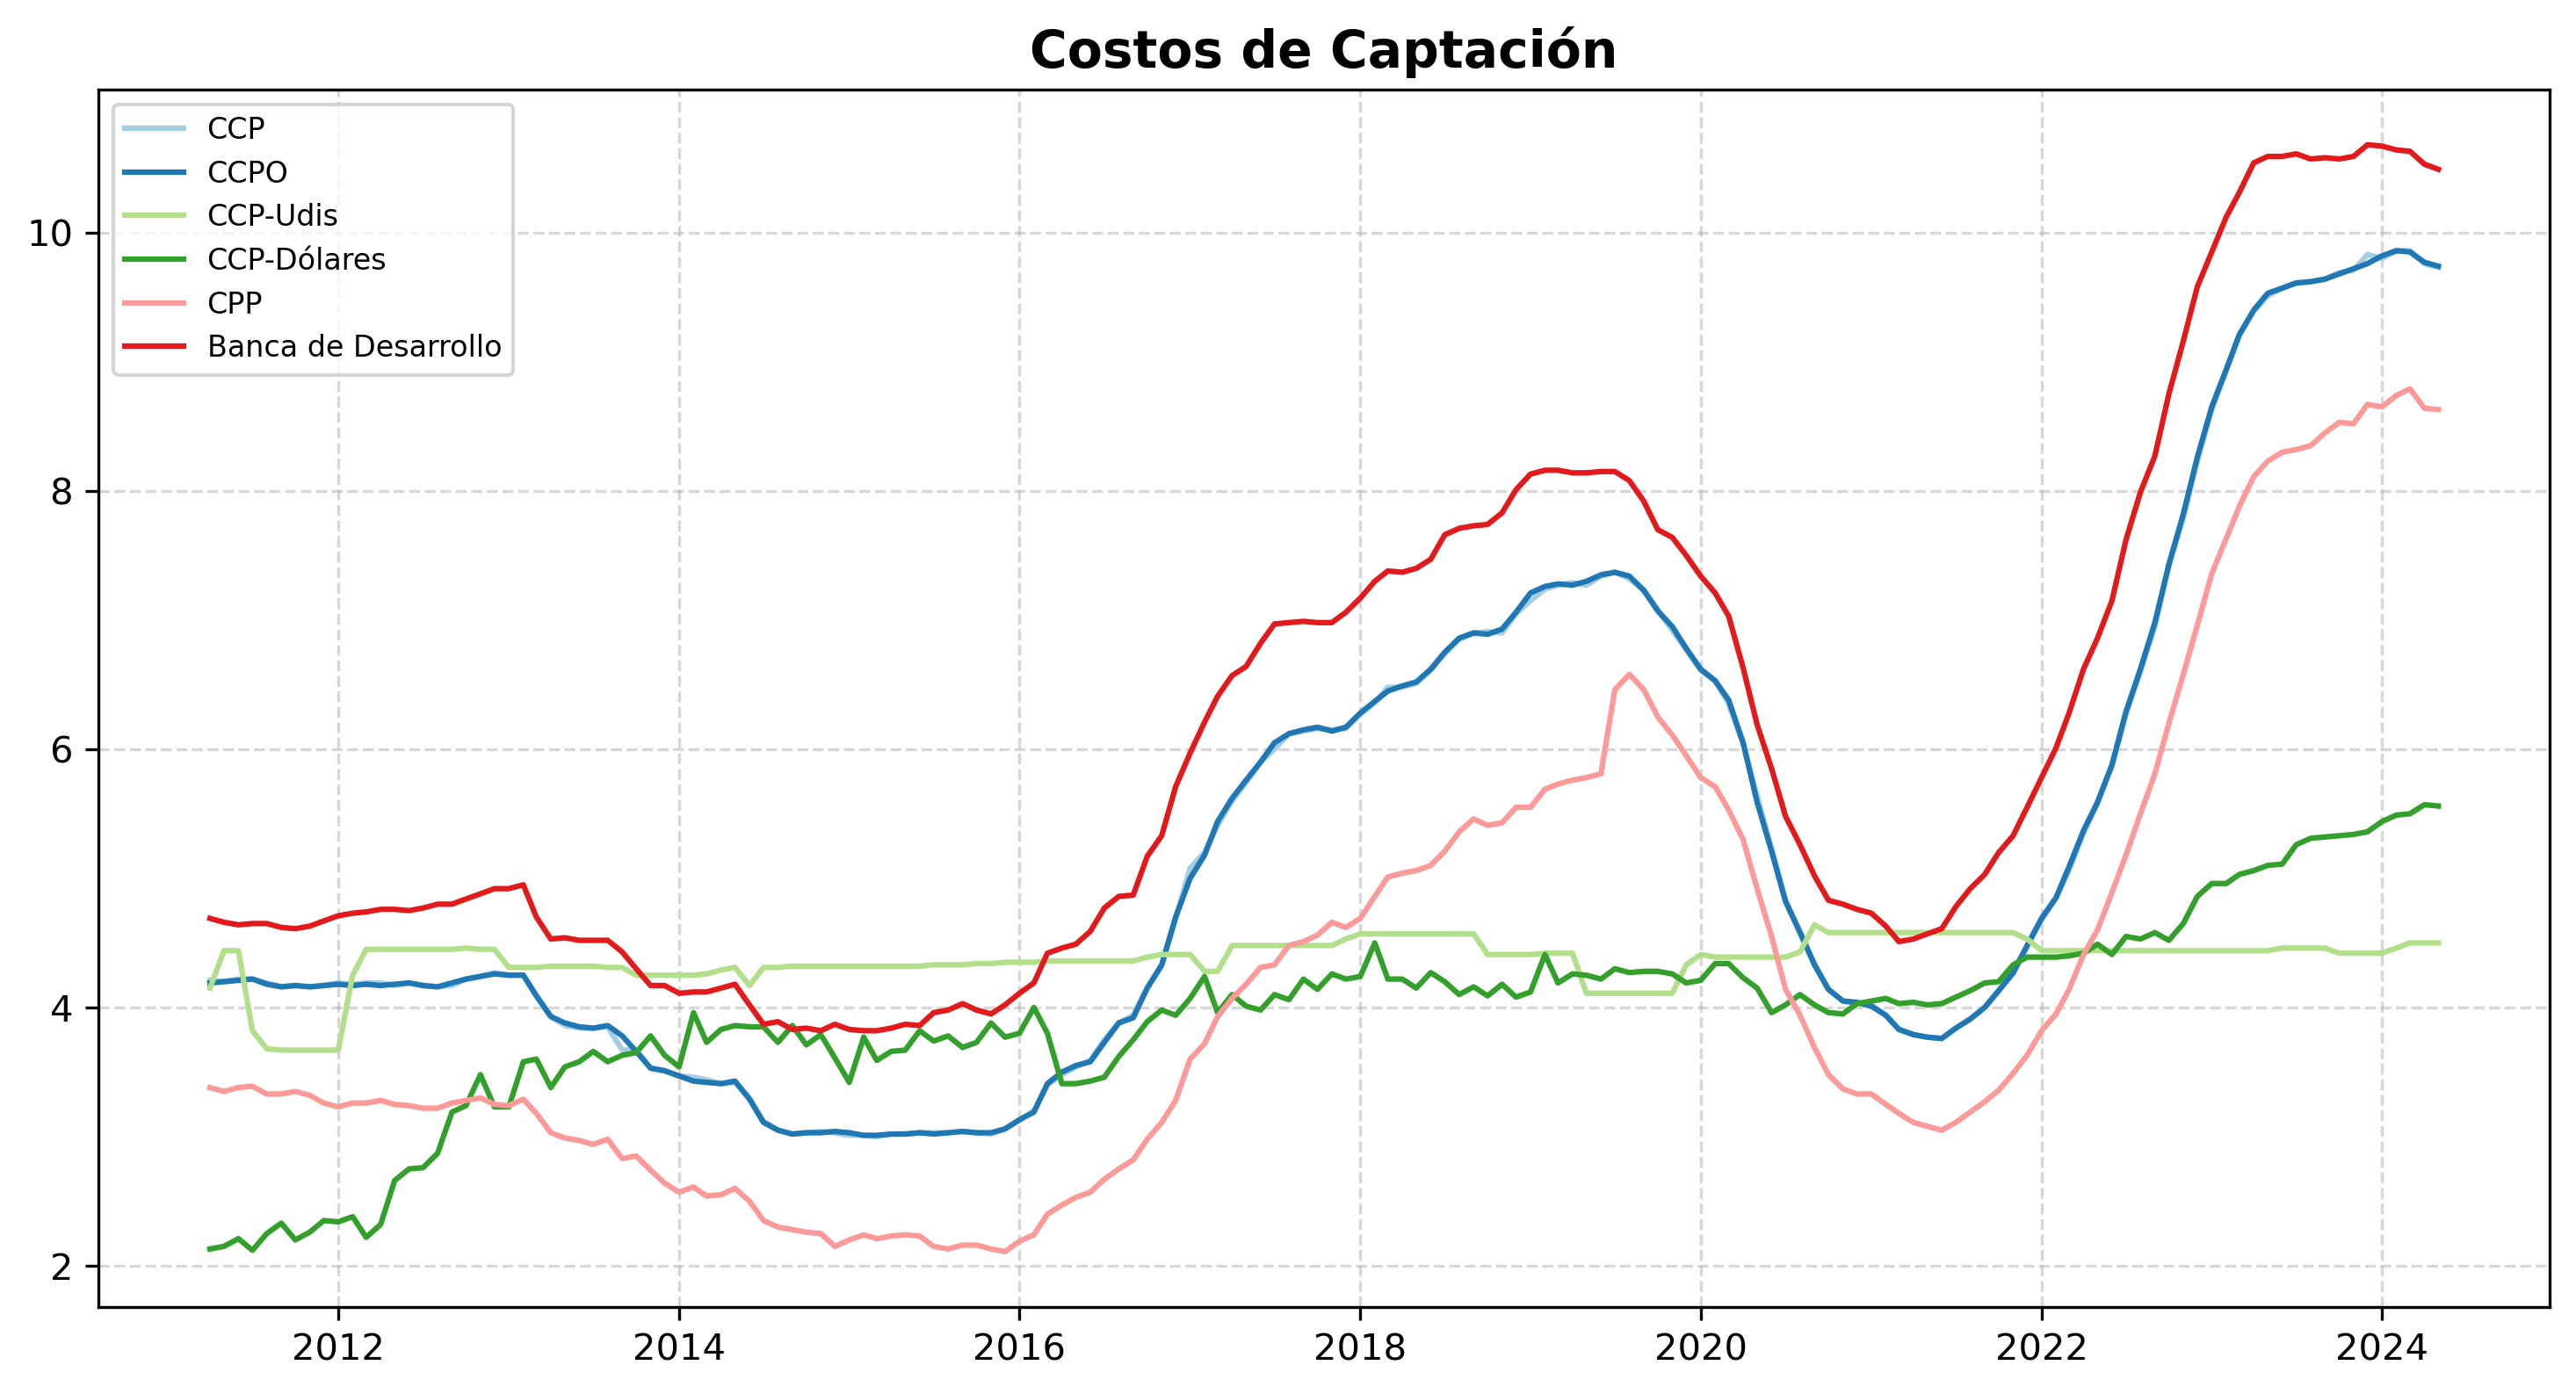

In [676]:
plot_fig(df5, "Costos de Captación")

In [677]:
df6.columns

Index(['Valores privados de corto plazo semanal, Total corto plazo, tasa promedio ponderada, Porcentajes', 'Valores privados de corto plazo semanal, Certificados bursátiles a corto plazo, tasa promedio ponderada, Porcentajes'], dtype='object', name=0)

In [678]:
df6.columns = df6.columns.str.replace("Valores privados de corto plazo semanal, ", "")
df6.columns = df6.columns.str.replace(", tasa promedio ponderada, Porcentajes", "")

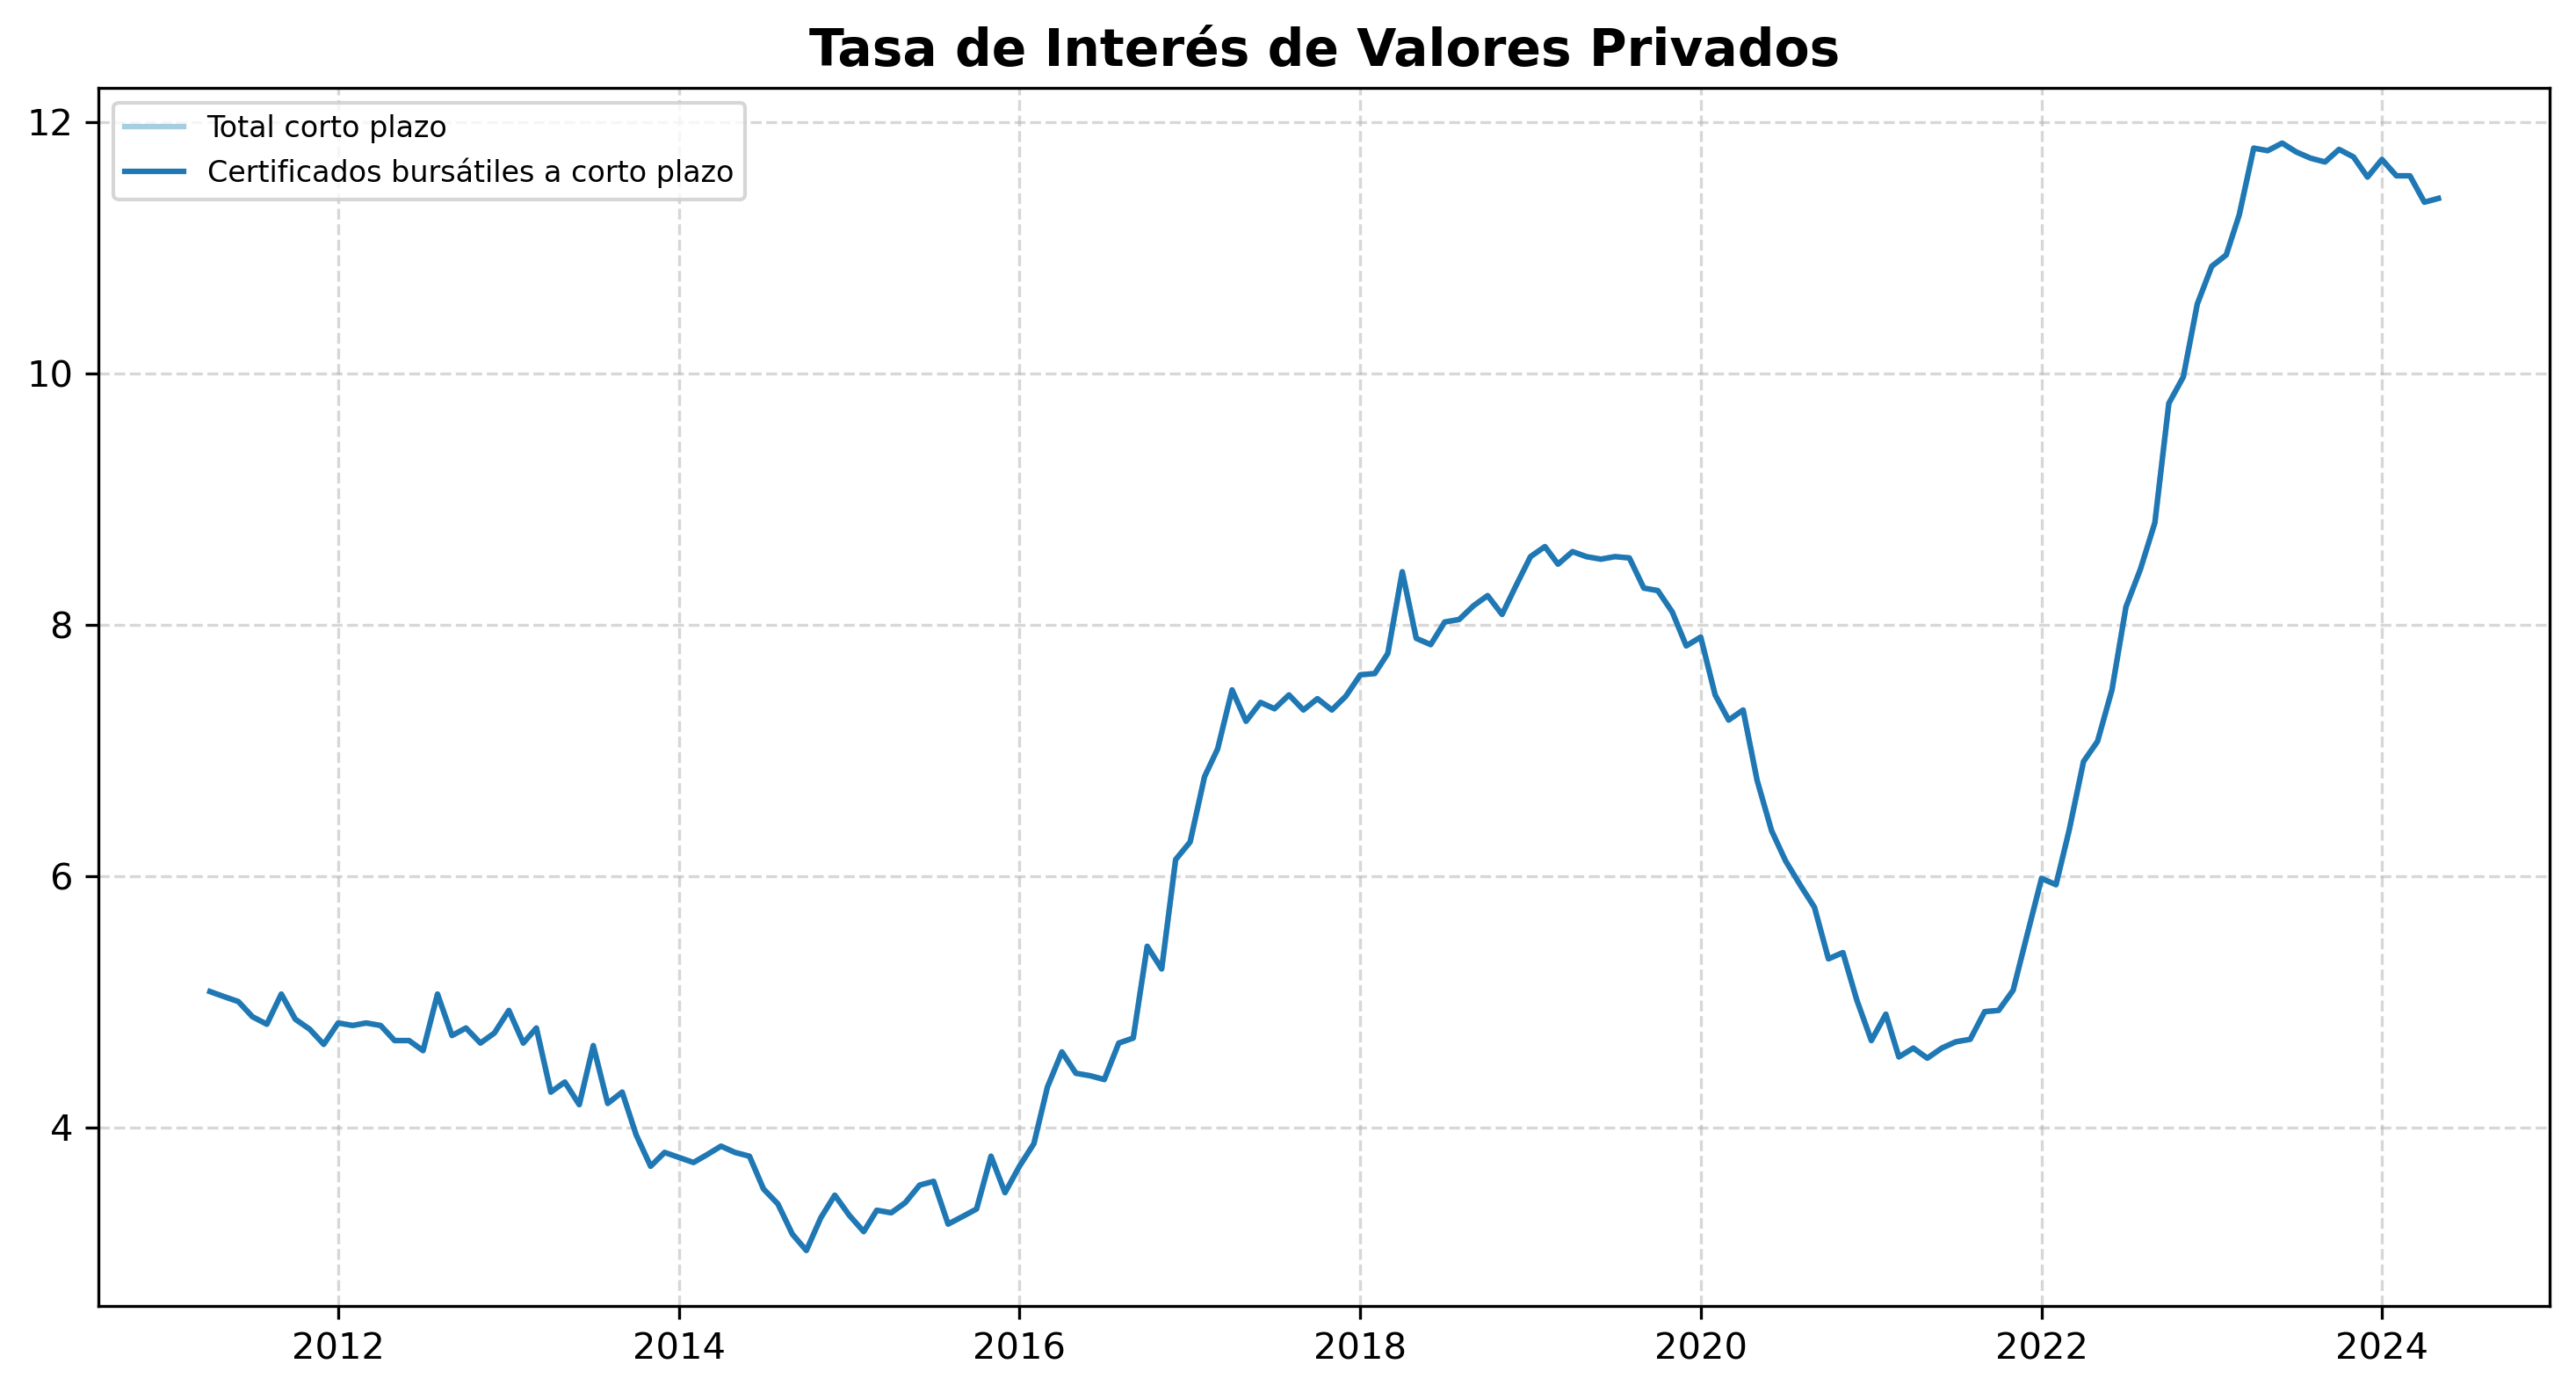

In [679]:
plot_fig(df6, "Tasa de Interés de Valores Privados")

In [680]:
df7.columns

Index(['Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual', 'Tasa de fondeo ponderada con BPAS y BREMS.'], dtype='object', name=0)

In [681]:
df7.columns = df7.columns.str.replace(", Tasa de interés en por ciento anual", "")

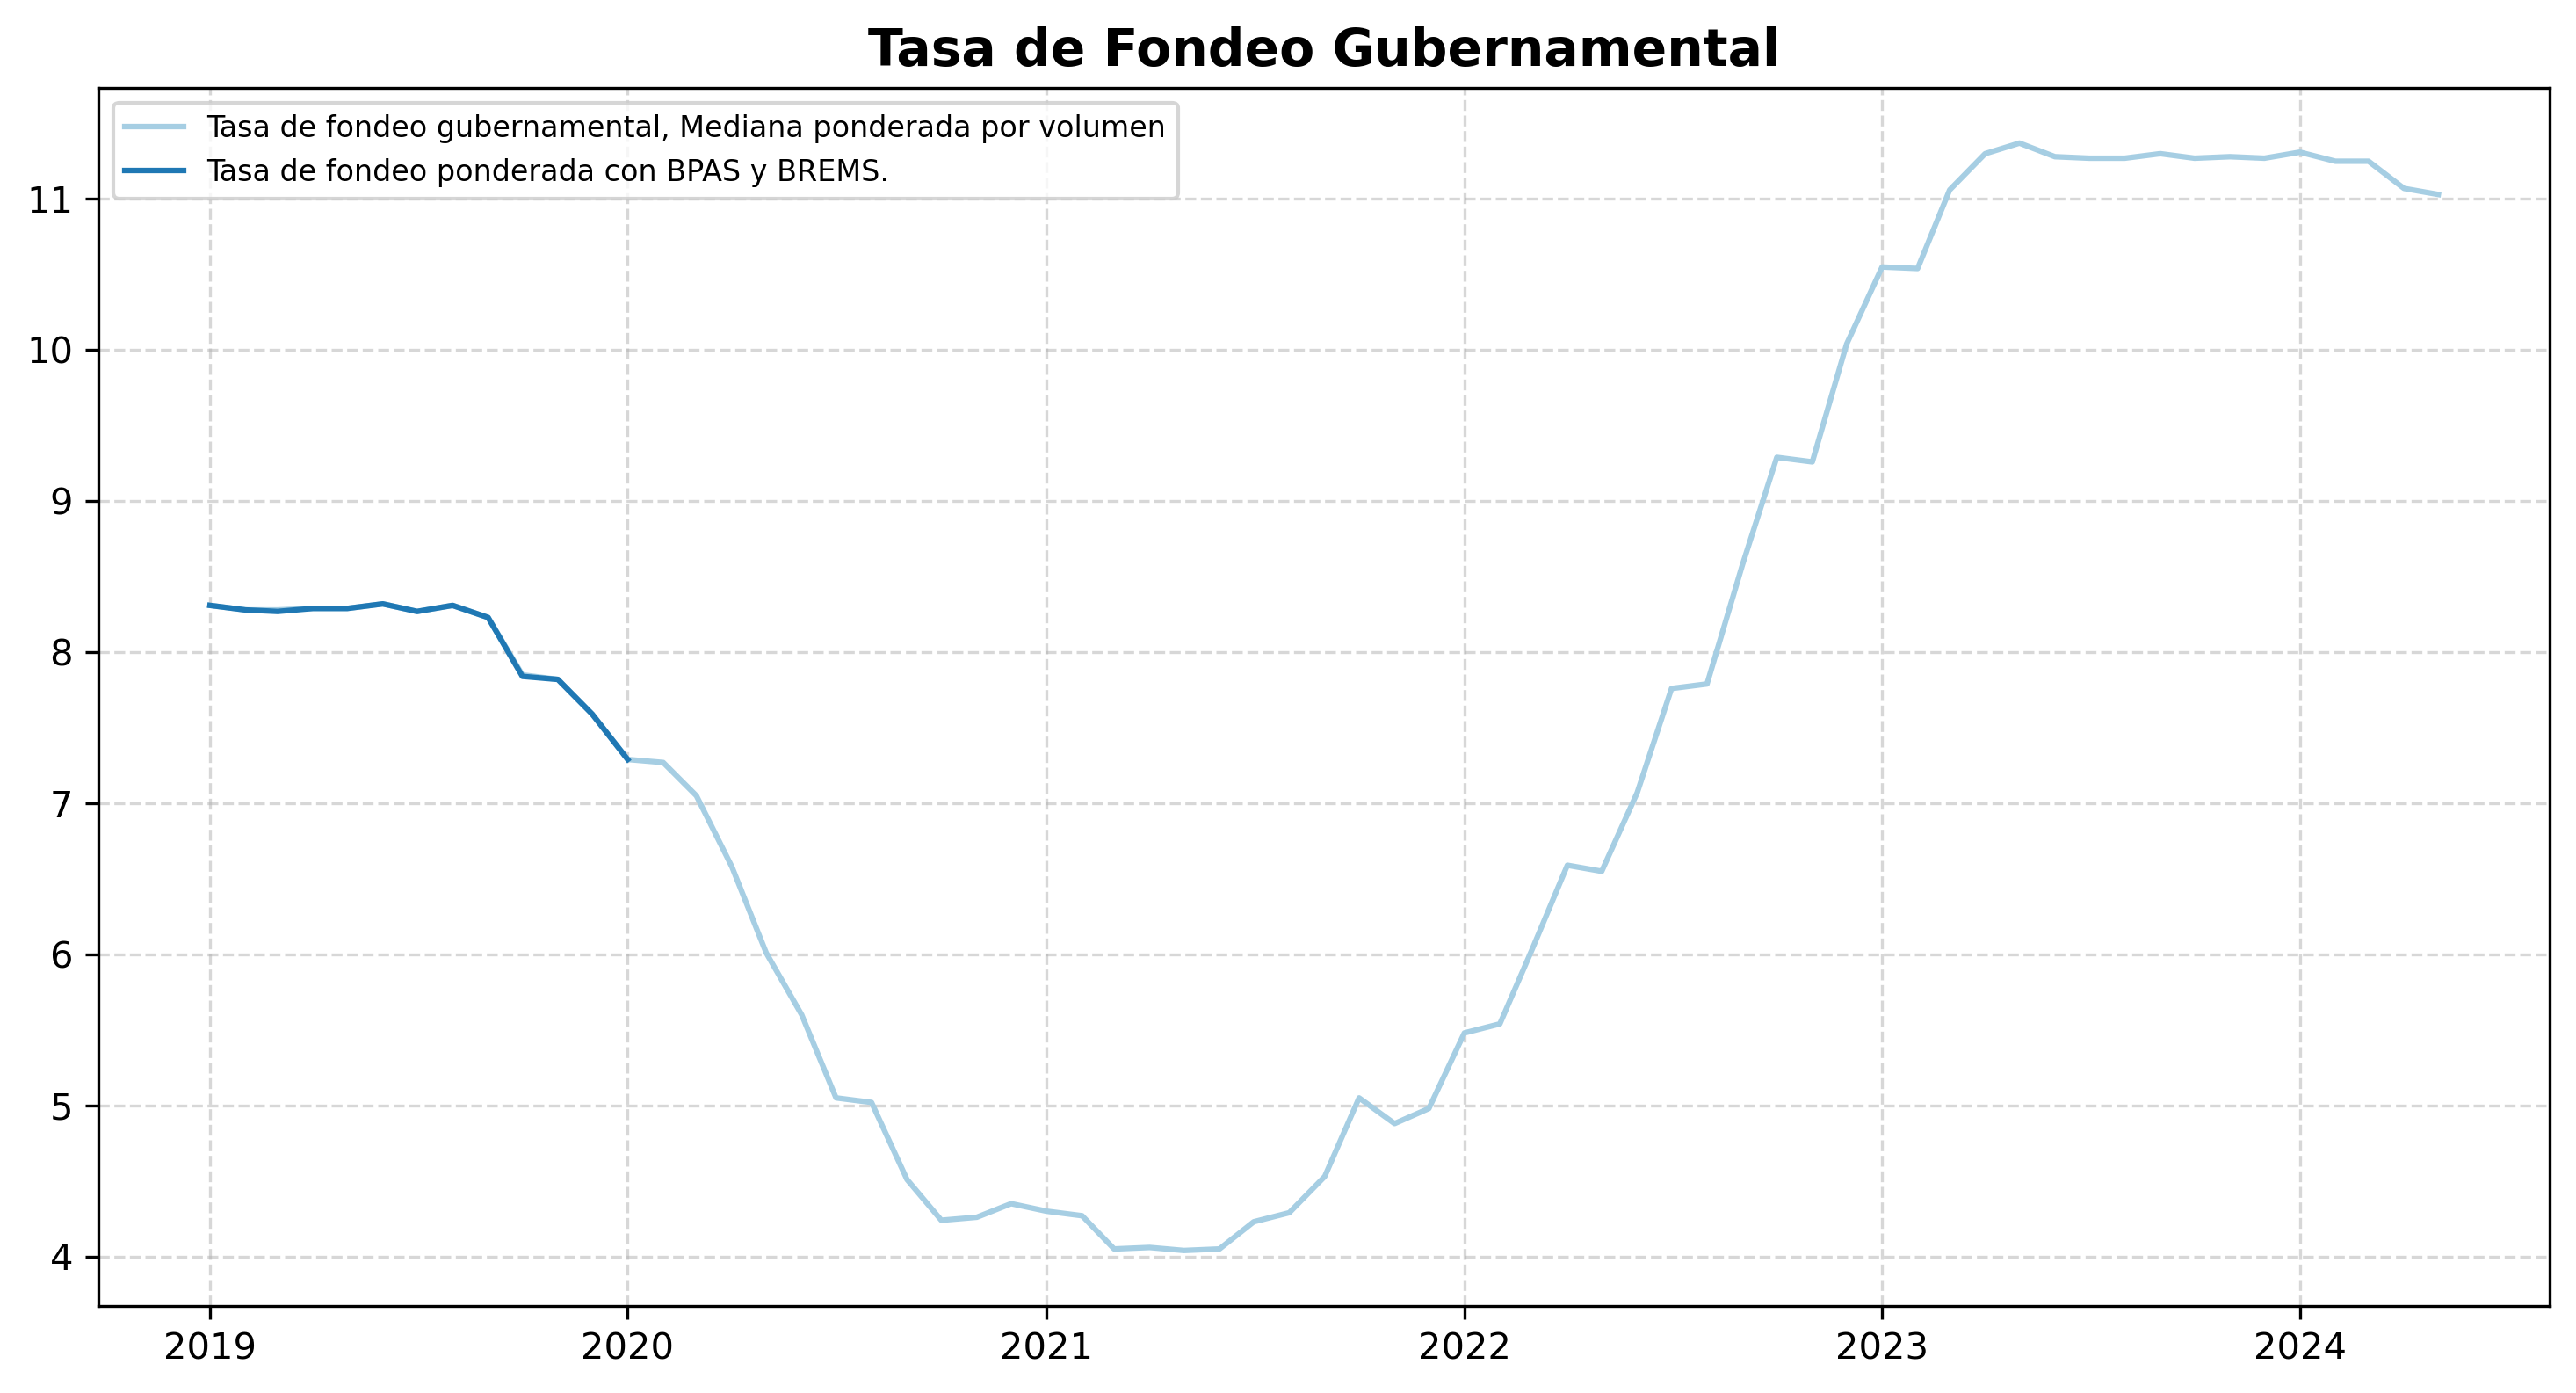

In [682]:
plot_fig(df7, "Tasa de Fondeo Gubernamental")

In [683]:
df8.columns

Index(['Vector de precios de títulos gubernamentales, Cetes 28 días - Plazo',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Limpio',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 28 días - Tasa Rendimiento',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Plazo',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Limpio',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 91 días - Tasa Rendimiento',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - Plazo',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Limpio',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - Precio Sucio',
       'Vector de precios de títulos gubernamentales, Cetes 182 días - T

In [684]:
df8.columns = df8.columns.str.replace("Vector de precios de títulos gubernamentales, ", "")

In [685]:
df8.columns 

Index(['Cetes 28 días - Plazo', 'Cetes 28 días - Precio Limpio',
       'Cetes 28 días - Precio Sucio', 'Cetes 28 días - Tasa Rendimiento',
       'Cetes 91 días - Plazo', 'Cetes 91 días - Precio Limpio',
       'Cetes 91 días - Precio Sucio', 'Cetes 91 días - Tasa Rendimiento',
       'Cetes 182 días - Plazo', 'Cetes 182 días - Precio Limpio',
       'Cetes 182 días - Precio Sucio', 'Cetes 182 días - Tasa Rendimiento',
       'Cetes 364 días - Plazo', 'Cetes 364 días - Precio Limpio',
       'Cetes 364 días - Precio Sucio', 'Cetes 364 días - Tasa Rendimiento',
       'Bonos 3 a 5 años - Plazo', 'Bonos 3 a 5 años - Precio Limpio',
       'Bonos 3 a 5 años - Precio Sucio', 'Bonos 3 a 5 años - Cupón Vigente',
       'Bonos 7 a 10 años - Plazo', 'Bonos 7 a 10 años - Precio Limpio',
       'Bonos 7 a 10 años - Precio Sucio', 'Bonos 7 a 10 años - Cupón Vigente',
       'Bonos 10 a 20 años - Plazo', 'Bonos 10 a 20 años - Precio Limpio',
       'Bonos 10 a 20 años - Precio Sucio',
       'Bon

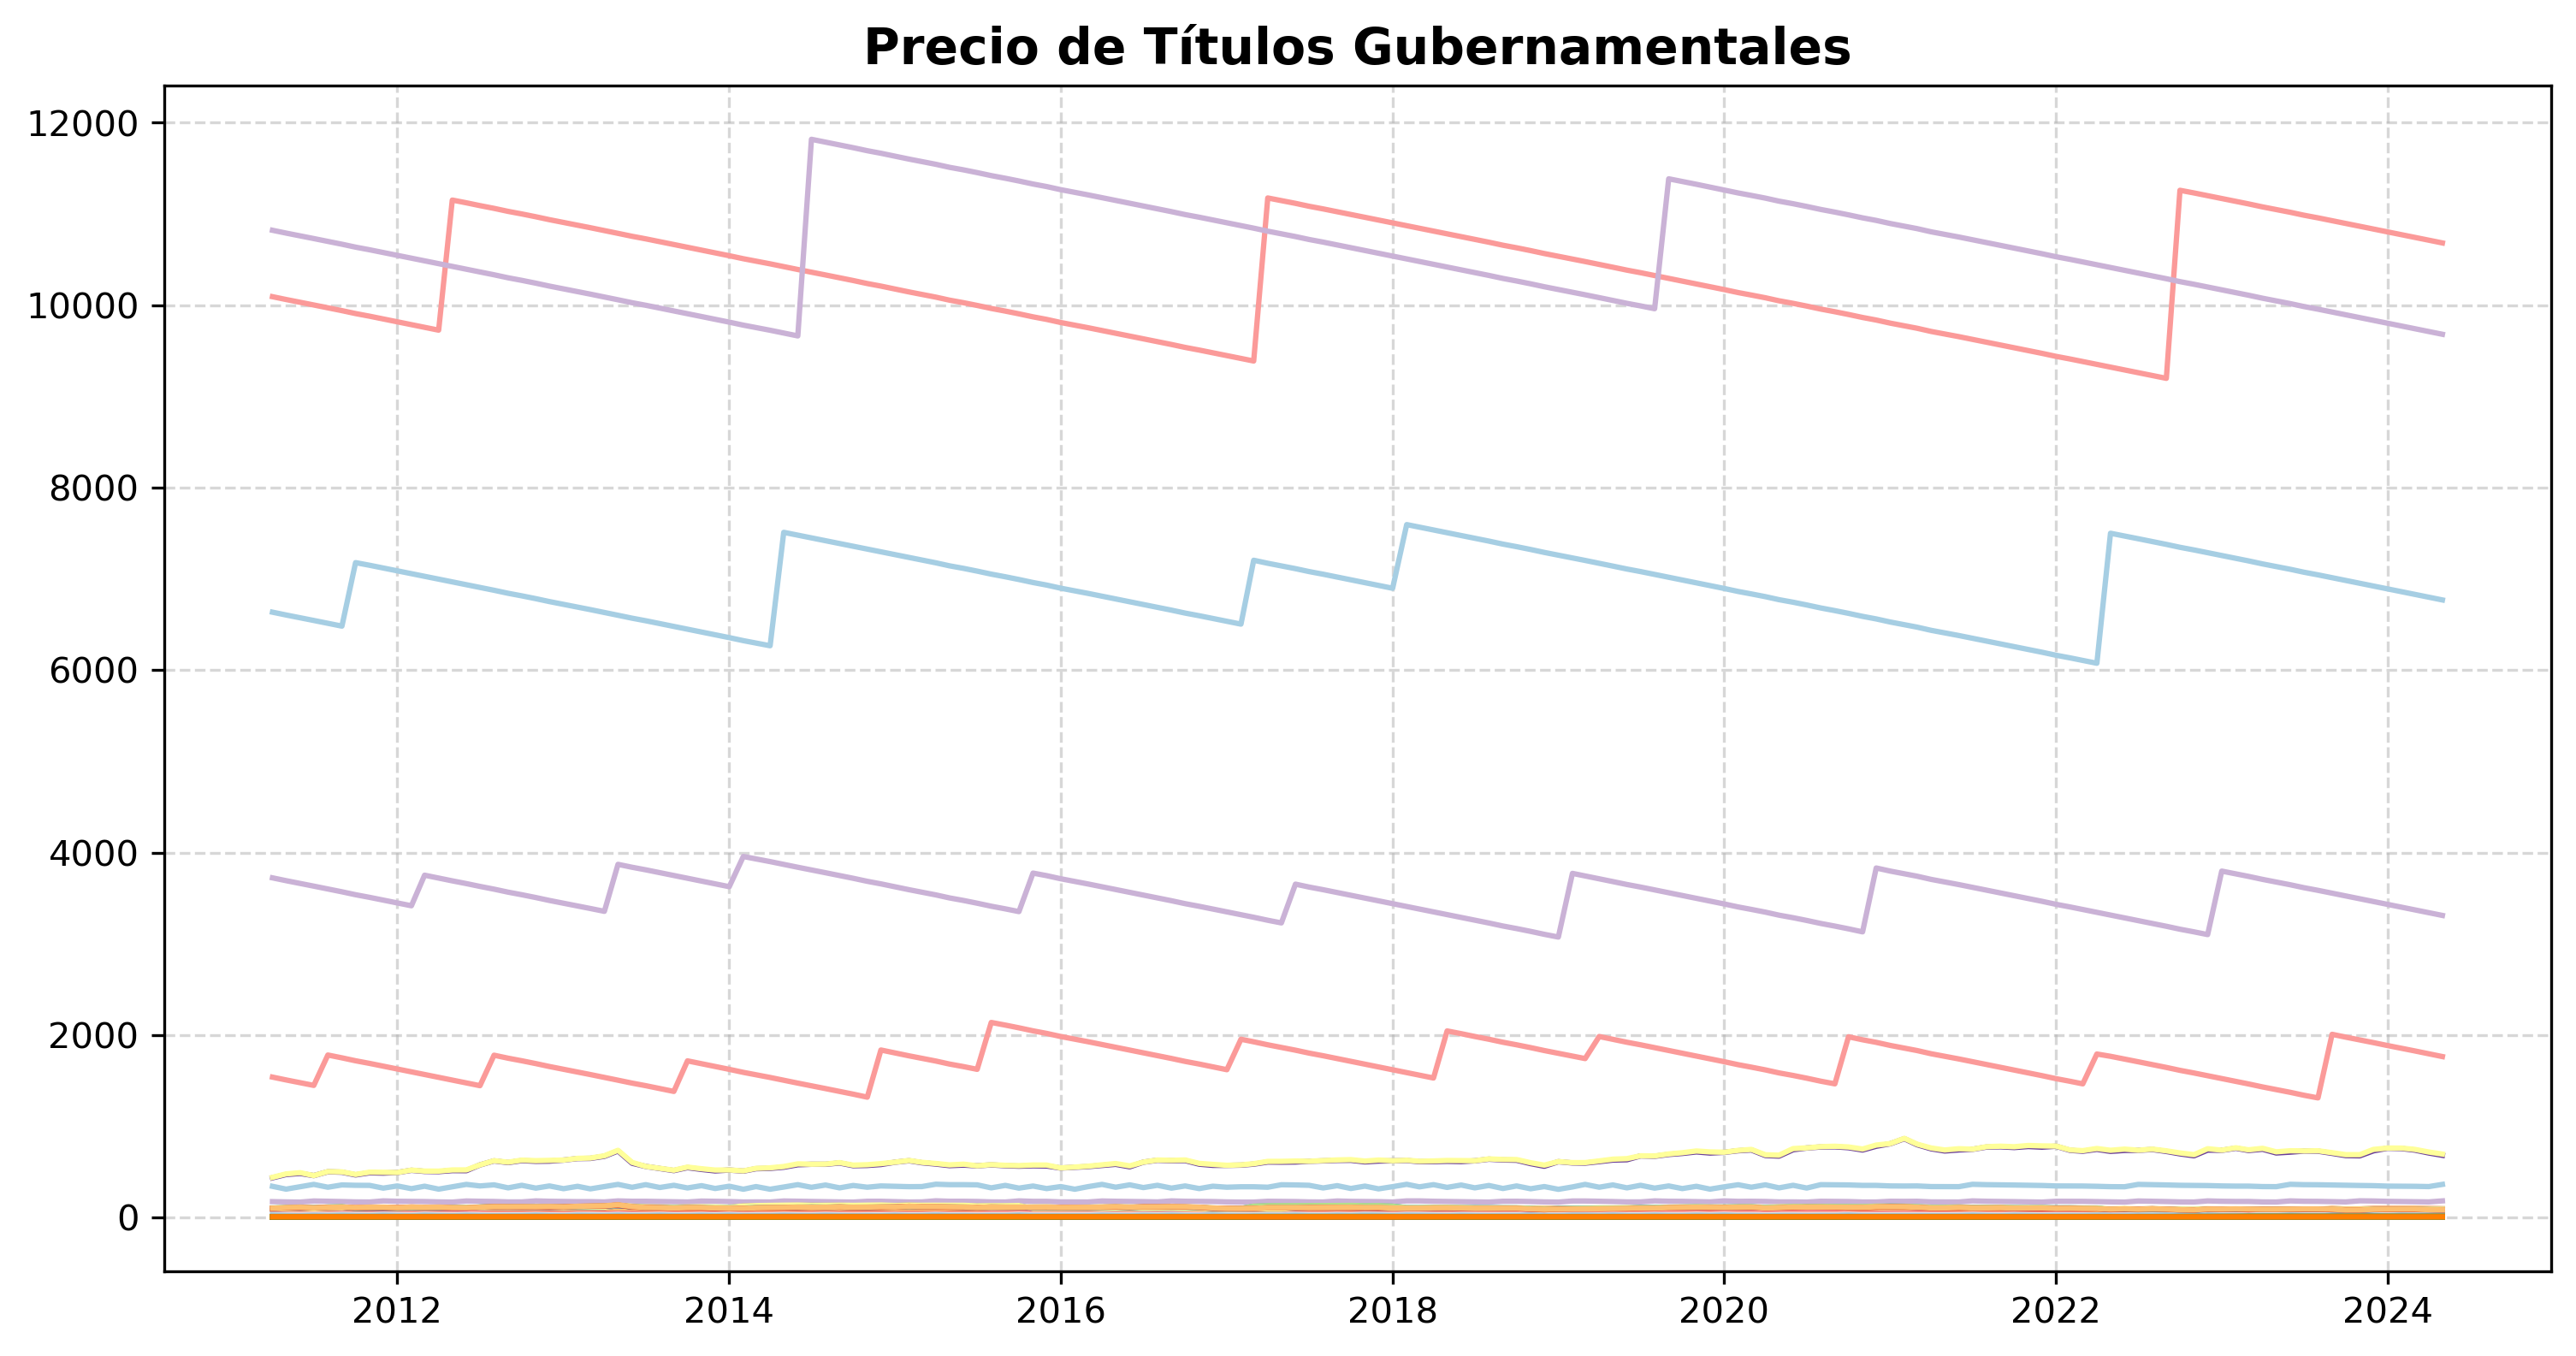

In [686]:
plot_fig(df8, "Precio de Títulos Gubernamentales", legend = False)

In [687]:
df9.columns

Index(['Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente',
       'Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Alimentos, Bebidas y Tabaco',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Mercancías, Mercancías no Alimenticias',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios',
       'Subíndices subyacente y complementarios, Precios al consumidor (INPC), Subyacente, Servicios, Vivienda',
       'Subíndices subyacente y complementarios, Pr

In [688]:
df9.columns = df9.columns.str.replace("Subíndices subyacente y complementarios, Precios al consumidor (INPC), ", "SSC e INPC, ")


In [689]:
df9.columns

Index(['Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'SSC e INPC, Subyacente',
       'Índice de precios al consumidor, por objeto del gasto, Nacional, Índice general',
       'SSC e INPC, Subyacente', 'SSC e INPC, Subyacente, Mercancías',
       'SSC e INPC, Subyacente, Mercancías, Alimentos, Bebidas y Tabaco',
       'SSC e INPC, Subyacente, Mercancías, Mercancías no Alimenticias',
       'SSC e INPC, Subyacente, Servicios',
       'SSC e INPC, Subyacente, Servicios, Vivienda',
       'SSC e INPC, Subyacente, Servicios, Educación (colegiaturas)',
       'SSC e INPC, Subyacente, Servicios, Otros Servicios',
       'SSC e INPC, No Subyacente', 'SSC e INPC, No Subyacente, Agropecuarios',
       'SSC e INPC, No Subyacente, Agropecuarios, Frutas y Verduras',
       'SSC e INPC, No Subyacente, Agropecuarios, Pecuarios',
       'SSC e INPC, No Subyacente, Energéticos y Tarifas Autorizadas por el Gobierno',
       'SSC e INPC, No Subyacente, Energé

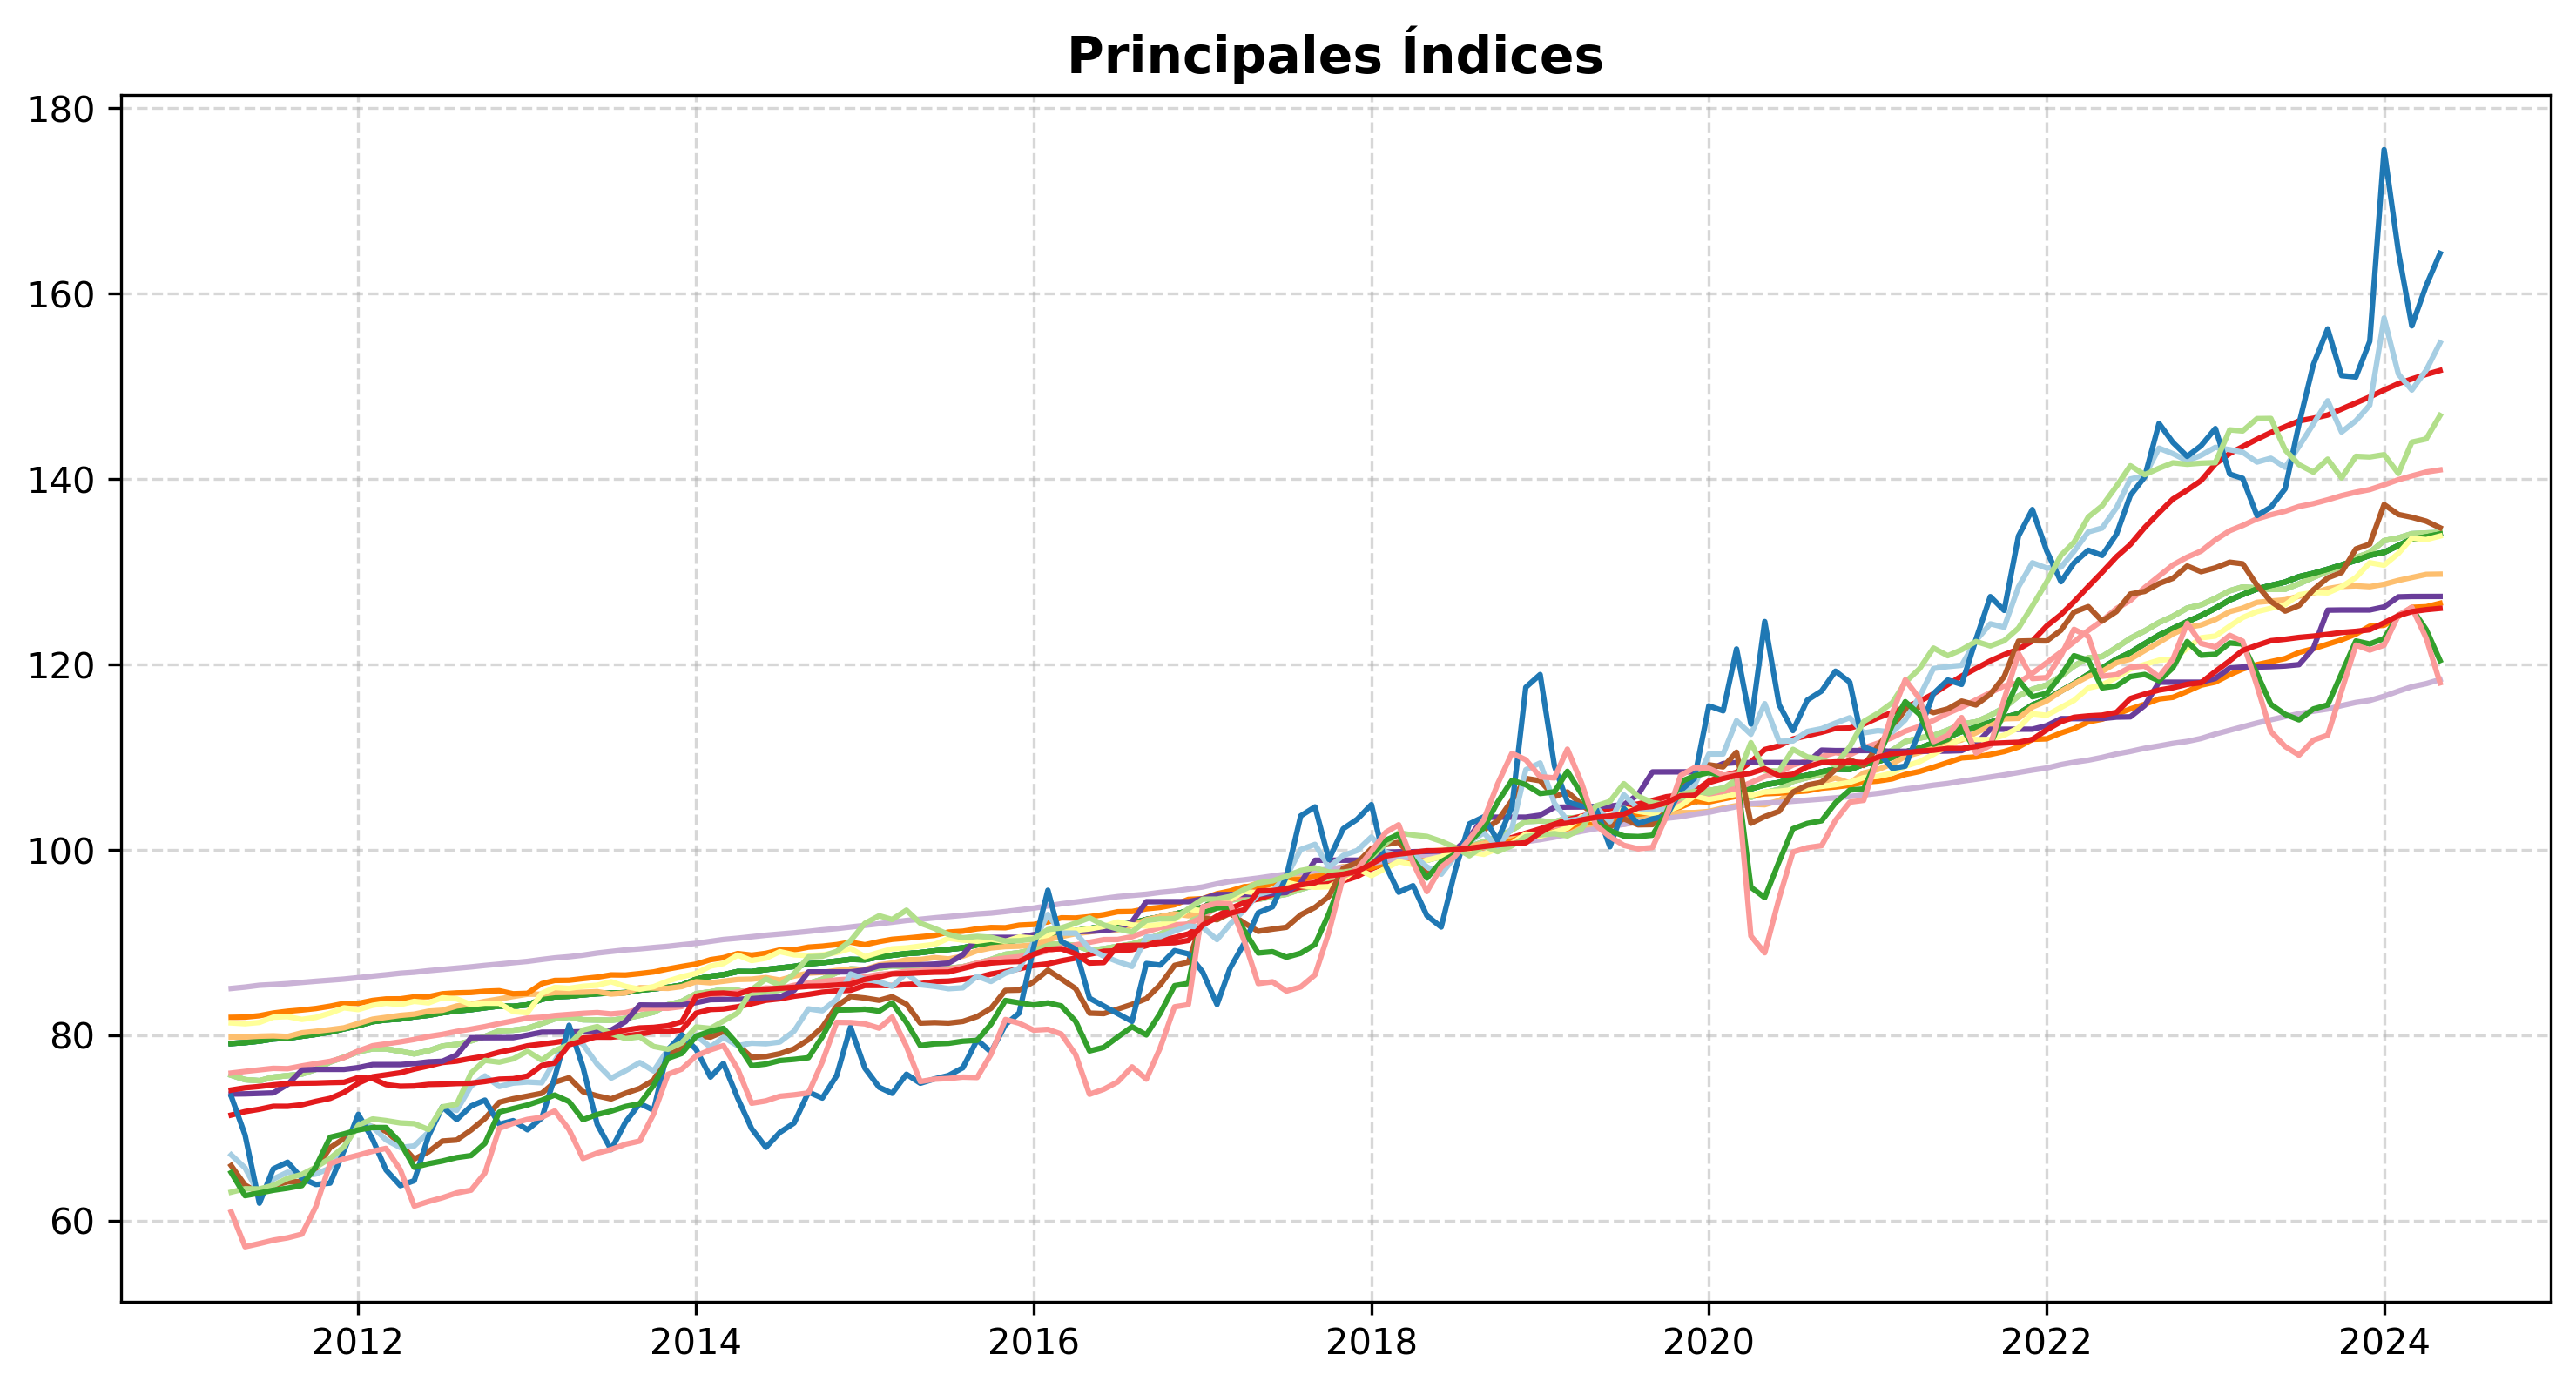

In [690]:
plot_fig(df9, "Principales Índices", legend = False)

In [691]:
df11.columns

Index(['TIIE de Fondeo a Un Día Hábil Bancario, Mediana ponderada por volumen',
       'Tasa de fondeo bancario, Mediana ponderada por volumen, Tasa de interés en por ciento anual',
       'Tasa de fondeo gubernamental, Mediana ponderada por volumen, Tasa de interés en por ciento anual',
       'TIIE a 28 días, Tasa de interés en por ciento anual',
       'Tasas de interés interbancarias Por ciento anual, TIIE a 91 días',
       'Tasa objetivo'],
      dtype='object', name=0)

In [692]:
df11.columns = df11.columns.str.replace(", Mediana ponderada por volumen", "")
df11.columns = df11.columns.str.replace(", Tasa de interés en por ciento anual", "")
df11.columns = df11.columns.str.replace("Tasas de interés interbancarias Por ciento anual, ", "")

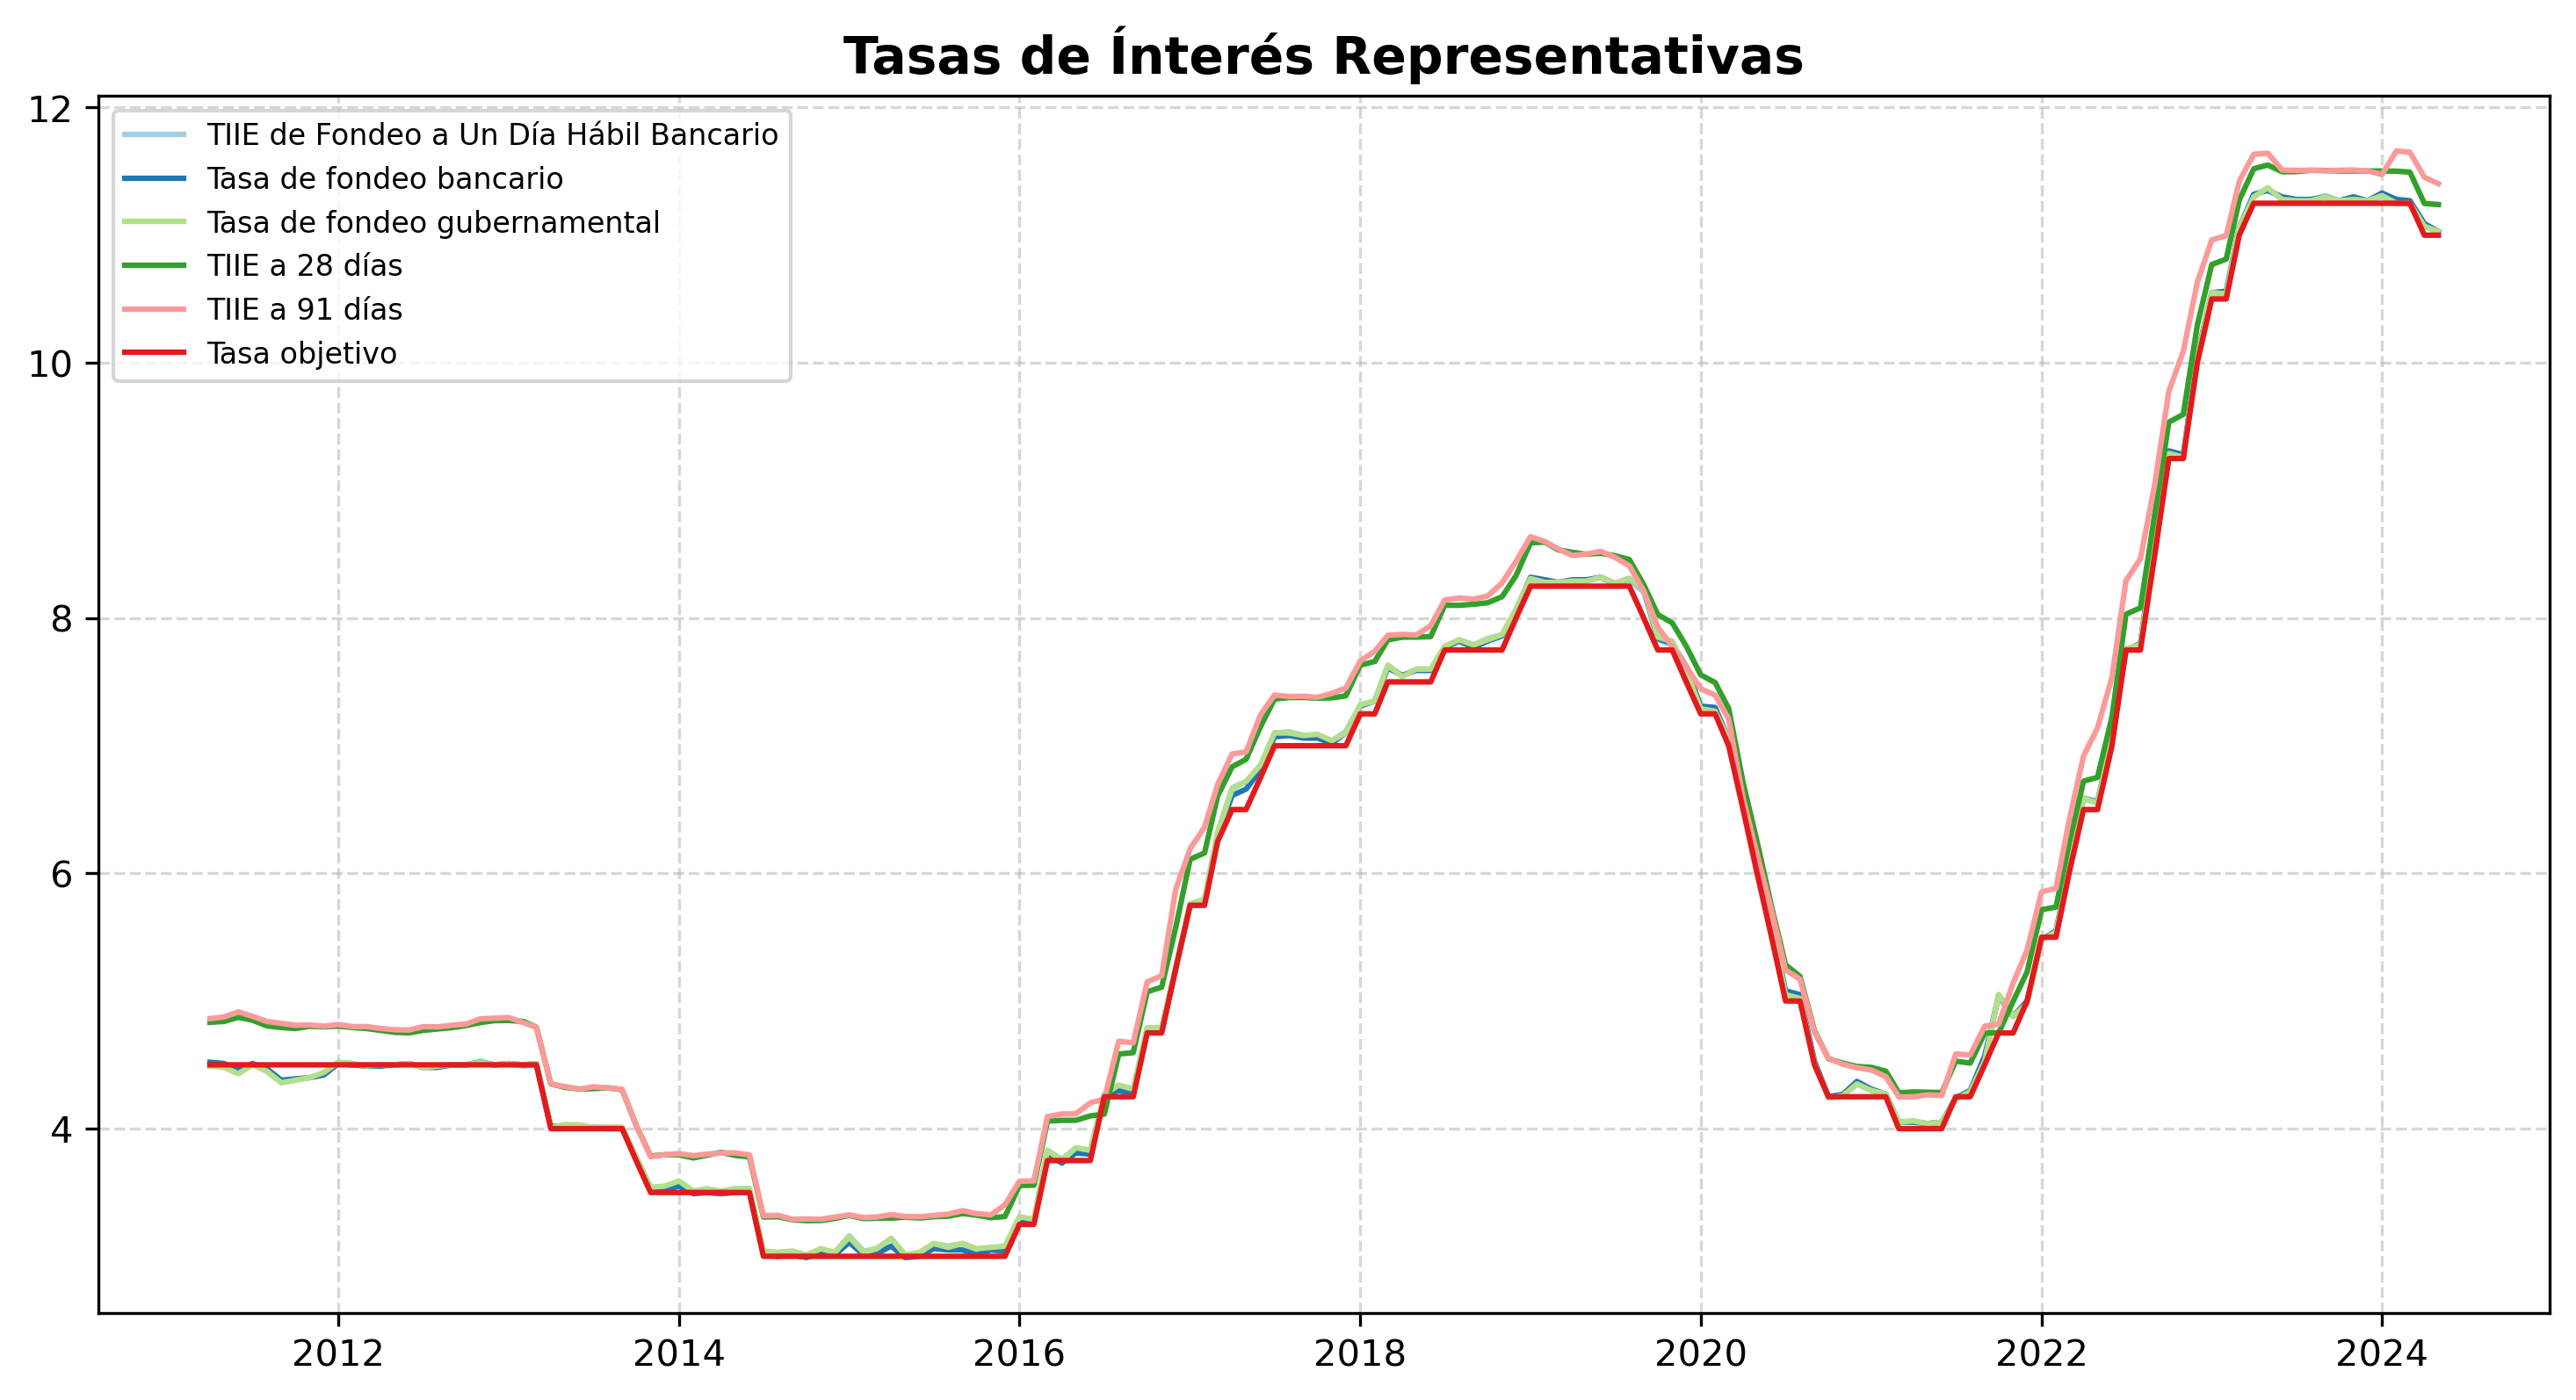

In [693]:
plot_fig(df11, "Tasas de Ínterés Representativas")

In [694]:
df12.columns

Index(['Índice Nacional de Precios al consumidor, Variación mensual',
       'Índice Nacional de Precios al consumidor, Variación acumulada',
       'Índice Nacional de Precios al consumidor, variación anual',
       'Inflación, Subyacente (nueva definición), Mensual',
       'Inflación, Subyacente (nueva definición), Acumulada en el año',
       'Inflación, Subyacente (nueva definición), Anual',
       'Inflación, No subyacente (nueva definición), Mensual',
       'Inflación, No subyacente (nueva definición), Acumulada en el año',
       'Inflación, No subyacente (nueva definición), Anual'],
      dtype='object', name=0)

In [695]:
df12.columns = df12.columns.str.replace(" (nueva definición)", "")
df12.columns = df12.columns.str.replace("Índice Nacional de Precios al consumidor", "INPC")

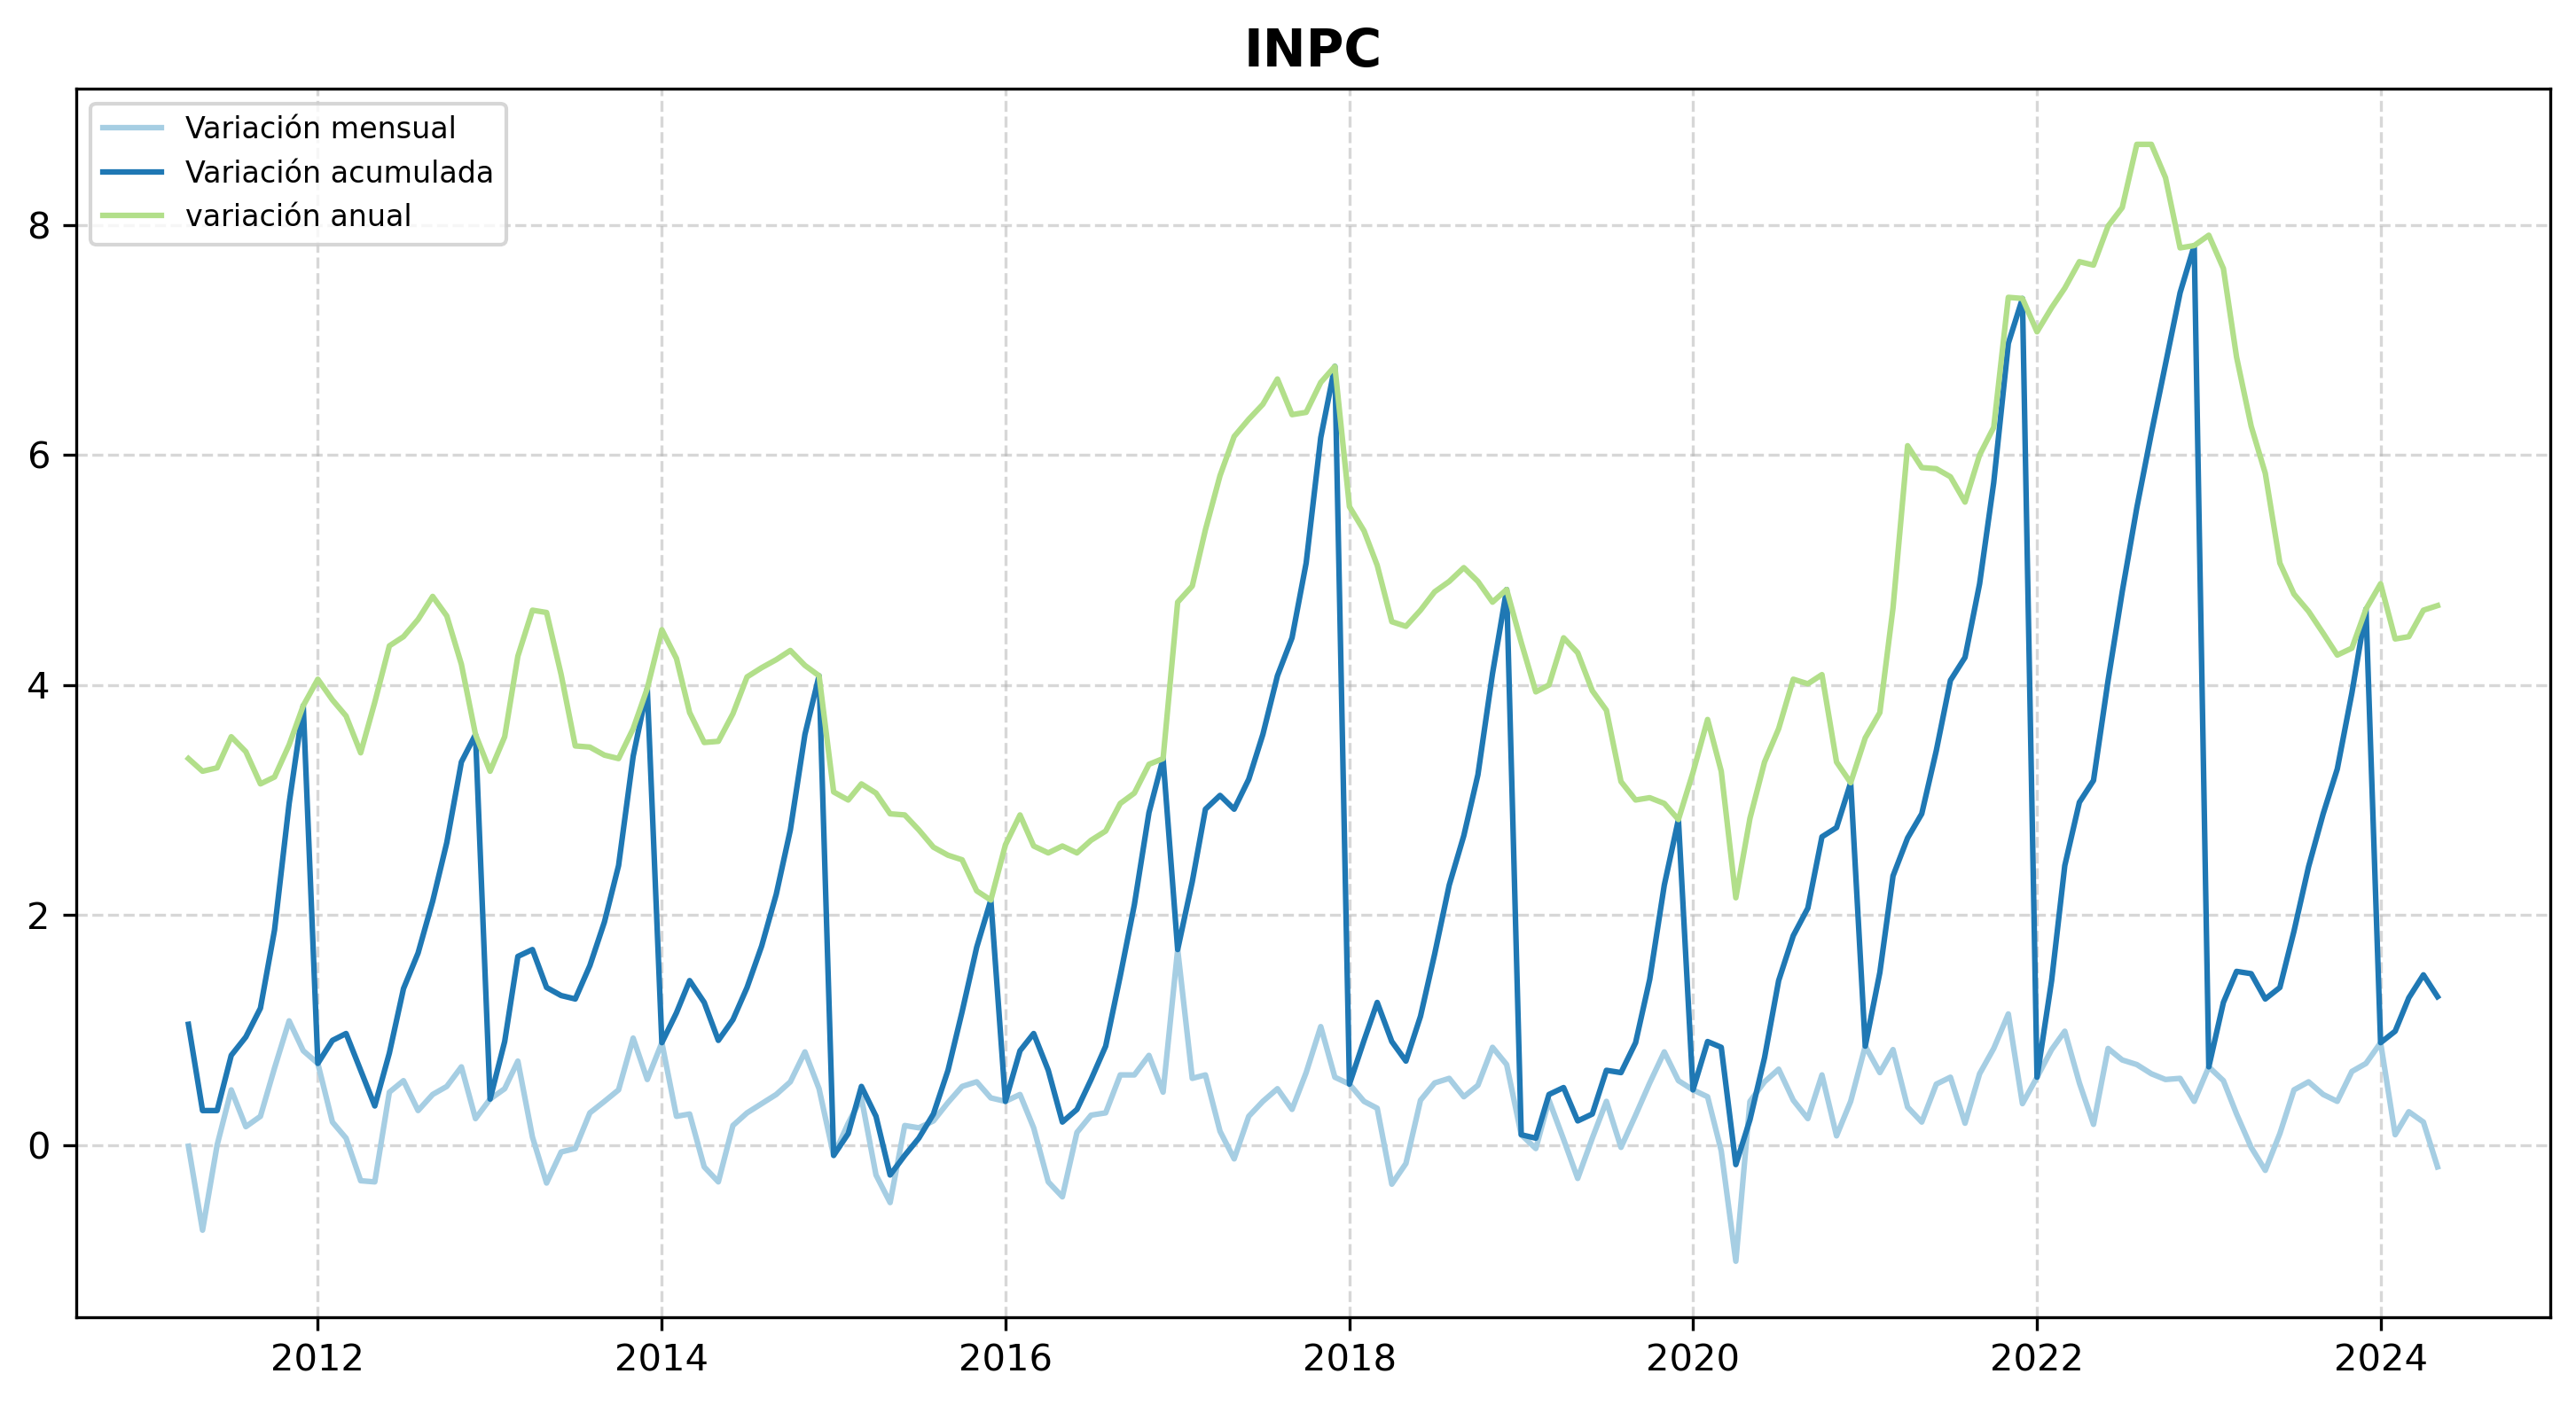

In [696]:
inpc = df12.iloc[:, 0:3]
inpc.columns = inpc.columns.str.replace("INPC, ", "")
plot_fig(inpc, "INPC")

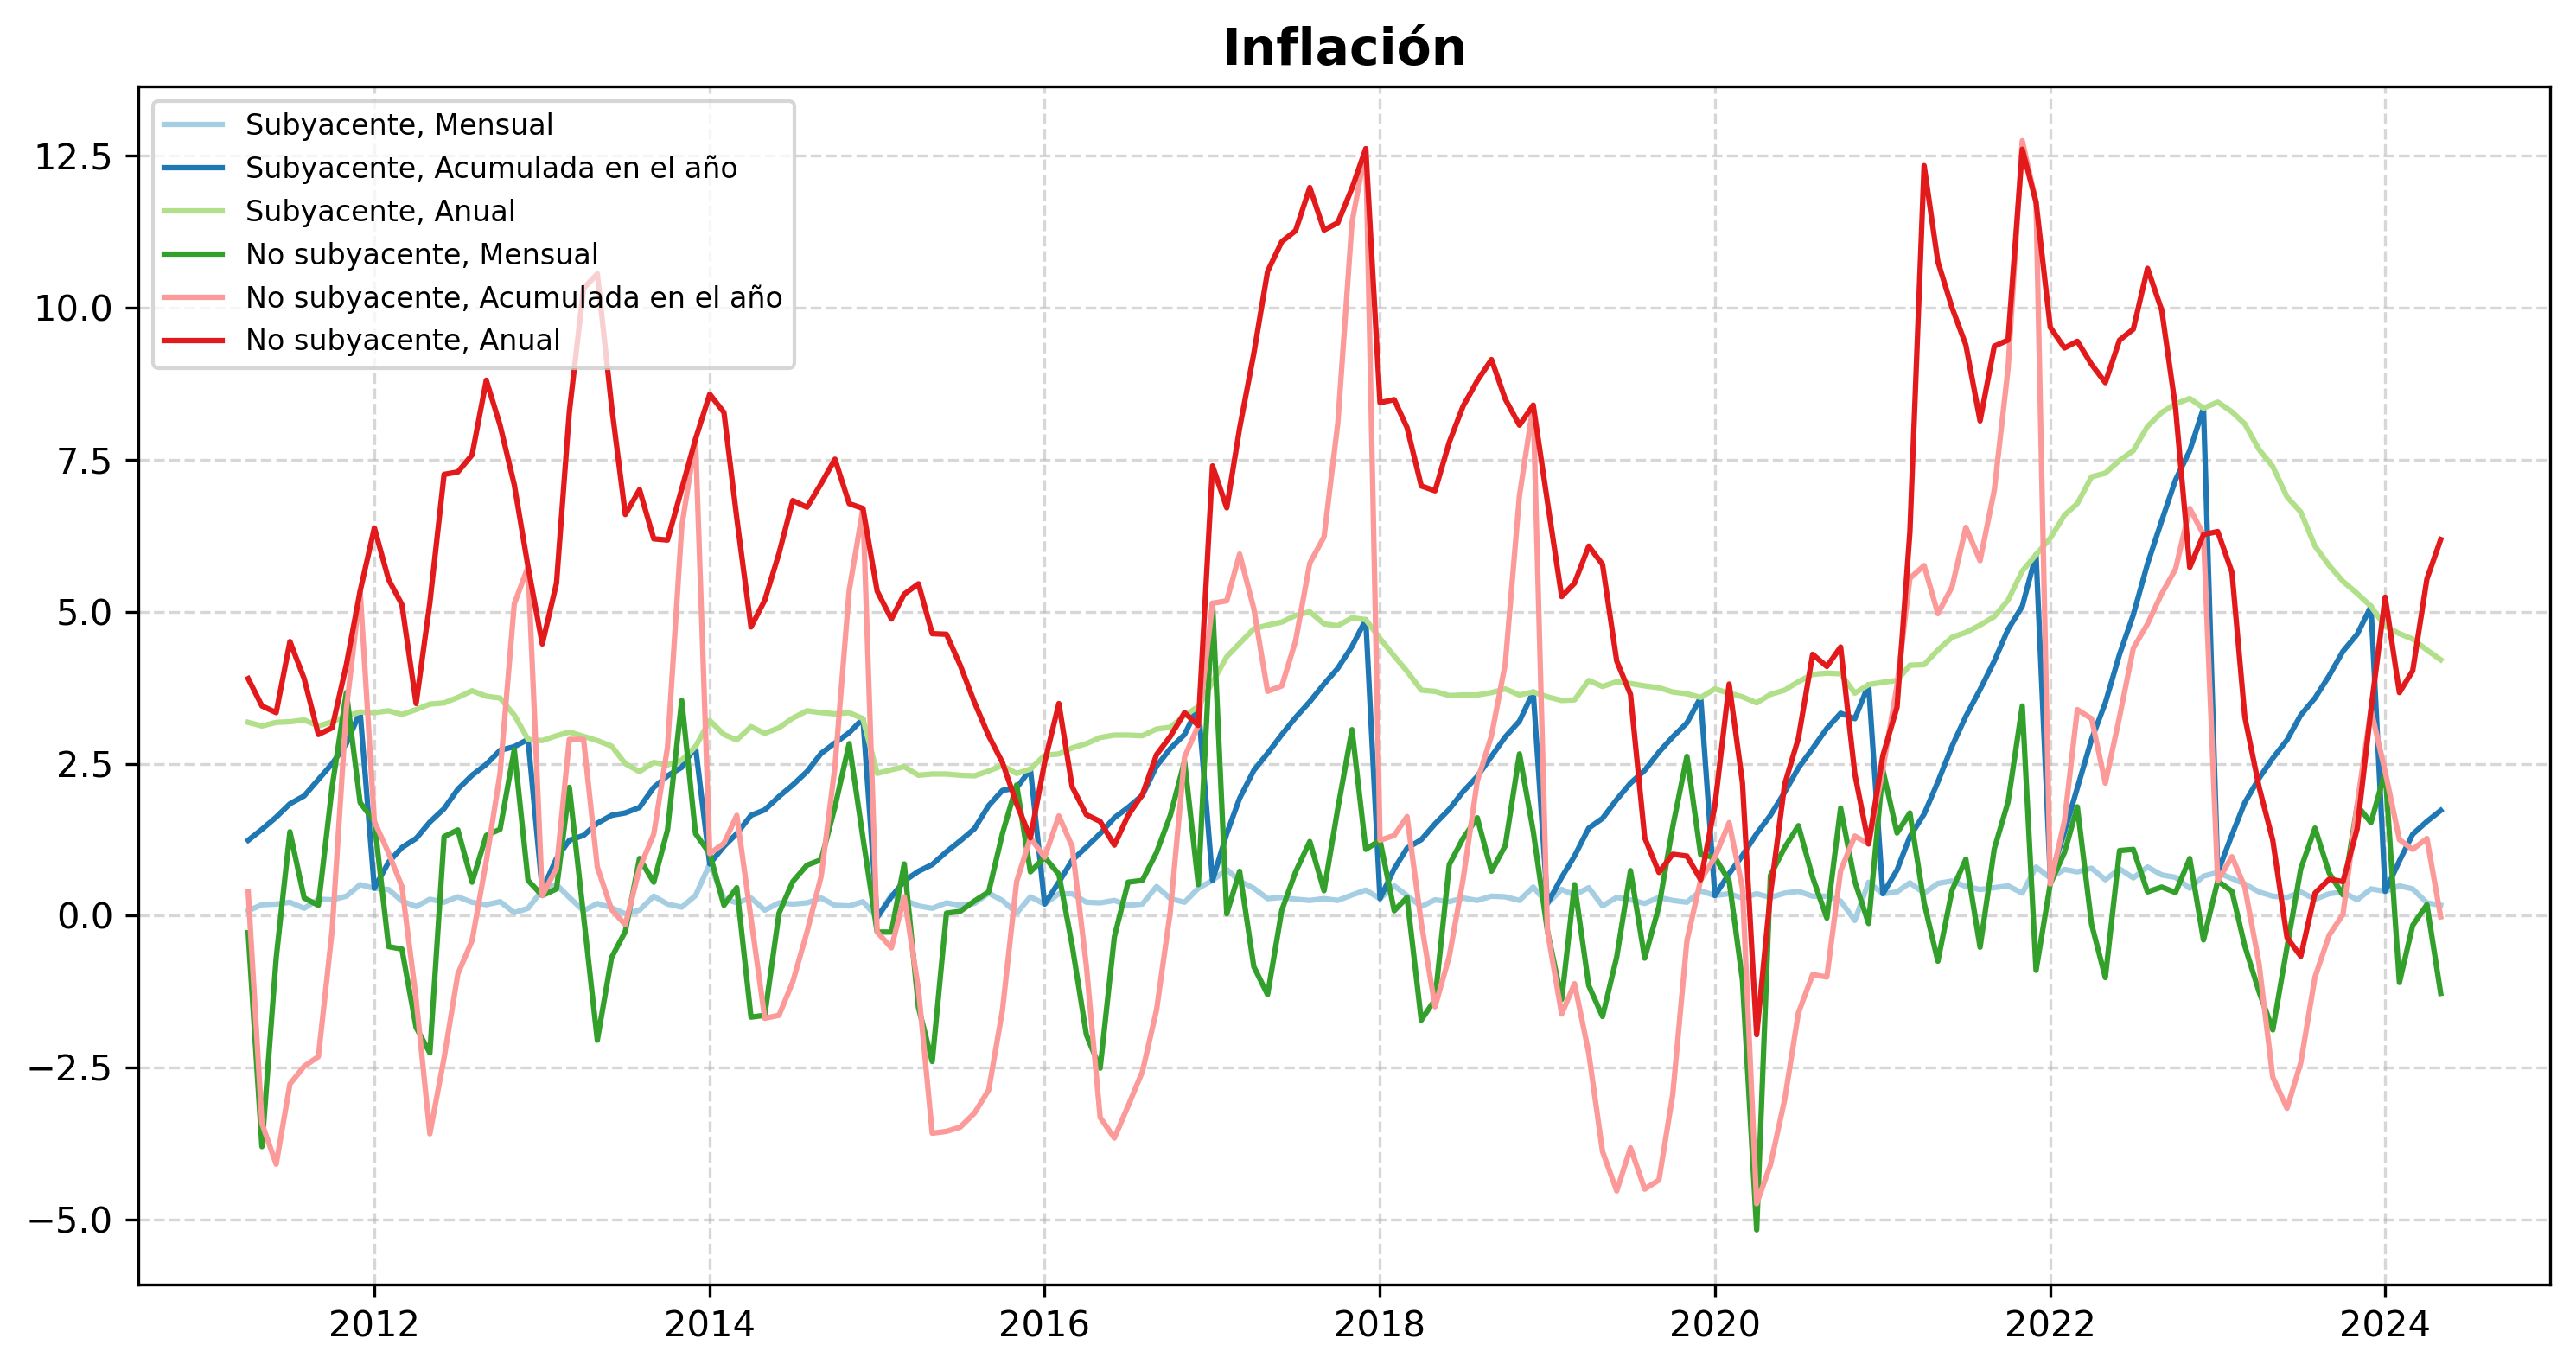

In [697]:
inflacion = df12.iloc[:, 3:]
inflacion.columns = inflacion.columns.str.replace("Inflación, ", "")
plot_fig(inflacion, "Inflación")

In [698]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df8, df9, df11, df12], axis=1)
df.head()
df.to_csv("Datos\\datos-nombres-bonitos.csv")

# Matriz de Corr

In [699]:
df2.columns

Index([' Tarjetas vigentes al cierre del trimestre (todas las marcas)',
       ' (todas las marcas) B', ' (todas las marcas) C',
       ' (todas las marcas) D', ' (todas las marcas) E',
       ' (todas las marcas) F', ' (todas las marcas) G',
       ' (todas las marcas) H', ' (todas las marcas) I',
       ' (todas las marcas) J', ' (todas las marcas) K',
       ' (todas las marcas) L', ' (todas las marcas) M',
       ' (todas las marcas) N', ' (todas las marcas) O',
       ' (todas las marcas) P', ' (todas las marcas) Q',
       ' (todas las marcas) R', ' (todas las marcas) S',
       ' (todas las marcas) T', ' (todas las marcas) U',
       ' (todas las marcas) V', ' (todas las marcas) W',
       ' (todas las marcas) X', ' (todas las marcas) Y',
       ' Tarjetas vigentes al cierre del trimestre (mastercard)',
       ' (mastercard) B', ' (mastercard) C', ' (mastercard) D',
       ' (mastercard) E', ' (mastercard) F', ' (mastercard) G',
       ' (mastercard) H', ' (mastercard) I', ' (ma

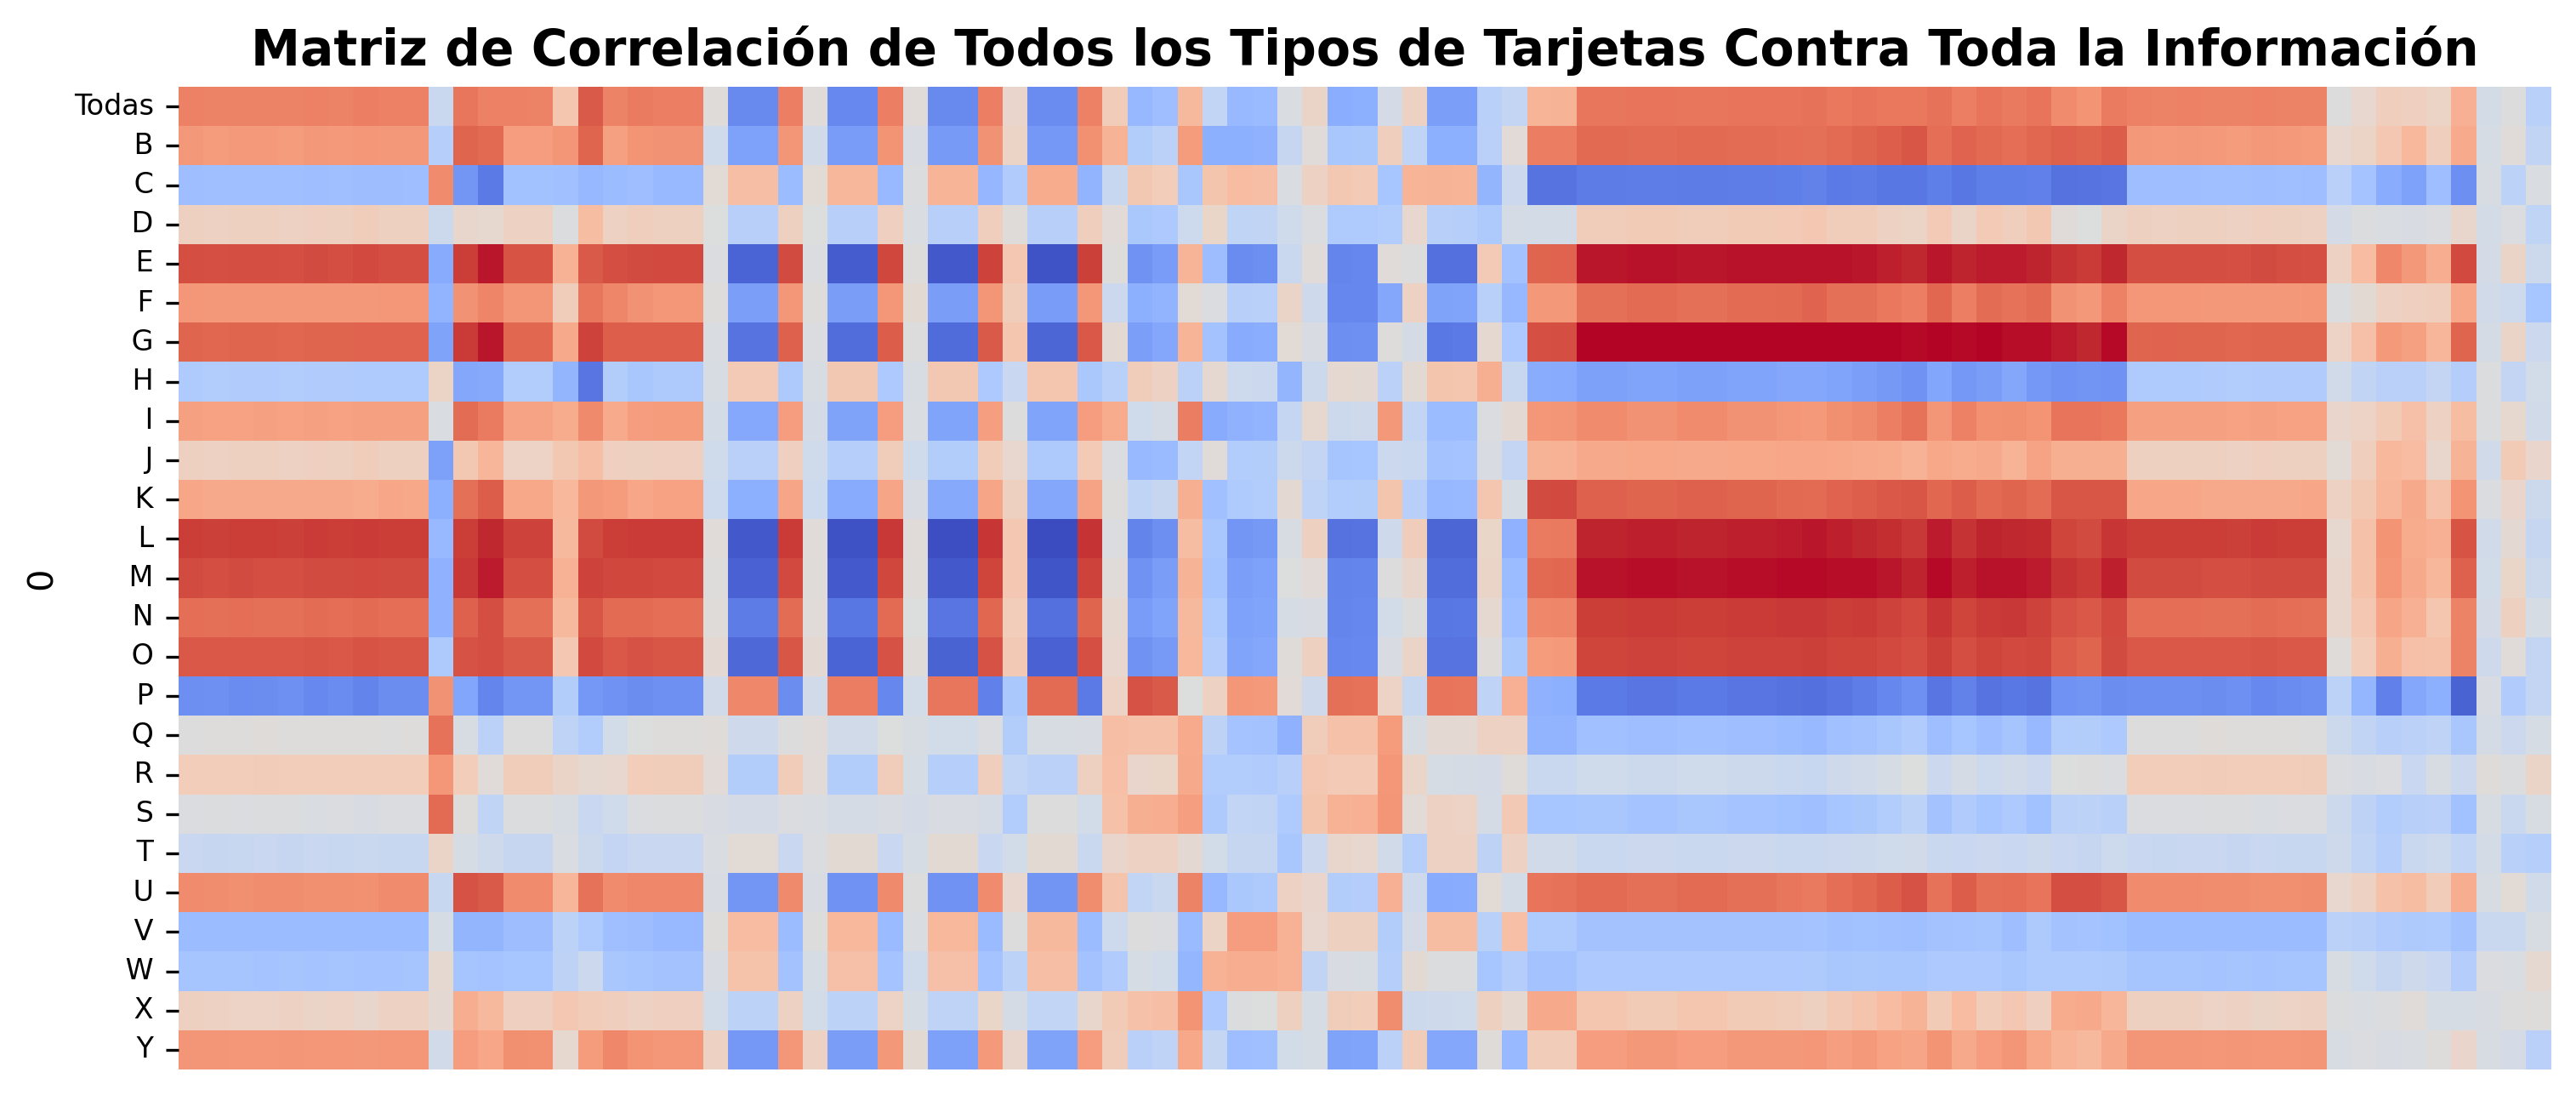

In [700]:
orig_todas_las_marcas = df2.columns[df2.columns.str.contains("todas las marcas")]
tdc = df2[orig_todas_las_marcas]
tdc_clean = tdc.copy()
tdc_clean.columns = tdc_clean.columns.str.replace("(todas las marcas) ", "")

# change the name of the first column
tdc_clean.rename(columns={tdc_clean.columns[0]: "Todas"}, inplace=True)

# Compute the correlation matrix
corr_matrix = df.corr()

# Get the df2 columns and the columns of the other dataframes
df2_cols = df2.columns
other_cols = [col for col in df.columns if col not in df2_cols]

# Extract the rectangular correlation matrix: rows from the original df2 columns matching "todas las marcas" and columns from the others
df2_corr_rect = corr_matrix.loc[orig_todas_las_marcas, other_cols]
df2_corr_rect.index = tdc_clean.columns

# Plot the correlation matrix without labels and numbers
plt.figure(figsize=(12, 5), dpi=300)
sns.heatmap(df2_corr_rect, annot=False, cmap='coolwarm', xticklabels=False, cbar=False)
plt.title("Matriz de Correlación de Todos los Tipos de Tarjetas Contra Toda la Información", fontsize=14, fontweight='bold')
plt.yticks(fontsize=8)
plt.savefig("Datos\\SVG\\Correlación de Todas las Tarjetas.svg")
plt.show()

0
 M       40.186461
 E       39.622588
 L       39.508163
 G       39.493022
 O       35.651807
 N       34.543871
 U       32.456392
 K       29.990971
 B       29.476567
Todas    28.580270
 I       26.999135
 F       25.316824
 Y       21.453723
 X       14.780220
 J       13.712111
 D        6.919079
 R        6.065689
 S       -3.613024
 T       -4.657694
 Q       -5.633411
 W      -13.249287
 V      -14.819331
 H      -19.725276
 C      -25.391982
 P      -27.101363
dtype: float64


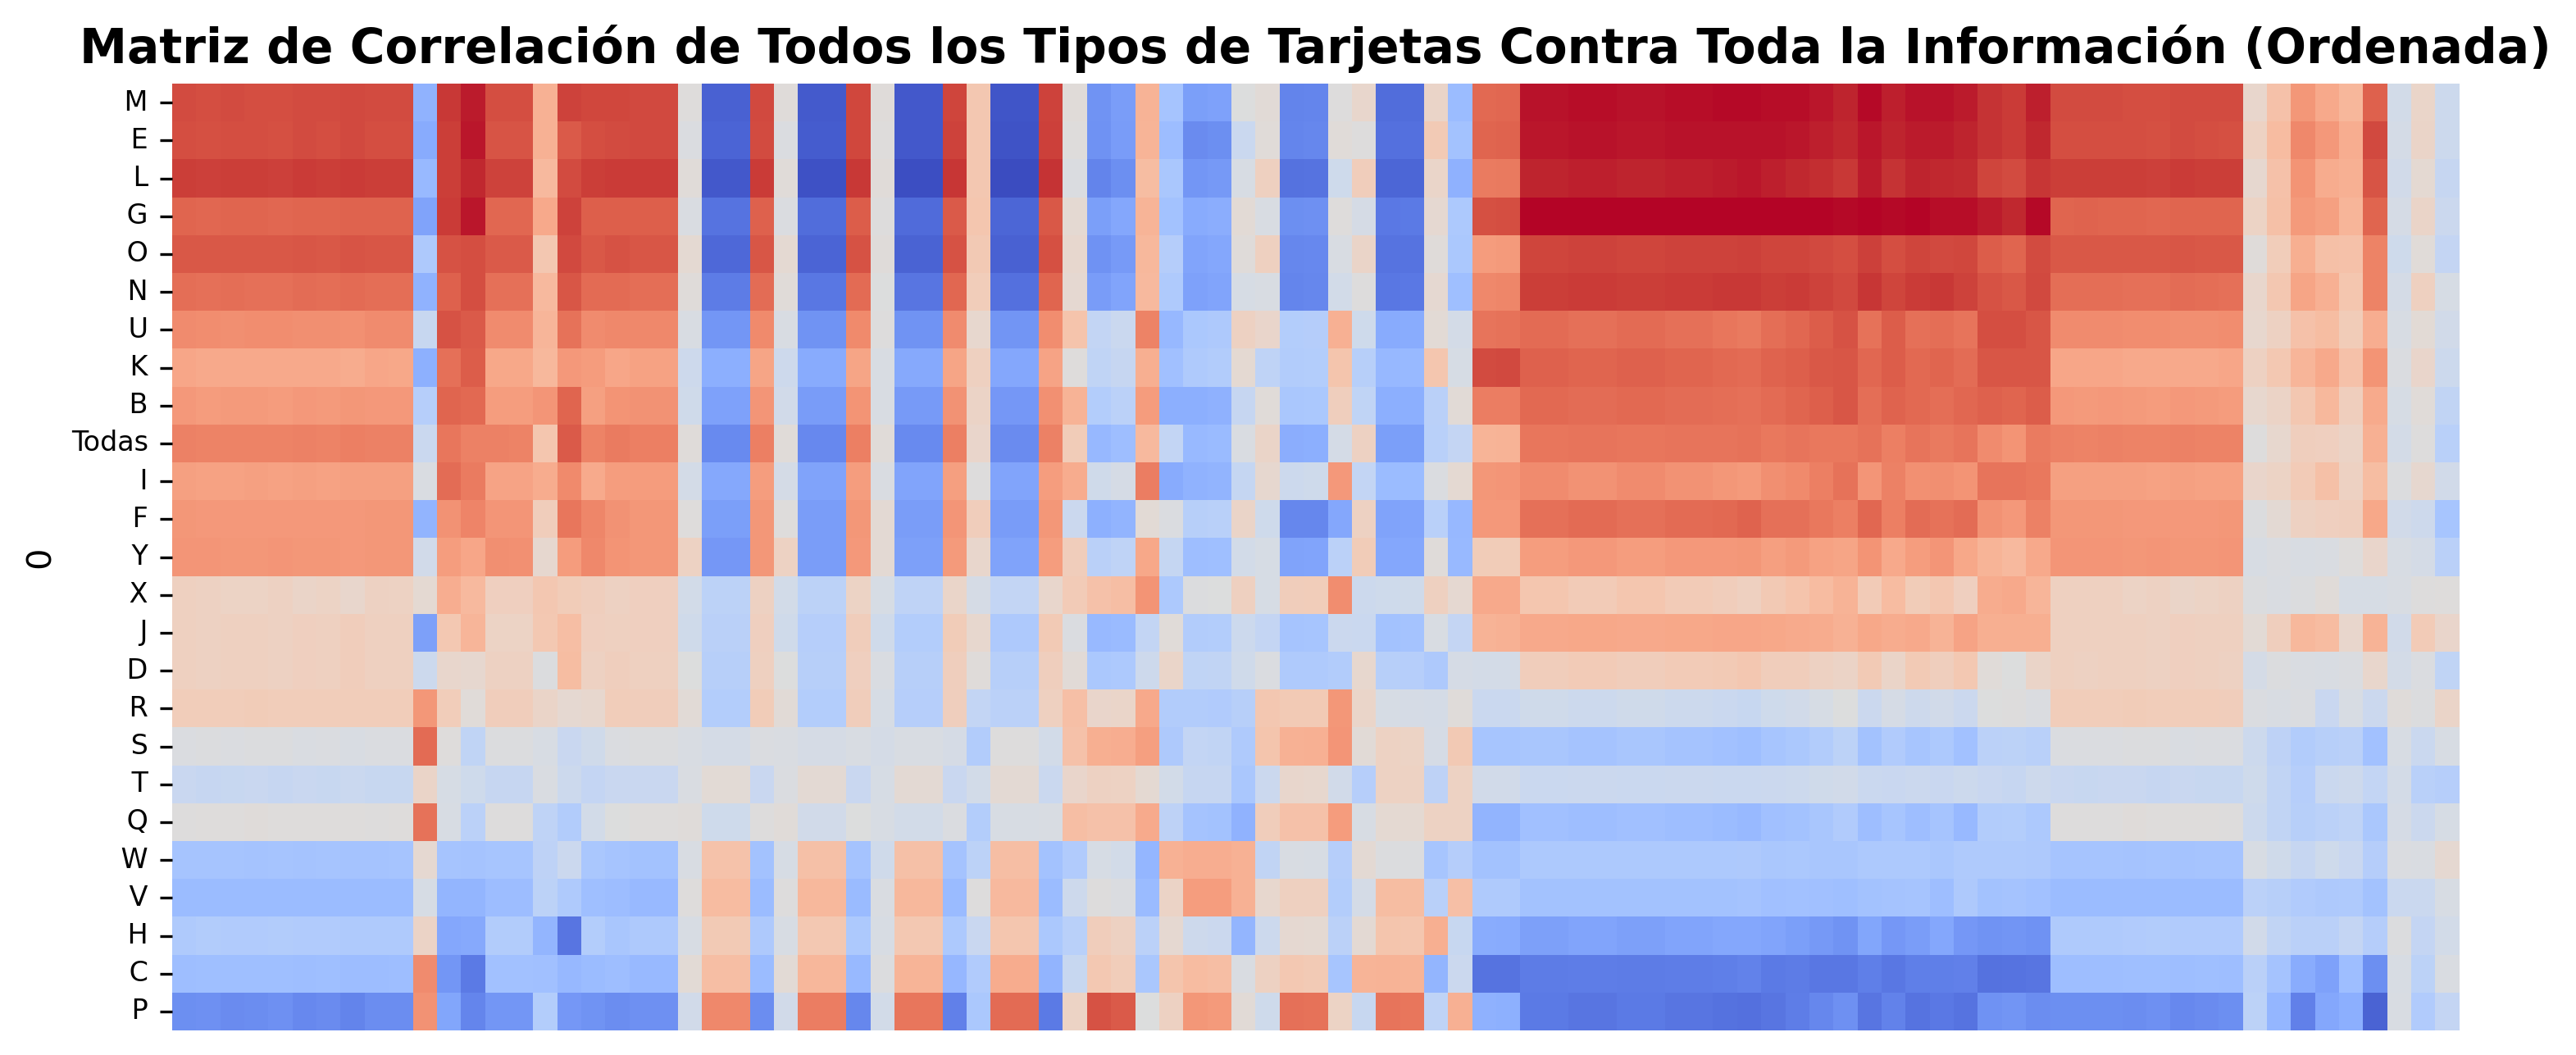

In [701]:
row_sums = df2_corr_rect.sum(axis=1).sort_values(ascending=False)
print(row_sums)

# Plot the correlation matrix ordered by row sums
plt.figure(figsize=(12, 5), dpi=300)
sns.heatmap(df2_corr_rect.loc[row_sums.index], annot=False, cmap='coolwarm', xticklabels=False, cbar=False)
plt.title("Matriz de Correlación de Todos los Tipos de Tarjetas Contra Toda la Información (Ordenada)", fontsize=14, fontweight='bold')
plt.yticks(fontsize=8)
plt.savefig("Datos\\SVG\\Correlación de Todas las Tarjetas Ordenada.svg")
plt.show()

# info de las tdc

In [702]:
df2

0        Tarjetas vigentes al cierre del trimestre (todas las marcas)  \
2011-04                                       2.324182e+07              
2011-05                                       2.351398e+07              
2011-06                                       2.378613e+07              
2011-07                                       2.405829e+07              
2011-08                                       2.425563e+07              
...                                                    ...              
2024-01                                       3.874740e+07              
2024-02                                       3.914294e+07              
2024-03                                       3.953848e+07              
2024-04                                       3.993401e+07              
2024-05                                       4.051577e+07              

0        (todas las marcas) B  (todas las marcas) C  (todas las marcas) D  \
2011-04               15638.0          5.804978e+06          8.242474e+06   
2011-05               15552.0          5.944675e+06          8.231955e+06   
2011-06               15466.0          6.084373e+06          8.221437e+06   
2011-07               15380.0          6.224070e+06          8.210918e+06   
2011-08               15230.0          6.298939e+06          8.207284e+06   
...                       ...                   ...                   ...   
2024-01               19497.0          6.168359e+06          1.541288e+07   
2024-02               19583.0          6.305240e+06          1.567824e+07   
2024-03               19669.0          6.442120e+06          1.594359e+07   
2024-04               19755.0          6.579001e+06          1.620894e+07   
2024-05               19975.0          6.777559e+06          1.647039e+07   

0        (todas las marcas) E  (todas las marcas) F  (todas las marcas) G  \
2011-04          2.931260e+06          1.109787e+06          17015.000000   
2011-05          2.971291e+06          1.130715e+06          17213.333333   
2011-06          3.011323e+06          1.151642e+06          17411.666667   
2011-07          3.051354e+06          1.172570e+06          17610.000000   
2011-08          3.032766e+06          1.188782e+06          17747.666667   
...                       ...                   ...                   ...   
2024-01          4.597449e+06          2.132325e+06         194879.000000   
2024-02          4.600168e+06          2.146244e+06         197603.666667   
2024-03          4.602888e+06          2.160164e+06         200328.333333   
2024-04          4.605607e+06          2.174083e+06         203053.000000   
2024-05          4.629554e+06          2.187718e+06         205343.666667   

0        (todas las marcas) H  (todas las marcas) I  (todas las marcas) J  \
2011-04         198979.000000          3.771310e+05           1141.000000   
2011-05         205417.000000          3.741213e+05           1168.666667   
2011-06         211855.000000          3.711117e+05           1196.333333   
2011-07         218293.000000          3.681020e+05           1224.000000   
2011-08         222550.666667          3.658890e+05           1244.333333   
...                       ...                   ...                   ...   
2024-01              0.000000          1.320858e+06          10432.000000   
2024-02              0.000000          1.316934e+06          10033.333333   
2024-03              0.000000          1.313011e+06           9634.666667   
2024-04              0.000000          1.309087e+06           9236.000000   
2024-05              0.000000          1.306851e+06           9779.000000   

0        (todas las marcas) K  (todas las marcas) L  (todas las marcas) M  \
2011-04         411134.000000          21142.000000          8.154800e+04   
2011-05         420939.000000          21565.000000          7.926233e+04   
2011-06         430744.000000          21988.000000          7.697667e+04   
2011-07         440549.000000          2

In [ ]:
tdc_clean.head()

0               Todas        B             C             D             E  \
2011-04  2.324182e+07  15638.0  5.804978e+06  8.242474e+06  2.931260e+06   
2011-05  2.351398e+07  15552.0  5.944675e+06  8.231955e+06  2.971291e+06   
2011-06  2.378613e+07  15466.0  6.084373e+06  8.221437e+06  3.011323e+06   
2011-07  2.405829e+07  15380.0  6.224070e+06  8.210918e+06  3.051354e+06   
2011-08  2.425563e+07  15230.0  6.298939e+06  8.207284e+06  3.032766e+06   

0                   F             G              H              I  \
2011-04  1.109787e+06  17015.000000  198979.000000  377131.000000   
2011-05  1.130715e+06  17213.333333  205417.000000  374121.333333   
2011-06  1.151642e+06  17411.666667  211855.000000  371111.666667   
2011-07  1.172570e+06  17610.000000  218293.000000  368102.000000   
2011-08  1.188782e+06  17747.666667  222550.666667  365889.000000   

0                  J              K             L             M             N  \
2011-04  1141.000000  411134.000000  21142.000000  81548.000000  24560.000000   
2011-05  1168.666667  420939.000000  21565.000000  79262.333333  23558.333333   
2011-06  1196.333333  430744.000000  21988.000000  76976.666667  22556.666667   
2011-07  1224.000000  440549.000000  22411.000000  74691.000000  21555.000000   
2011-08  1244.333333  442583.333333  22811.333333  73700.666667  21807.000000   

0                   O              P            Q    R             S    T  \
2011-04  1.852871e+06  700973.000000  4003.000000  0.0  30103.000000  0.0   
2011-05  1.875477e+06  706586.000000  3953.333333  0.0  28768.000000  0.0   
2011-06  1.898083e+06  712199.000000  3903.666667  0.0  27433.000000  0.0   
2011-07  1.920689e+06  717812.000000  3854.000000  0.0  26098.000000  0.0   
2011-08  1.945552e+06  725623.333333  3616.333333  0.0  25000.666667  0.0   

0                   U             V    W    X    Y  
2011-04  1.341344e+06  75736.000000  0.0  0.0  0.0  
2011-05  1.387796e+06  73961.000000  0.0  0.0  0.0  
2011-06  1.434249e+06  72186.000000  0.0  0.0  0.0  
2011-07  1.480701e+06  70411.000000  0.0  0.0  0.0  
2011-08  1.575749e+06  68752.666667  0.0  0.0  0.0

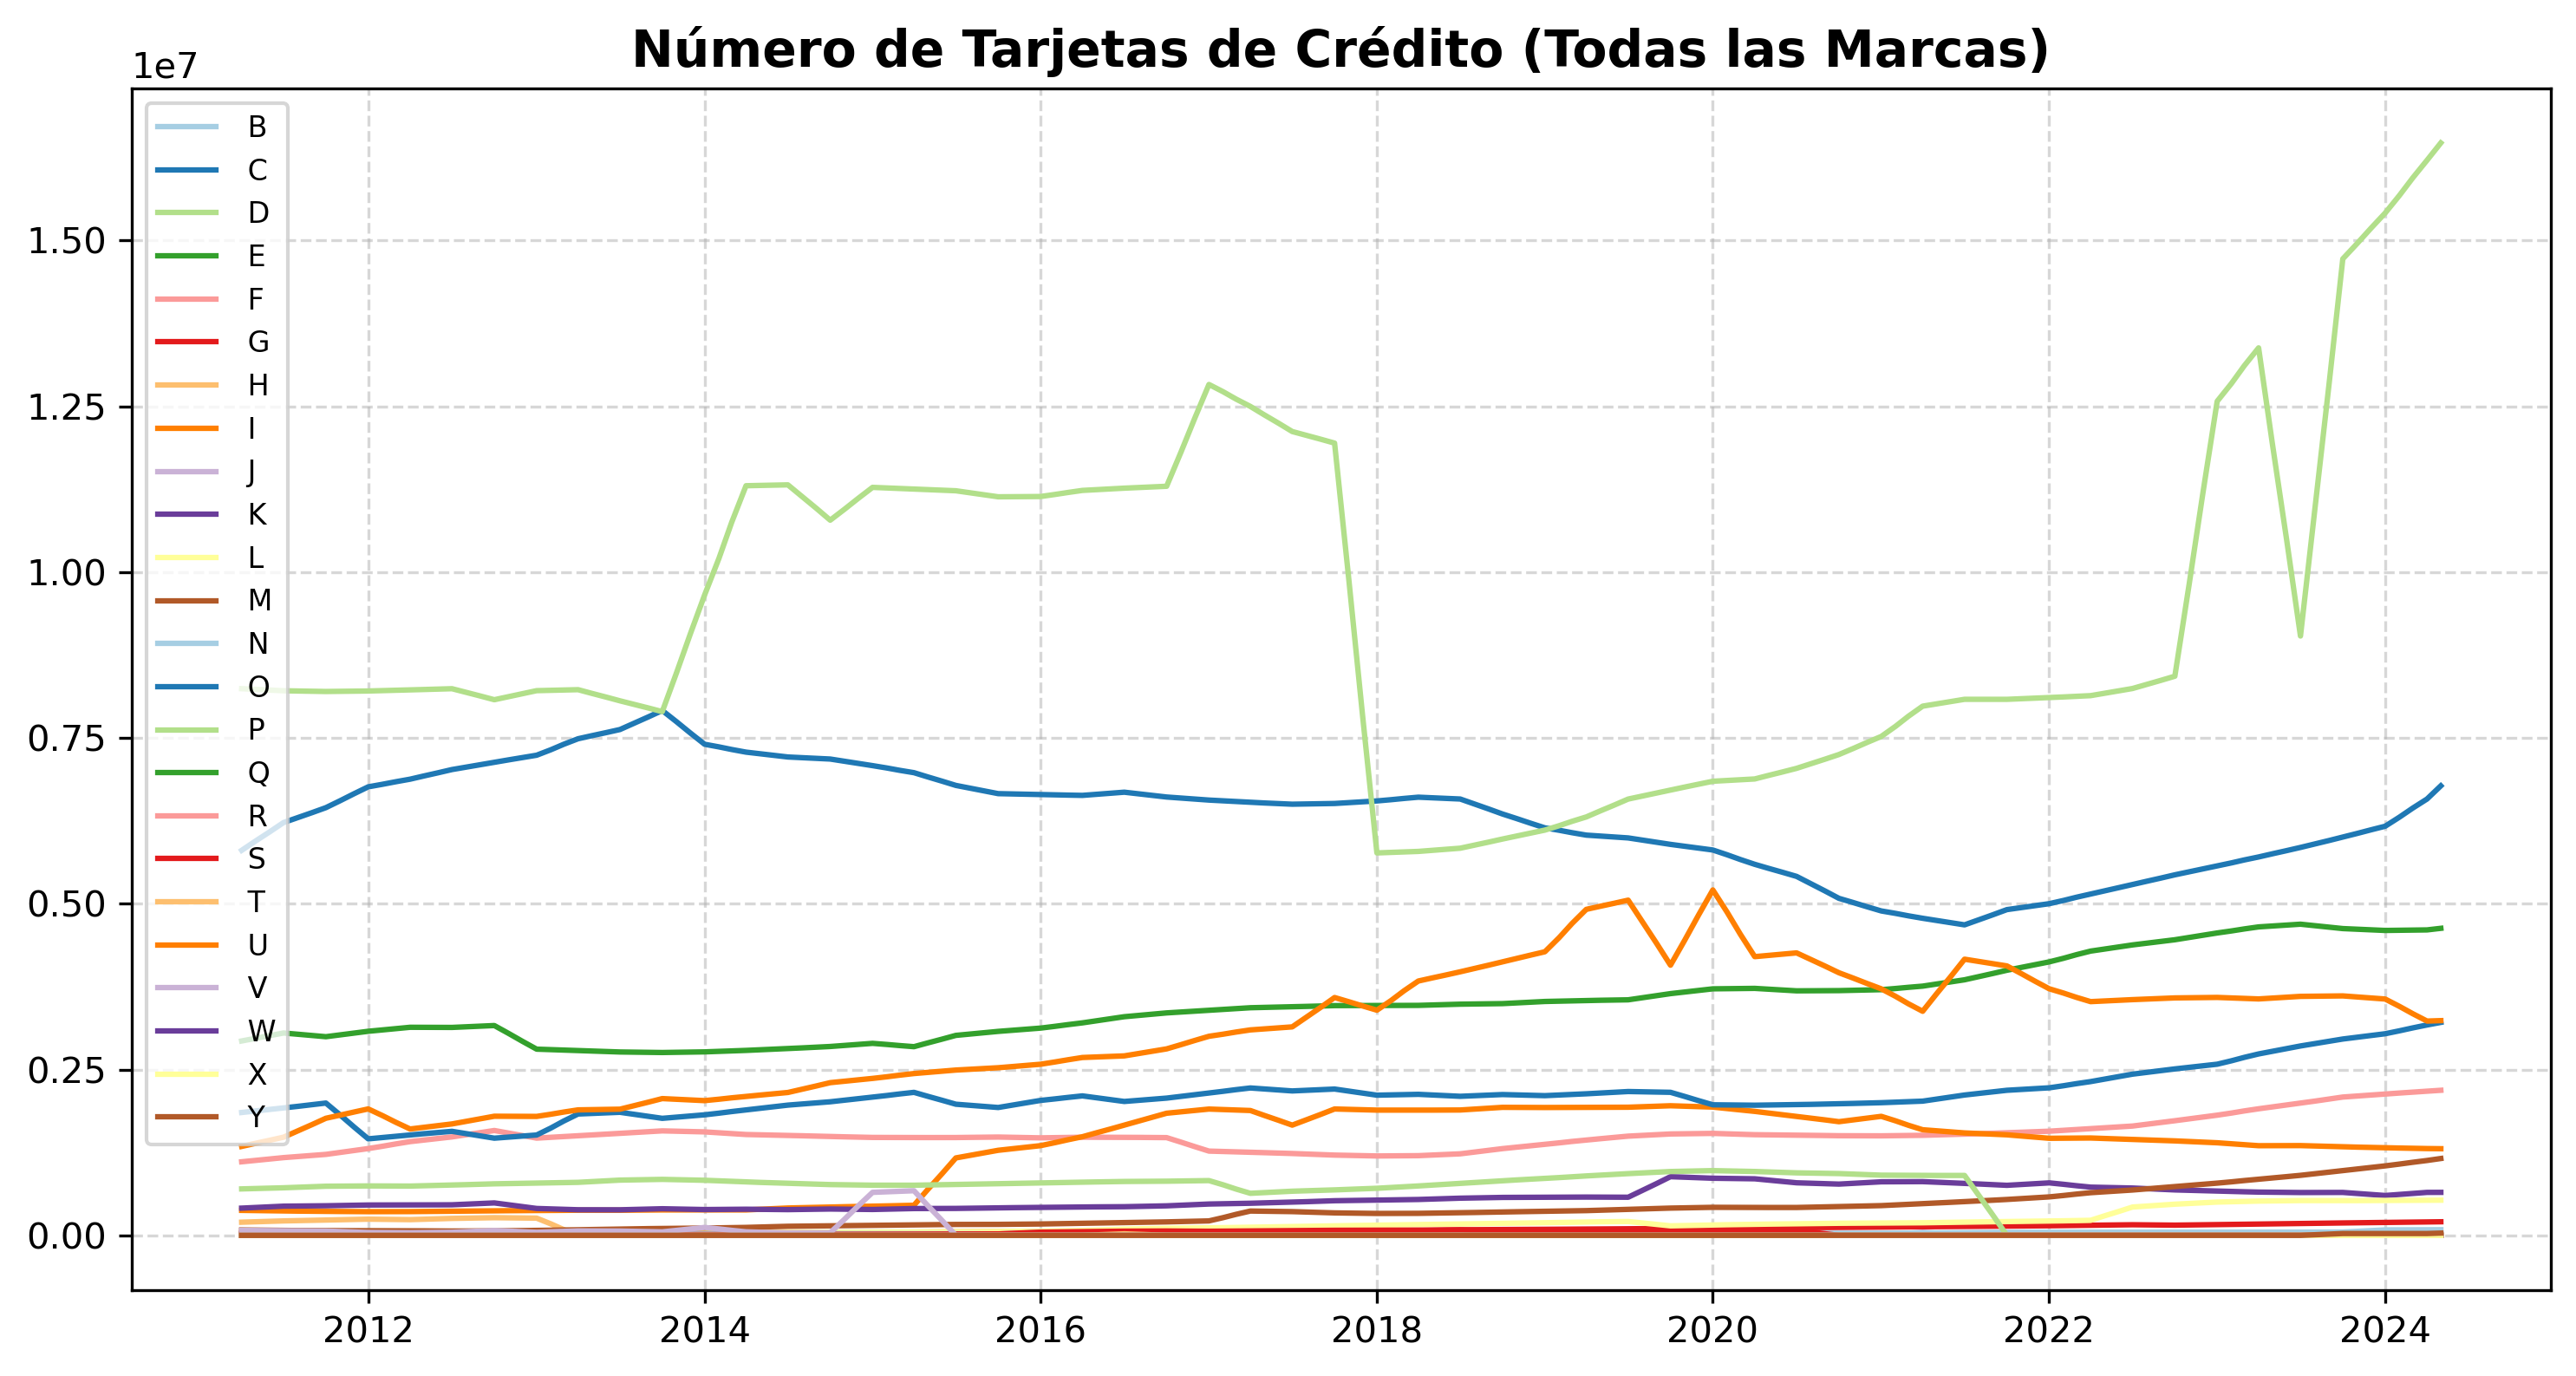

In [ ]:
# quitar la columna que se llama todas
tdc_clean = tdc_clean.drop("Todas", axis=1)
plot_fig(tdc_clean, "Número de Tarjetas de Crédito (Todas las Marcas)", legend=True)

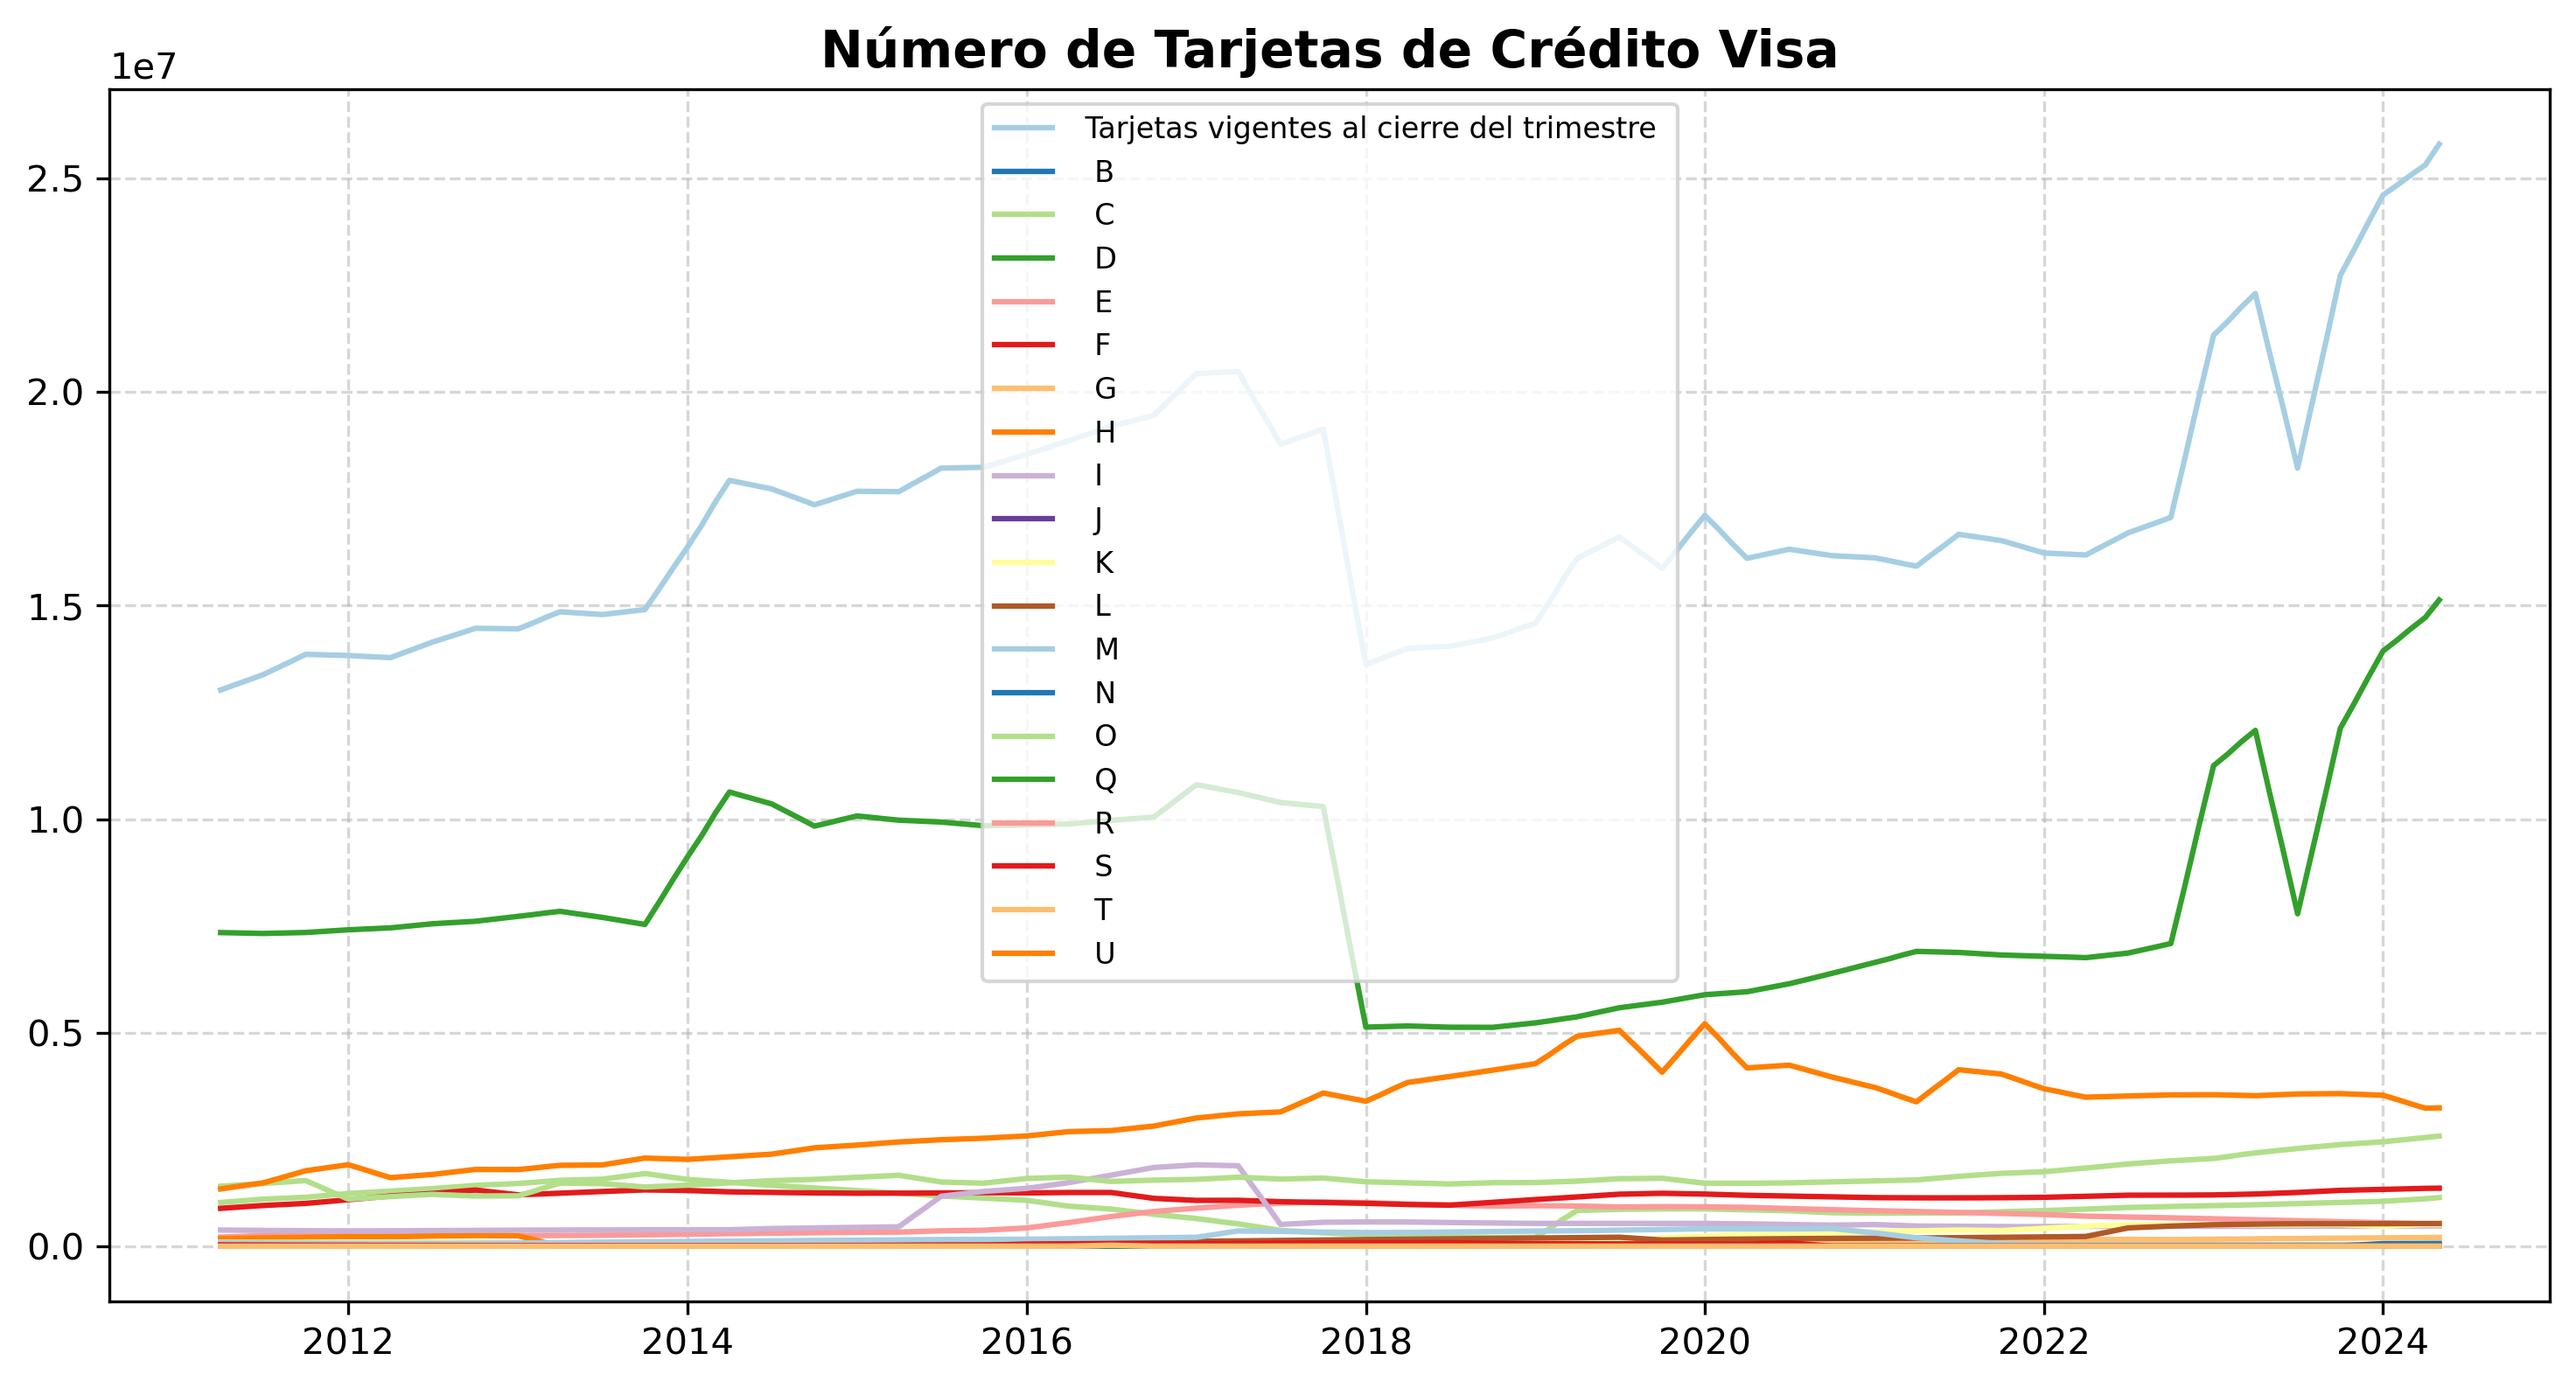

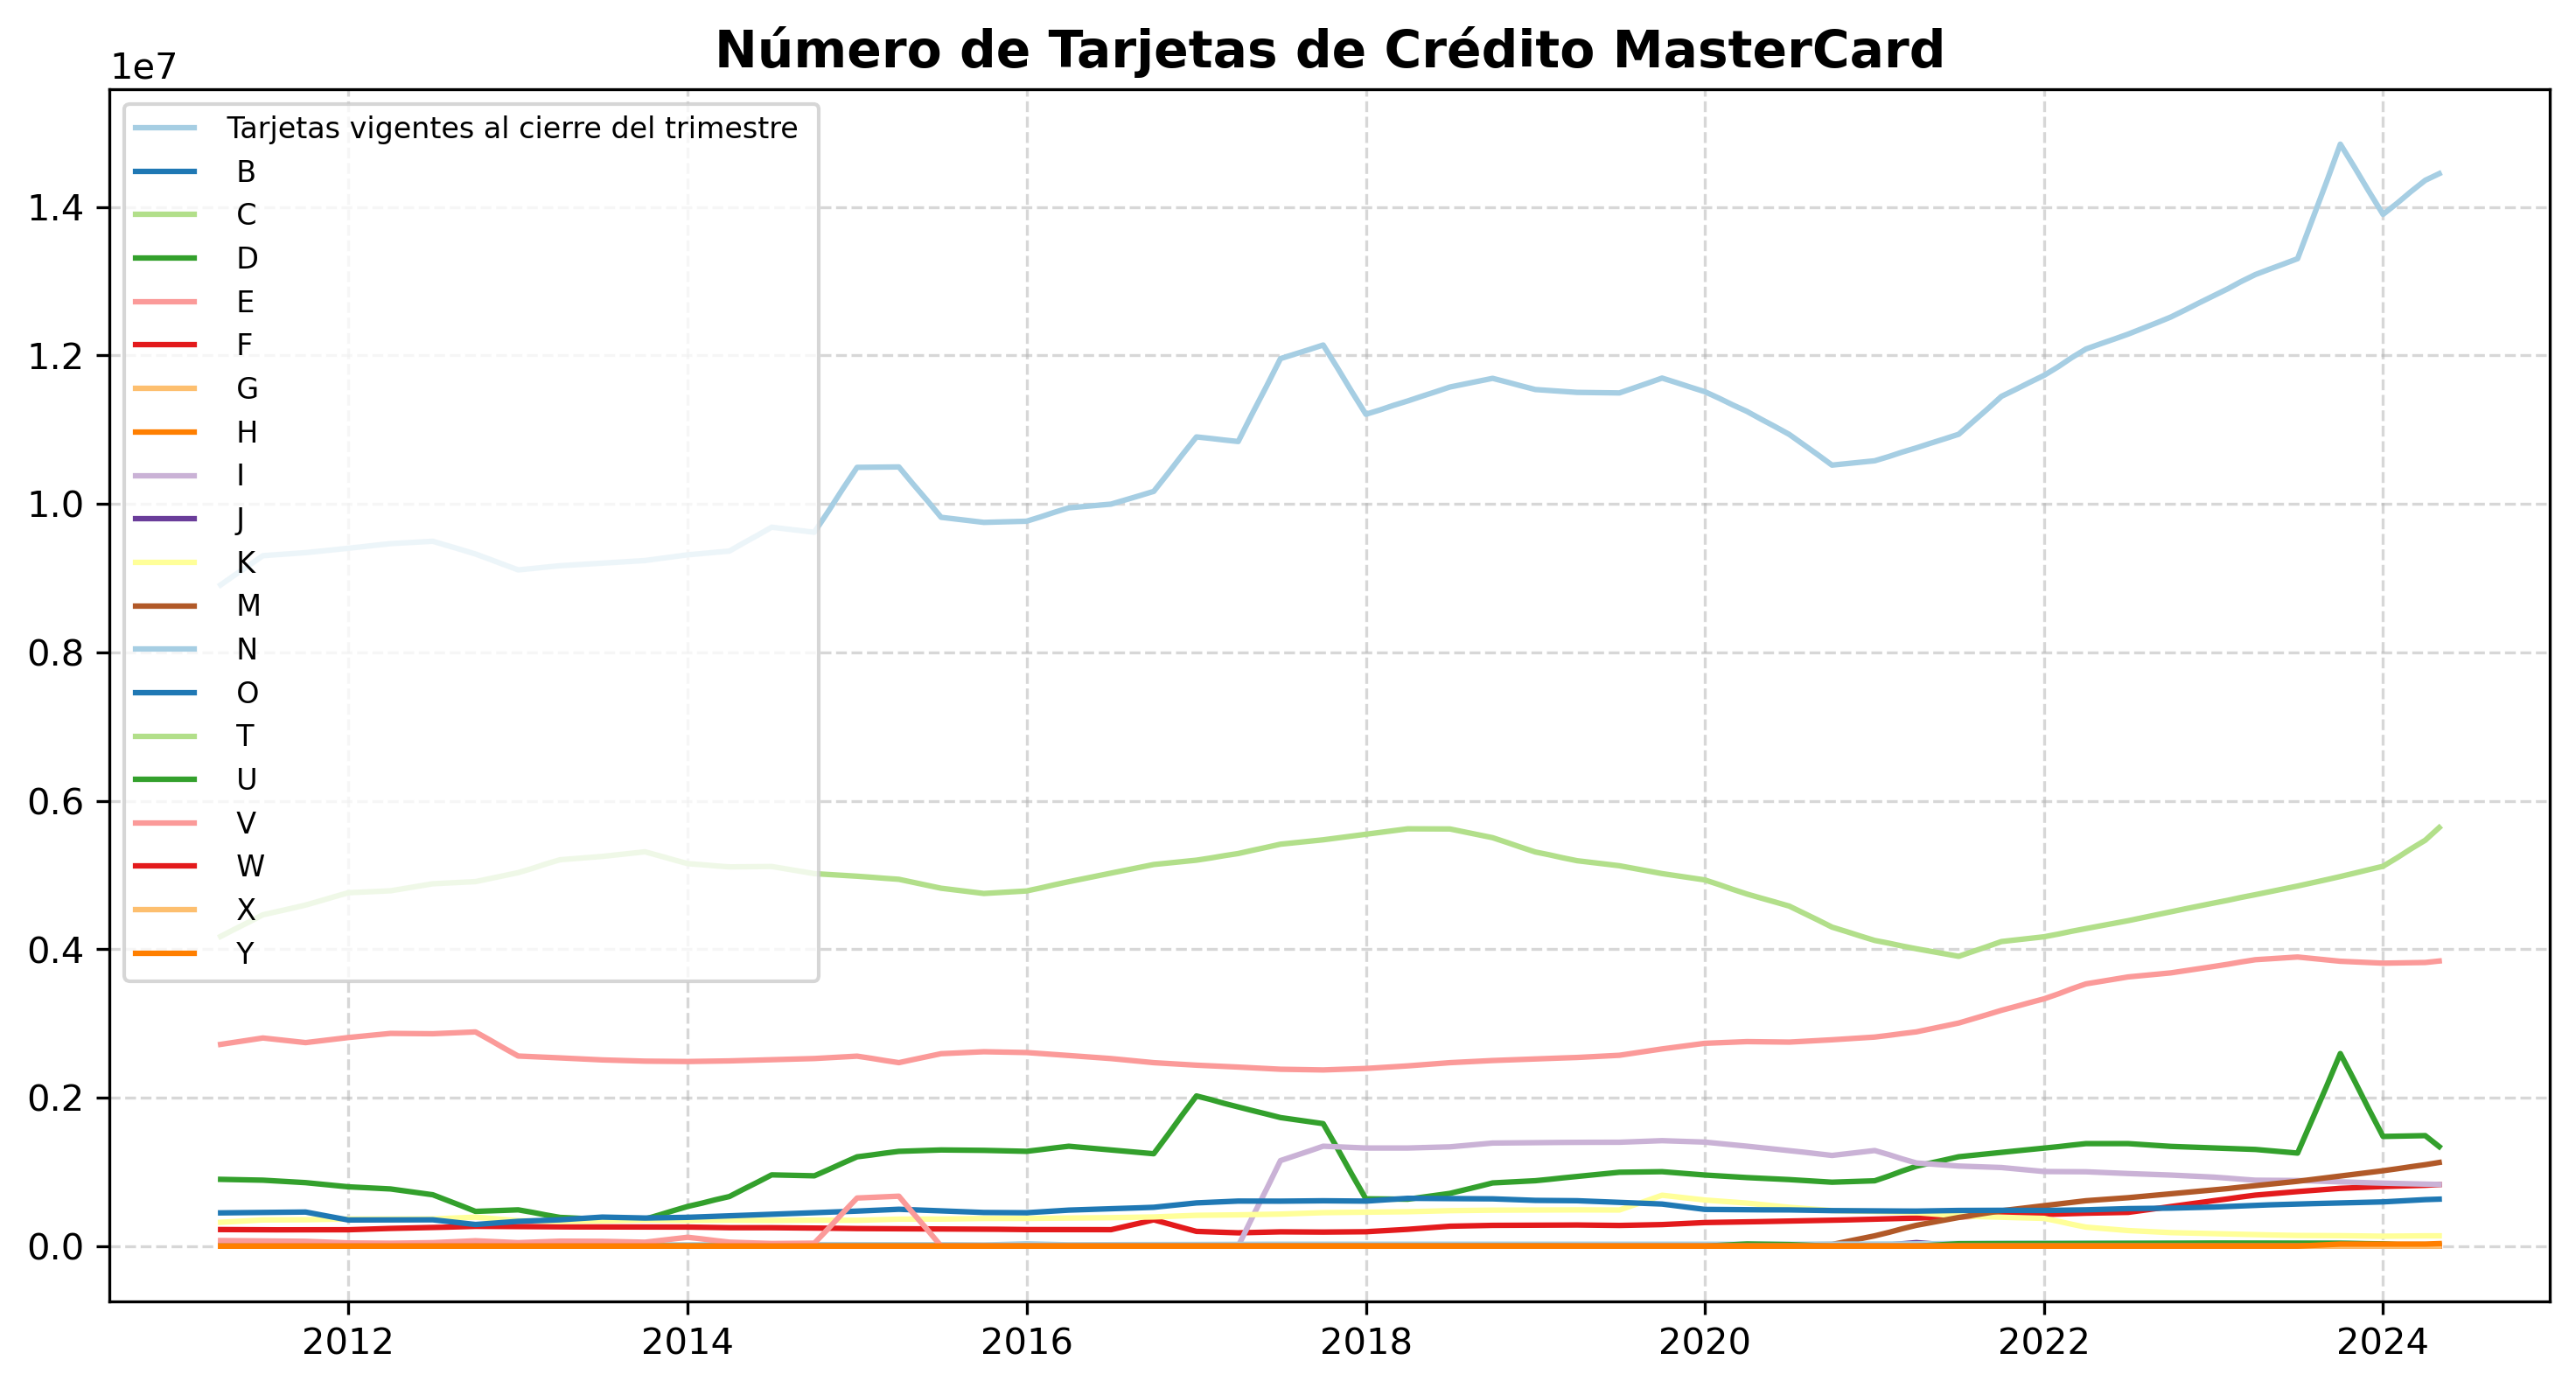

In [710]:
# comparar numero de visas y mastercards
visa = df2.columns[df2.columns.str.contains("visa")]
mastercard = df2.columns[df2.columns.str.contains("mastercard")]

visa_df = df2[visa]
mastercard_df = df2[mastercard]

visa_df.columns = visa_df.columns.str.replace("(visa)", "")
mastercard_df.columns = mastercard_df.columns.str.replace("(mastercard)", "")

plot_fig(visa_df, "Número de Tarjetas de Crédito Visa", legend=True)
plot_fig(mastercard_df, "Número de Tarjetas de Crédito MasterCard", legend=True)